In [3]:
import tweepy as tw
from tweepy import OAuthHandler
from pprint import pprint
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json
#from tweepy.streaming import StreamListener
import sys
import string
import time
from tweepy import Stream
import networkx as nx
import json

In [4]:
consumer_key = 'rIZJGkLZxItS5UXb64pG1H44D'
consumer_secret = 'HwyHc987owzCJ6iPmQ97r8cwq9KEpUC6eX9JnmV6T7UYljKBae'
access_token = '1471551383660908549-B87gy3kRhQbkAbyRavt1agfJ7v6cKO'
access_secret = 'Xy6oR7rd4qDUkECpoEWEc7Gu9fFfN5AGWZljAtOyaduNR'

In [5]:
# 1. Create an OAuthHandler instance into which you will pass your consumer key and secret
auth=OAuthHandler(consumer_key,consumer_secret)
# 2. Set up your access token so you do not need to re-fetch it each time you make a request
auth.set_access_token(access_token,access_secret)

In [6]:
# Set up the Twitter API Client
api=tw.API(auth)
#search_query='#covid19'

In [11]:
user = api.me()

AttributeError: 'API' object has no attribute 'me'

In [10]:
from pprint import pprint
pprint(user._json)

AttributeError: 'function' object has no attribute '_json'

In [ ]:
def format_filename(fname):
  """convert file name into a safe string.
  Arguments:
     fname -- the file name to convert
  Return:
     String -- converted file name
  """
  return ''.join(convert_valid(one_char) for one_char in fname)

In [ ]:
def convert_valid(one_char):
  """convert a character into '_' if invalid.
  Arguments:
      one_char -- the char to convert
  return:
      character -- converted char
  """
  valid_chars="-_.%s%s" % (string.ascii_letters, string.digits)
  if one_char in valid_chars:
    return one_char
  else:
    return '_'

In [ ]:
class MyListener(StreamListener):
    '''
    Overrides StreamListener's methods:
    Redfines the constructor __init__
    on_data (triggered when data is coming through) 
    on_error (triggered when there is an error)
    '''
# Write code that redefines init, on_data and on_error methods 

    def _init_(self, fname):
      safe_fname=format_filename(fname)
      self.outfile="stream_%s.jsonl" % safe_fname

    def on_data(self, data):
      try:
         # Write code where you write your data at the end of your file
         print(data)
         with open(self.outfile, 'a') as file:
           file.write(data)
           return True
      except BaseException as e:
        sys.stderr.write("Error on_data: {}\n".format(e))
        time.sleep(5)
        return True

    def on_error(self, status):
      if status==420:
        sys.stderr.write("Rate limit exceeded \n".format(status))
        return False
      else:
        sys.stderr.write("Error {}\n".format(status))
        return True

In [ ]:
query=['covid']

In [ ]:
query_fname=' '.join(query)

In [ ]:
#Create a Stream object based on the MyListener class we just defined 
twitter_stream=Stream(auth, MyListener(query_fname))

In [ ]:
# Filter your Stream object to only include tweets written in English for instance
twitter_stream.filter(track=query, languages=["en"], is_async=True)

In [ ]:
tweet_list=[]
class MyStreamListener(tw.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("tweet.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<25000:
            return True
        else:
            return False
        self.file.close()

In [ ]:
#create streaming object and authenticate
l = MyStreamListener()
stream =tw.Stream(auth,l)
#this line filters twiiter streams to capture data by keywords
stream.filter(track=['covid','corona','covid19','coronavirus',
'facemask','sanitizer','social-distancing','mask'])
#stream.filter(track=['AFCON','corona','covid19'])

{"created_at":"Wed Mar 16 19:52:28 +0000 2022","id":1504183839903477761,"id_str":"1504183839903477761","text":"@vicenteegm @OldSpottedOne @anonfmresident @edwinmundt I suppose they need to better define \u2018long Covid\u2019. Initially\u2026 https:\/\/t.co\/WGNsxTRI34","display_text_range":[55,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504164151580520448,"in_reply_to_status_id_str":"1504164151580520448","in_reply_to_user_id":2560350684,"in_reply_to_user_id_str":"2560350684","in_reply_to_screen_name":"vicenteegm","user":{"id":45606755,"id_str":"45606755","name":"Joe Schmoe \u2618\ufe0f\ud83c\udf7a","screen_name":"keepersnug","location":"All over the world","url":null,"description":"A person is smart, people are dumb - Agent K - I\u2019m a reasonable guy, but I\u2019ve just experienced some very unreasonable things - Jack Burton","translator_type":"none","protec

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:28 +0000 2022","id":1504183840956375041,"id_str":"1504183840956375041","text":"RT @ElyKreimendahl: omg I am SHOCKED that covid cases are rising after restrictions and masks have been removed like this is CRAZY who coul\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1724522700,"id_str":"1724522700","name":"Marti","screen_name":"_blueredblood_","location":"permanent vacation","url":null,"description":"Only you can cure my sickness; raise ourselves and a middle finger cause they all think we're twisted || she\/her","translator_type":"none","protected":false,"verified":false,"followers_count":671,"friends_count":757,"listed_count":4,"favourites_count":90160,"statuses_count":33292,"created_at":"Tue 

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183844416761857,"id_str":"1504183844416761857","text":"RT @ElyKreimendahl: omg I am SHOCKED that covid cases are rising after restrictions and masks have been removed like this is CRAZY who coul\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":14712325,"id_str":"14712325","name":"kay p","screen_name":"Lazyhead","location":"Delco, yo","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":276,"friends_count":1151,"listed_count":0,"favourites_count":30878,"statuses_count":3627,"created_at":"Fri May 09 11:42:27 +0000 2008","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_tra

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183844982960131,"id_str":"1504183844982960131","text":"RT @iphone_venez: Remember when the Centrist Dem pitch was \u201cwe will be quietly competent bureaucrats who will do our jobs and not tweet\u201d?\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":31322322,"id_str":"31322322","name":"Nolan Void","screen_name":"HitlerPuncher","location":"The eternal 1985 of the mind","url":"http:\/\/www.jonwolter.com","description":"A very convoluted running joke online. Drew that picture you all share without attribution. Cohost of @MMISPodcast, @hardgreysnight he\/him","translator_type":"none","protected":false,"verified":false,"followers_count":2258,"friends_count":882,"listed_count"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183845100261381,"id_str":"1504183845100261381","text":"@perfectrose2011 Still need proof of vaccination plus useful for contact tracing.  I assume it will also help for t\u2026 https:\/\/t.co\/qWXX7ybJEH","display_text_range":[17,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504156886714572804,"in_reply_to_status_id_str":"1504156886714572804","in_reply_to_user_id":342313862,"in_reply_to_user_id_str":"342313862","in_reply_to_screen_name":"perfectrose2011","user":{"id":232234873,"id_str":"232234873","name":"\ud83c\udde8\ud83c\udde6 \u270d\ud83c\udffd Johanna Read","screen_name":"TravelEater","location":"Vancouver, British Columbia","url":"https:\/\/TravelEater.net","description":"\ud83d\udccdResponsible tourism writer. Bylines: Nat Geo\u2022Fodor\u2019s\u2022T+L\u2022Reader\u2019s Digest\u2022Forbes\u2022Cult

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183845100437505,"id_str":"1504183845100437505","text":"RT @m_scribe: Since I wrote this article, 188 more children died. That\u2019s 10% of all US child deaths during the pandemic reported in roughly\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":297696994,"id_str":"297696994","name":"Susannah Koontz, PharmD, BCOP \ud83c\udf97","screen_name":"KoontzOncology","location":"Houston, TX","url":"http:\/\/www.koontzoncology.com","description":"#Cancer #Pharmacist (#OncoPharm) working to #CancelChildhoodCancer | #ChildhoodCancer #Advocate | Michigan \u201896 - #GoBlue | Tweets are not medical advice","translator_type":"none","protected":false,"verified":false,"followers_count":2

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183845180088320,"id_str":"1504183845180088320","text":"Anti-Democrat Manchin and his arthritic fingers","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":983247178075398144,"id_str":"983247178075398144","name":"KP\ud83d\udcad","screen_name":"kat_pep_","location":"Earth","url":null,"description":"Vegan, Democrat\ud83c\udf0a \ud83c\udf3bProtect Planet Earth\ud83c\udf0eSave our Democracy\ud83d\uddfd\ud83c\uddfa\ud83c\uddf8","translator_type":"none","protected":false,"verified":false,"followers_count":2752,"friends_count":3784,"listed_count":19,"favourites_count":48756,"statuses_count":209410,"created_at":"Mon Apr 09 07:36:09 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183845888925707,"id_str":"1504183845888925707","text":"Double hell no with all the new findings associated with side effects from this shit!","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":428363077,"id_str":"428363077","name":"Rib Man RollTide","screen_name":"BAMAnBBQ","location":"Dothan, AL","url":null,"description":"Mama's Boy. Miss you, Mom!\n\nConservative!!! No Libs allowed!!!!","translator_type":"none","protected":false,"verified":false,"followers_count":1206,"friends_count":2344,"listed_count":9,"favourites_count":49698,"statuses_count":59437,"created_at":"Sun Dec 04 17:31:23 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_e

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:29 +0000 2022","id":1504183846140461058,"id_str":"1504183846140461058","text":"@catephelps @CovidMarshall Lets hope not, time to move on from the covid catastrophe","display_text_range":[27,84],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504058734959599617,"in_reply_to_status_id_str":"1504058734959599617","in_reply_to_user_id":139040889,"in_reply_to_user_id_str":"139040889","in_reply_to_screen_name":"catephelps","user":{"id":1466134629526556673,"id_str":"1466134629526556673","name":"Van StuntGirl","screen_name":"VStuntgirl","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":22,"friends_count":24,"listed_count":0,"favourites_count":616,"statuses_count":286,"created_at":"Wed Dec 01 19:58:47 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":n

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:30 +0000 2022","id":1504183848120119298,"id_str":"1504183848120119298","text":"RT @prangshudeb: Our scientific community and health &amp; frontline workers played a major role in ensuring India\u2019s success in Covid vaccinati\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1302241325085945856,"id_str":"1302241325085945856","name":"Kuldeep Chauhan","screen_name":"Kuldeep54500474","location":"New Delhi, India ","url":null,"description":"BJP","translator_type":"none","protected":false,"verified":false,"followers_count":116,"friends_count":20,"listed_count":2,"favourites_count":609,"statuses_count":87266,"created_at":"Sat Sep 05 13:46:04 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:30 +0000 2022","id":1504183848279674883,"id_str":"1504183848279674883","text":"@carol_hamon @Markoh_oho @Prophet85206537 @ABC I went to Vegas just before the covid outbreak couldn\u2019t resist tryin\u2026 https:\/\/t.co\/0o72OisYvX","display_text_range":[47,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504180736559095817,"in_reply_to_status_id_str":"1504180736559095817","in_reply_to_user_id":1511981683,"in_reply_to_user_id_str":"1511981683","in_reply_to_screen_name":"carol_hamon","user":{"id":1440743885102202892,"id_str":"1440743885102202892","name":"Marc Thomas \ud83c\udff4\udb40\udc67\udb40\udc62\udb40\udc77\udb40\udc6c\udb40\udc73\udb40\udc7f\ud83c\uddec\ud83c\udde7","screen_name":"UK4ever","location":null,"url":null,"description":"Welsh & very British, fish n chips is way better than any French dish and Rugby\u2019s the best sp

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:30 +0000 2022","id":1504183848791203841,"id_str":"1504183848791203841","text":"from years of covid isolation, I\u2019ve lost all sense of fashion and \u201clooking good\u201d but am extremely picky about wine","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1528888178,"id_str":"1528888178","name":"Claire Cronin","screen_name":"churchofdespair","location":"California","url":"https:\/\/clairecronin.bandcamp.com\/album\/bloodless","description":"writer, musician. \u2728BLOODLESS (2021) and BIG DREAD MOON (2019) on Orindal Records \u2728 BLUE LIGHT OF THE SCREEN (2020) on Repeater Books. \u2728","translator_type":"none","protected":false,"verified":false,"followers_count":1202,"friends_count":876,"listed_c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:30 +0000 2022","id":1504183848799715334,"id_str":"1504183848799715334","text":"@Donna_156 Today was my first post covid work trip to London. It\u2019s still very southern.","display_text_range":[11,87],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504166019635597324,"in_reply_to_status_id_str":"1504166019635597324","in_reply_to_user_id":305183820,"in_reply_to_user_id_str":"305183820","in_reply_to_screen_name":"Donna_156","user":{"id":851497206209183744,"id_str":"851497206209183744","name":"Peak Fowl","screen_name":"PeakFowl","location":null,"url":null,"description":"A narrowboating goose fanatic IT worker. Photographs of geese, boating and canal life mostly in and around the Peak District, High Peak and Manchester.","translator_type":"none","protected":false,"verified":false,"followers_count":448,"friends_count":285,"listed_count":1,"fa

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:30 +0000 2022","id":1504183849097609219,"id_str":"1504183849097609219","text":"RT @JonFeere: \ud83d\udea8LEAKED ICE DEPORTATION DATA: \"Deportations saw an even bigger drop-off, with ERO recording just 39,149 convicts removed in 2\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":19563355,"id_str":"19563355","name":"NumbersUSA","screen_name":"NumbersUSA","location":"Washington, DC","url":"http:\/\/www.numbersusa.com","description":"NumbersUSA provides a civil forum for Americans of all backgrounds to focus on a single issue: immigration policies in the interest of our national community.","translator_type":"none","protected":false,"verified":true,"followers_count":33735,"friends_count":123,"listed_count":574,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:30 +0000 2022","id":1504183849336684551,"id_str":"1504183849336684551","text":"RT @doctorshaib: Dear @sajidjavid and @nadhimzahawi.\n\nThis week, I have been dealing with several COVID-19 outbreaks in schools and nursing\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":326788733,"id_str":"326788733","name":"Mike Fealey #JohnsonOut","screen_name":"MikeFealey","location":"Republic of Wales","url":null,"description":"Fan of healthcare safety, all things peri-operative and electric vehicles .........and the Beatles, Clash, Jam & Europe. Tweeting in a personal capacity","translator_type":"none","protected":false,"verified":false,"followers_count":2623,"friends_count":3743,"listed_count":72,"favourit

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183850708045824,"id_str":"1504183850708045824","text":"WHO says global rise in Covid cases is 'tip of the iceberg' https:\/\/t.co\/bKDZU0CfjF via @nbcnews","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1446679376439906305,"id_str":"1446679376439906305","name":"Retrosynthesis AI","screen_name":"Retrosynth_AI","location":null,"url":"https:\/\/retrosynthesis-ai.netlify.app\/","description":"Platform at the intersection of bioinformatics and synthetic chemistry","translator_type":"none","protected":false,"verified":false,"followers_count":15,"friends_count":298,"listed_count":0,"favourites_count":24,"statuses_count":97,"created_at":"Sat Oct 09 03:30:29 +0000 2021","utc_offset":null,"time_zone"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183851018596356,"id_str":"1504183851018596356","text":"RT @8yTtgK6souaKbNu: the clinical death of the Saudi Crown Prince Mohammed Bin Salman caused by COVID, the firm plan of Allaah;\nImam Nasser\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2955798247,"id_str":"2955798247","name":"nicole lyn calagos","screen_name":"CalagosNicole","location":null,"url":null,"description":"Abd El Naeem","translator_type":"none","protected":false,"verified":false,"followers_count":74,"friends_count":6,"listed_count":0,"favourites_count":1,"statuses_count":9535,"created_at":"Fri Jan 02 08:07:00 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183850913742852,"id_str":"1504183850913742852","text":"@Akanimoh_Friday So he helped with Covid, what a hero\ud83d\ude02\ud83d\ude02","display_text_range":[17,55],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1501868862148685834,"in_reply_to_status_id_str":"1501868862148685834","in_reply_to_user_id":2512481072,"in_reply_to_user_id_str":"2512481072","in_reply_to_screen_name":"Akanimoh_Friday","user":{"id":728178652723216384,"id_str":"728178652723216384","name":"Johnny M","screen_name":"JohnMas29362856","location":"Kent","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":16,"friends_count":79,"listed_count":0,"favourites_count":3209,"statuses_count":494,"created_at":"Thu May 05 11:04:54 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":n

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183851739877379,"id_str":"1504183851739877379","text":"whoever accidentally put my number down for their covid test, i'll keep you posted https:\/\/t.co\/GVZCUzWiU2","display_text_range":[0,82],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":64116834,"id_str":"64116834","name":"Magistra Carolyn Renee \ud83c\udf54","screen_name":"unreadsymphony","location":"Los Angeles, CA","url":"https:\/\/youtube.com\/channel\/UCsT_moF7r8XeU9XtRfevOpg","description":"\ud83d\udc08 mom. she\/her #ACAB #BlackLivesMatter #GND #FreePalestine #M4A #EndAllWars baby marxist. adult asshole. bi \ud83c\udf08","translator_type":"none","protected":false,"verified":false,"followers_count":630,"friends_count"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183852352352256,"id_str":"1504183852352352256","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":129061149,"id_str":"129061149","name":"jebman","screen_name":"deeejY","location":null,"url":null,"description":"PhD in Physics\/Medical Imaging. Data Science.","translator_type":"none","protected":false,"verified":false,"followers_count":17,"friends_count":33,"listed_count":0,"favourites_count":375,"statuses_count":301,"created_at":"Sat Apr 03 02:15:41 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_e

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183853040254990,"id_str":"1504183853040254990","text":"RT @8yTtgK6souaKbNu: also because of the clinical death of the Saudi Crown Prince Mohammed Bin Salman caused by COVID,\nImam Nasser Mohammed\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2955798247,"id_str":"2955798247","name":"nicole lyn calagos","screen_name":"CalagosNicole","location":null,"url":null,"description":"Abd El Naeem","translator_type":"none","protected":false,"verified":false,"followers_count":74,"friends_count":6,"listed_count":0,"favourites_count":1,"statuses_count":9537,"created_at":"Fri Jan 02 08:07:00 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:31 +0000 2022","id":1504183853837131777,"id_str":"1504183853837131777","text":"RT @ACAfricaCenter: 1 hour till Amb. @ramayade sits in Studio Conversation w\/ #cotedivoire's @ACHIPatrick4 \nFeat. @marcomargheri @JulianPec\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":433034412,"id_str":"433034412","name":"Julian Pecquet","screen_name":"JulianPecquet","location":"Arlington, VA","url":"https:\/\/www.theafricareport.com\/","description":"Washington\/UN correspondent @theafricareport @Jeune_Afrique. Ex-@foreign_lobby @almonitor @thehill. Signal +1 202-770-9958","translator_type":"none","protected":false,"verified":false,"followers_count":5494,"friends_count":5520,"listed_count":166,"favourites_coun

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:32 +0000 2022","id":1504183856018034688,"id_str":"1504183856018034688","text":"RT @Blike_Dante: I\u2019m screaming. We can\u2019t get no Covid money, no stimmys, no rent control\/relief, healthcare, nothing but both parties makin\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2371230835,"id_str":"2371230835","name":"Al\u00e9","screen_name":"alejxramirez","location":"Albuquerque, NM","url":null,"description":"\u00a1Toma, que Toma!                He\/Him","translator_type":"none","protected":false,"verified":false,"followers_count":692,"friends_count":1453,"listed_count":1,"favourites_count":101753,"statuses_count":21411,"created_at":"Tue Mar 04 02:03:49 +0000 2014","utc_offset":null,"time_zone":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:32 +0000 2022","id":1504183856240463873,"id_str":"1504183856240463873","text":"@Resist_05 This is flawed, that\u2019s how infectious diseases spread, there are phases where they peak and stagnate. So\u2026 https:\/\/t.co\/PSNoVVLNLG","display_text_range":[11,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504005391772192770,"in_reply_to_status_id_str":"1504005391772192770","in_reply_to_user_id":1430497892314218502,"in_reply_to_user_id_str":"1430497892314218502","in_reply_to_screen_name":"Resist_05","user":{"id":933927240164921349,"id_str":"933927240164921349","name":"bobby","screen_name":"blaze_420_boy","location":null,"url":null,"description":"3rd year medical student, and I spend my only free time watching sports, nothing interesting here \ud83e\udd37\ud83c\udffe\u200d\u2642\ufe0f","translator_type":"none","protected":false,"verifie

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:32 +0000 2022","id":1504183857800691713,"id_str":"1504183857800691713","text":"RT @sgrubermiller: Iowa will spend $100 million of American Rescue Plan money on Iowa's eight commercial airports, including $59 million fo\u2026","source":"\u003ca href=\"https:\/\/about.twitter.com\/products\/tweetdeck\" rel=\"nofollow\"\u003eTweetDeck\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":351866175,"id_str":"351866175","name":"Kim Norvell","screen_name":"KimNorvellDMR","location":"Des Moines, IA","url":"https:\/\/www.desmoinesregister.com\/staff\/2647190001\/kim-norvell\/","description":"Des Moines growth and development reporter @DMRegister, alumna of Iowa State. E-mail: knorvell@dmreg.com.","translator_type":"none","protected":false,"verified":true,"followers_count":4142,"friends_count":1925,"listed_count":166,"fav

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:32 +0000 2022","id":1504183858664771586,"id_str":"1504183858664771586","text":"RT @Mssarahmssarah: It\u2019s a bonkerballs combination of magical thinking and surrender that we\u2019re not preparing at all for the next wave of c\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1112540779564711937,"id_str":"1112540779564711937","name":"lightning larry luciano","screen_name":"LiamTweetsHere","location":"He\/him","url":"https:\/\/signatures.carrd.co\/","description":"just a bio researcher who wants sustainable, walkable, mixed-use zoning communities\n\nnothing = endorsement","translator_type":"none","protected":false,"verified":false,"followers_count":63,"friends_count":311,"listed_count":1,"favourites_count":73

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:33 +0000 2022","id":1504183859696607238,"id_str":"1504183859696607238","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":890705805267349504,"id_str":"890705805267349504","name":"Shawn Goldwater","screen_name":"ShawnGoldwater","location":"Mile End, Montreal, Quebec","url":null,"description":"Writer in Montreal. Works in film. Shawn \u00e0 Montr\u00e9al sur Wikip\u00e9dia.","translator_type":"none","protected":false,"verified":false,"followers_count":317,"friends_count":576,"listed_count":0,"favourites_count":39659,"statuses_count":25141,"created_at":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:33 +0000 2022","id":1504183860002709511,"id_str":"1504183860002709511","text":"Today in Modern Fascism and profiteering:","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1450242670064984066,"id_str":"1450242670064984066","name":"\ud83d\udc2d\ud83d\udc9c","screen_name":"59733Billboards","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":156,"friends_count":1129,"listed_count":0,"favourites_count":4390,"statuses_count":7361,"created_at":"Mon Oct 18 23:29:47 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_b

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:33 +0000 2022","id":1504183860577382406,"id_str":"1504183860577382406","text":"RT @malditaen: From COVID-19 denialism to pro-Putin hoaxes: the mutation of disinformation groups on Telegram in Spanish\n\n#UkraineFacts \n\nh\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":132154876,"id_str":"132154876","name":"Zardoz \ud83c\udff3\ufe0f\u200d\ud83c\udf08\u2660\ufe0f","screen_name":"ZardoZ89","location":"Pinto, Espa\u00f1a","url":null,"description":"El\/He #cis #asex #aro\n\nIngeniero #informatico #scifi #fantasia #juegos #rol #astronom\u00eda #leer #pel\u00edculas #apateista #republicano","translator_type":"none","protected":false,"verified":false,"followers_count":272,"friends_count":312,"listed

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:33 +0000 2022","id":1504183861252608002,"id_str":"1504183861252608002","text":"RT @doctor_oxford: Over half a million new Covid cases in the last 7 days.\n\nOver 14k Covid patients now in hospital.\n\nYet @10DowningStreet\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":37884137,"id_str":"37884137","name":"AMIT \ud83c\udf3b\ud83c\uddfa\ud83c\udde6\ud83c\uddfa\ud83c\udde6\ud83c\udf3b","screen_name":"AMITD09","location":"London","url":"https:\/\/m.facebook.com\/coachingyatra\/","description":"\"In a world where you can be anything, be Kind.\"\n\nLife coaching with a sprinkle of spirituality.\n\nRTs not an endorsement.","translator_type":"none","protected":false,"verified":false,"followers_count":1110,"friends_c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:33 +0000 2022","id":1504183861512708099,"id_str":"1504183861512708099","text":"RT @m_scribe: \u201cIt\u2019s no longer fair even to insinuate that Covid doesn\u2019t affect children, that Covid deaths are only in unhealthy children o\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":19240173,"id_str":"19240173","name":"Stephanie","screen_name":"stephaniekays","location":null,"url":null,"description":"I\u2019m still a scientist, even if I don\u2019t work in a lab \ud83d\udc69\ud83c\udffb\u200d\ud83d\udd2c\ud83e\uddea\ud83d\udc8a\ud83d\udc89 mom \ud83d\udc66\ud83c\udffb\ud83d\udc36 gadabout \ud83c\udf7a\ud83c\udf2e\u26be\ufe0f\ud83d\udd96\ud83e\uddf6 she\/her \ud83c\udff3\ufe0f\u200d\ud83c\udf08 #BlackLivesMatte

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183863626514432,"id_str":"1504183863626514432","text":"RT @RepLeeZeldin: Anyone fired for not receiving the COVID shot should be given their job back TODAY with back pay.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":471686847,"id_str":"471686847","name":"TC Leary","screen_name":"tleary1","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":314,"friends_count":2055,"listed_count":3,"favourites_count":52992,"statuses_count":38546,"created_at":"Mon Jan 23 04:39:26 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_backg

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183863446278158,"id_str":"1504183863446278158","text":"RT @backtolife_2022: How Xi Jinping's dogmatic pursuit of zero Covid policy in China risks sparking ANOTHER global supply chain crisis by s\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1415228139324780544,"id_str":"1415228139324780544","name":"@SeekingTruth4u2","screen_name":"seekingtruth4u2","location":"Follow here if you dare  :)","url":"https:\/\/gab.com\/SeekingTruth4us","description":"#TruthSeeker #FreeThinker\n#Propaganda Free Zone #Sanctuary\nFollow new account (not official medical-financial-legal-comedy advice duh-Backup Account-Censored;)'","translator_type":"none","protected":false,"verified":false,"fo

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183864218079244,"id_str":"1504183864218079244","text":"RT @ElyKreimendahl: omg I am SHOCKED that covid cases are rising after restrictions and masks have been removed like this is CRAZY who coul\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1081261585,"id_str":"1081261585","name":"Stardancer Supreme, Black Comic Lord","screen_name":"TamekoPatten172","location":"Philadelphia, PA","url":null,"description":"Comic book geek with dreams of World Domination. #BlackComicLords http:\/\/linktr.ee\/TRPPressBooks Cash App\/Venmo: stardancer2001 #CapricornGang #IamAME","translator_type":"none","protected":false,"verified":false,"followers_count":257,"friends_count":1134,"listed_cou

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183864163389443,"id_str":"1504183864163389443","text":"RT @Tamarjon0: Social murder https:\/\/t.co\/FtTHKbThvT","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":834604668177117184,"id_str":"834604668177117184","name":"Lynn Landra | Hungry Angry CyberVampire","screen_name":"LynnLandra","location":"Seattle, WA","url":"https:\/\/www.patreon.com\/NeoNeuro","description":"Hooker on hiatus | Sad by default | She\/Her | Girl with a dick | Still BLM, still ACAB, still Free Palestine, still Fuck You | CA $LynnLandra","translator_type":"none","protected":false,"verified":false,"followers_count":24102,"friends_count":505,"listed_count":23,"favourites_count":107579,"statuses_count":32227,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183864188715010,"id_str":"1504183864188715010","text":"RT @doctor_oxford: Over half a million new Covid cases in the last 7 days.\n\nOver 14k Covid patients now in hospital.\n\nYet @10DowningStreet\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":873960563314970624,"id_str":"873960563314970624","name":"Jacqueline Bowe","screen_name":"Jackix007","location":null,"url":null,"description":"Lifelong Labour Democratic Socialist #GTTO #SaveNHS #ChangeIsComing #ExtinctionRebellion #GreenNewDeal #FreeAssange #BLM #StopTheWarCoalition #BDS","translator_type":"none","protected":false,"verified":false,"followers_count":1384,"friends_count":1873,"listed_count":3,"favourites_count":13897,"statuses_c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183864465494017,"id_str":"1504183864465494017","text":"RT @fetjury: oh look at me im seth evans i don't have covid blah blah blah dickhead","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":852553917816811522,"id_str":"852553917816811522","name":"crdj","screen_name":"JuanDan71554656","location":"no","url":null,"description":"hola","translator_type":"none","protected":false,"verified":false,"followers_count":74,"friends_count":1022,"listed_count":0,"favourites_count":47182,"statuses_count":23015,"created_at":"Thu Apr 13 16:07:48 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_col

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183864977154048,"id_str":"1504183864977154048","text":"RT @EricTopol: Even with lower fatality of Omicron where there's an immunity wall (\ud83c\udde8\ud83c\udded69% 2-shot, 42% 3-shot), a booster shot reduces mortal\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":24897211,"id_str":"24897211","name":"Naiara Costa Chaves \ud83c\uddfa\ud83c\uddf3","screen_name":"naiaracc","location":"New York","url":"https:\/\/sustainabledevelopment.un.org\/","description":"Senior Sustainable Development Officer at @SustDev @UNDESA. Tweeting about #SDGs, #Agenda2030, #UN Stakeholder Engagement & sometimes #cats.","translator_type":"none","protected":false,"verified":false,"followers_count":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183865111420937,"id_str":"1504183865111420937","text":"RT @ProfessorFerg8: Remember, if you're argument is weak, do what Tom does and just throw insults:\nAny critique of covid jabs = anti-vax, a\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":920922496844681216,"id_str":"920922496844681216","name":"mari harbour","screen_name":"mariroseharbour","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":17,"friends_count":97,"listed_count":0,"favourites_count":2804,"statuses_count":204,"created_at":"Thu Oct 19 08:00:07 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contribut

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183866684329992,"id_str":"1504183866684329992","text":"RT @doctor_oxford: Over half a million new Covid cases in the last 7 days.\n\nOver 14k Covid patients now in hospital.\n\nYet @10DowningStreet\u2026","source":"\u003ca href=\"http:\/\/www.echofon.com\/\" rel=\"nofollow\"\u003eEchofon\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":91129528,"id_str":"91129528","name":"\ud83c\uddfa\ud83c\udde6 Clive Davies #FBPE \ud83d\udd36\ud83c\uddec\ud83c\udde7\ud83c\uddea\ud83c\uddfa\ud83c\udded\ud83c\uddf0","screen_name":"CliveDaviesUK","location":"London","url":null,"description":"Internationalist, Pro-European, Surbitonian, #COYS, Author 'Symi: A Practical Guide' http:\/\/amazon.co.uk\/dp\/1980408017","translator_type":"none","protected":false,"verified":false,"followers_count":1134,"friend

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:34 +0000 2022","id":1504183867208577028,"id_str":"1504183867208577028","text":"RT @doctor_oxford: Over half a million new Covid cases in the last 7 days.\n\nOver 14k Covid patients now in hospital.\n\nYet @10DowningStreet\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":289287920,"id_str":"289287920","name":"Peter Driver","screen_name":"PeterDriverart","location":"UK","url":"http:\/\/www.peterdriver.art","description":"Artist. Dad. Greenbelter. Birder.","translator_type":"none","protected":false,"verified":false,"followers_count":1350,"friends_count":2442,"listed_count":42,"favourites_count":24578,"statuses_count":10050,"created_at":"Thu Apr 28 11:19:15 +0000 2011","utc_offset":null,"time_zone"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:35 +0000 2022","id":1504183868106186755,"id_str":"1504183868106186755","text":"@sachapie @covidstrike @Debs_Kropotkin @hjelle_brian Does the US still ask people to self isolate when Covid positi\u2026 https:\/\/t.co\/d6os7quSjo","display_text_range":[53,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1503922672383655943,"in_reply_to_status_id_str":"1503922672383655943","in_reply_to_user_id":713204454,"in_reply_to_user_id_str":"713204454","in_reply_to_screen_name":"sachapie","user":{"id":1317920957344993280,"id_str":"1317920957344993280","name":"Dame SD\ud83d\udc1d\ud83d\udc99\ud83d\udc9c\ud83e\udd0d\ud83d\udc9a\ud83e\ude93","screen_name":"SoniaD88719542","location":"Plague Island ","url":null,"description":"Neolithic flint hunting suffragette. Iceni dweller of Plague Island trying to survive the Tory cull. \u201cLaugh a Defiance\u201d\

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:35 +0000 2022","id":1504183868055818246,"id_str":"1504183868055818246","text":"RT @DrEricDing: 4) As reminder, the #BA2 subvariant is now over 11.6% but quickly rising, and over 24% in New England. Also this data is ov\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":717121215727591425,"id_str":"717121215727591425","name":"3 Libras Magdelena","screen_name":"30ACTruth","location":"The South, USA","url":null,"description":"I\u2019m boring, not edgy. Detest hypocrisy & groupthink. People run in packs because they don\u2019t feel safe alone. I run alone because I don\u2019t feel safe in packs.","translator_type":"none","protected":false,"verified":false,"followers_count":4394,"friends_count":4978,"li

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:35 +0000 2022","id":1504183869733421057,"id_str":"1504183869733421057","text":"@eric_stutzman5 @chiproytx He doesn\u2019t though. It\u2019s just a talking piece. See also covid vaccines despite Chip and h\u2026 https:\/\/t.co\/4U3HVMWu2c","display_text_range":[27,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504171618192396292,"in_reply_to_status_id_str":"1504171618192396292","in_reply_to_user_id":927011824477773824,"in_reply_to_user_id_str":"927011824477773824","in_reply_to_screen_name":"eric_stutzman5","user":{"id":1253158760958263296,"id_str":"1253158760958263296","name":"DontTellTheAmericans","screen_name":"DonttellCol","location":"Oregon, USA","url":"https:\/\/podcasts.apple.com\/us\/podcast\/dont-tell-the-pilot-australian-politics\/id1446558370","description":"@dontpilot USA Correspondent. Scottish, Socialist, legally trained 

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:35 +0000 2022","id":1504183870836588547,"id_str":"1504183870836588547","text":"RT @VeilletteAndre: Are Covid Cases Going Back Up? Sewer Data Has Potential Warning - Bloomberg https:\/\/t.co\/dPcOJM7oAv","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1252432116882853888,"id_str":"1252432116882853888","name":"Romain Martin","screen_name":"RomainMartinIO","location":"Tiohti\u00e0:ke Montreal","url":null,"description":"Mild SARS-2 cynicism. Mildly abrasive.","translator_type":"none","protected":false,"verified":false,"followers_count":2533,"friends_count":4761,"listed_count":32,"favourites_count":177052,"statuses_count":110593,"created_at":"Tue Apr 21 03:01:18 +0000 2020","utc_offset":null,"time_zone":nul

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:35 +0000 2022","id":1504183871184642051,"id_str":"1504183871184642051","text":"@FlipBlue2022 @BNPPARIBASOPEN Not covid, he had stomach issues in the game against Bonzi and he barely made it.. th\u2026 https:\/\/t.co\/Q6IrUs4Gim","display_text_range":[30,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504183427989483524,"in_reply_to_status_id_str":"1504183427989483524","in_reply_to_user_id":719677447281774592,"in_reply_to_user_id_str":"719677447281774592","in_reply_to_screen_name":"FlipBlue2022","user":{"id":723598533404823553,"id_str":"723598533404823553","name":"P0GG","screen_name":"therealalanv1","location":"Italy","url":null,"description":"Diamond Masochist ADC player\n\n#G2ARMY","translator_type":"none","protected":false,"verified":false,"followers_count":44,"friends_count":336,"listed_count":0,"favourites_count":56224,"statuses_count":3882,"c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183871902040074,"id_str":"1504183871902040074","text":"RT @CTVNews: BREAKING: Canada lifting pre-arrival COVID-19 testing requirement as of April 1 https:\/\/t.co\/eHHmjnYT1O","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":433603018,"id_str":"433603018","name":"Bill","screen_name":"bill_the_king00","location":"St.Catharines,Ontario Canada","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":359,"friends_count":38,"listed_count":0,"favourites_count":6438,"statuses_count":19975,"created_at":"Sat Dec 10 19:36:17 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_tr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183871612592129,"id_str":"1504183871612592129","text":"I should be sat in my seat in the Main Stand again tonight. But, thanks to Covid, I have to settle for bed &amp; the la\u2026 https:\/\/t.co\/wYYOi6u9iF","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":232567258,"id_str":"232567258","name":"Rachel Duckmanton","screen_name":"rach_duckmanton","location":null,"url":null,"description":"Proud NHS worker.\nFamily means the world to me. \nBe so happy when others look at you they feel happy too! \u2764\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":125,"friends_count":244,"listed_count":0,"favourites_count":2622,"st

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183872002666503,"id_str":"1504183872002666503","text":"118 new COVID-19 cases recorded on Tuesday\nhttps:\/\/t.co\/EWHOLuSxVO https:\/\/t.co\/0U4Q6G3mos","display_text_range":[0,66],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":288349895,"id_str":"288349895","name":"CBC BARBADOS","screen_name":"CBCBARBADOS","location":"Barbados","url":"http:\/\/www.cbc.bb","description":"The most credible source for news in Barbados.","translator_type":"none","protected":false,"verified":false,"followers_count":7977,"friends_count":99,"listed_count":90,"favourites_count":124,"statuses_count":21288,"created_at":"Tue Apr 26 18:01:47 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":nul

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183873734946823,"id_str":"1504183873734946823","text":"RT @EnglishmanAdam: 200 people died of covid yesterday.\nNobody seems to give a s***.\nI'm not talking about you obviously.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1448945155143241755,"id_str":"1448945155143241755","name":"goodlifeliving","screen_name":"GGriffithsbrown","location":null,"url":null,"description":"South  west foodie, no patience  for  crap. politically homeless and trying to find the good  in each day.","translator_type":"none","protected":false,"verified":false,"followers_count":671,"friends_count":269,"listed_count":1,"favourites_count":75050,"statuses_count":107394,"created_at":"Fri Oct 15 09:34:0

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183873894240264,"id_str":"1504183873894240264","text":"RT @doctorshaib: Dear @sajidjavid and @nadhimzahawi.\n\nThis week, I have been dealing with several COVID-19 outbreaks in schools and nursing\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4571721616,"id_str":"4571721616","name":"Janet Cole","screen_name":"isupgloster","location":"west country","url":null,"description":"Glos rugby supporter","translator_type":"none","protected":false,"verified":false,"followers_count":29,"friends_count":143,"listed_count":0,"favourites_count":16634,"statuses_count":2042,"created_at":"Tue Dec 22 21:24:00 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183873894244354,"id_str":"1504183873894244354","text":"RT @BirinderNarang: This is the conversation that will keep happening now.\n\nMust clear what our expectations of vaccinations will be.\n\nFlaw\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1294031824486883328,"id_str":"1294031824486883328","name":"Zedd","screen_name":"TrdisOprtr","location":null,"url":null,"description":"The header is a quote by the 10th Doctor.\n\"Somewhere there's danger, somewhere there's injustice and somewhere else, there is tea getting cold\", the 7th Doctor","translator_type":"none","protected":false,"verified":false,"followers_count":407,"friends_count":16,"listed_count":3,"favourites_count":7335,"statu

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183874150191106,"id_str":"1504183874150191106","text":"RT @nprpolitics: NEW: The White House is warning it will have to wind down a program that pays to test, treat and vaccinate uninsured peopl\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2342374399,"id_str":"2342374399","name":"PositiveLink","screen_name":"PositivLink","location":null,"url":null,"description":"I goof off with people and have fun. Mostly I RT art and other such nonsense. ACNH Dream Address: DA-8125-3608-4864  Banner & icon by: @illusidy","translator_type":"none","protected":false,"verified":false,"followers_count":317,"friends_count":305,"listed_count":0,"favourites_count":50684,"statuses_count":66481

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183874120785926,"id_str":"1504183874120785926","text":"@Moms4Liberty What does reading ability have to do with being \u201cwoke\u201d or not?  Two years of a pendemos has created l\u2026 https:\/\/t.co\/dOv6UWAc3j","display_text_range":[14,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504118030288269317,"in_reply_to_status_id_str":"1504118030288269317","in_reply_to_user_id":1336733113322496000,"in_reply_to_user_id_str":"1336733113322496000","in_reply_to_screen_name":"Moms4Liberty","user":{"id":1476966441568157697,"id_str":"1476966441568157697","name":"Freedom to Learn-Eastchester","screen_name":"F2LEastchestser","location":null,"url":null,"description":"We are a grass roots group of citizens advocating for a school district that is welcoming and provides resources for EVERY student to achieve their dreams!","

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183875450322957,"id_str":"1504183875450322957","text":"RT @peterbcaster: @nathaliejacoby1 Biden led NATO against Russia's war in Ukraine; Trump illegally delayed military aid to Ukraine. States\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1273668899385606144,"id_str":"1273668899385606144","name":"Ann Wallace","screen_name":"AKippieloo","location":" MA","url":null,"description":"Have the courage of your convictions. Character=the way you behave when no one is looking. #BLM Dem. NO DMs.","translator_type":"none","protected":false,"verified":false,"followers_count":3159,"friends_count":4724,"listed_count":0,"favourites_count":49134,"statuses_count":46884,"created_at":"Thu

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:36 +0000 2022","id":1504183875504902149,"id_str":"1504183875504902149","text":"RT @danielgoyal: What\u2019s been happening This Week in Covid?\n\nThe schism between reality and policy grew even wider this week...\n\nOmicron B.2\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":6930722,"id_str":"6930722","name":"Fresh hells, daily","screen_name":"sheepbop","location":null,"url":null,"description":"Nothing pithy.\n\n(he\/him\/they\/them)","translator_type":"none","protected":false,"verified":false,"followers_count":215,"friends_count":436,"listed_count":4,"favourites_count":55529,"statuses_count":13033,"created_at":"Tue Jun 19 14:16:54 +0000 2007","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":nul

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:37 +0000 2022","id":1504183876121468940,"id_str":"1504183876121468940","text":"RT @NphcdaNG: COVID -19 Vaccination Update: March 14th, 2022, in 36 States + the FCT. \n\n19,408,427 of total eligible persons targeted for C\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2412393631,"id_str":"2412393631","name":"Gladys Onozare","screen_name":"gladysonozare","location":"Abuja, Nigeria","url":"http:\/\/www.izafarms.blogspot.com","description":"Entrepreneur, Gender, Family planning & Reproductive Health, Water, Sanitation & Hygiene.","translator_type":"none","protected":false,"verified":false,"followers_count":179,"friends_count":272,"listed_count":4,"favourites_count":178,"statuses_count":732,"created_at":"Wed Mar

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:37 +0000 2022","id":1504183876733874183,"id_str":"1504183876733874183","text":"RT @nomorecolonies: @kurteichenwald @johndoepublic1 1+1 being 2(unless you\u2019re getting your math from Fox News)isn\u2019t a tragedy. The tragedy\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":820187383,"id_str":"820187383","name":"\ud83c\uddfa\ud83c\udde6\ud835\udcd1\ud835\udcfb\ud835\udcf2\ud835\udcfd\ud835\udcf9\ud83c\udf3b\ud835\udcf9\ud835\udcfd\ud835\udcea\ud835\udcfb\ud835\udcfd\ud835\udcfc \ud83c\uddfa\ud83c\udde6","screen_name":"Britpoptarts","location":"House of Eclecstacy!","url":"https:\/\/www.paypal.me\/britpoptarts","description":"\u275dAh, it stinks, it sucks; it's anthropologically unjust.\u275e ~ Jarvis Cocker

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:37 +0000 2022","id":1504183878126288899,"id_str":"1504183878126288899","text":"RT @TaisonBell: Important @CDCMMWR study looking at pediatric hospitalizations for young kids during #Omicron compared to #Delta. \ud83d\udd11 finding\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":87490350,"id_str":"87490350","name":"Chris Seaman","screen_name":"cbseaman","location":"Crozet, VA \/ Lexington, VA","url":"https:\/\/law.wlu.edu\/faculty\/full-time-faculty\/chris-seaman","description":"Law professor at @wlulaw teaching IP, property & election law. Director, Frances Lewis Law Center. All opinions my own. #EndChildhoodCancer\ud83c\udf97","translator_type":"none","protected":false,"verified":false,"followers_count":1320

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:37 +0000 2022","id":1504183878499676167,"id_str":"1504183878499676167","text":"RT @JoshMankiewicz: U.S. experts bracing for another coronavirus surge https:\/\/t.co\/ftoNhGRgC3","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":848623259721629696,"id_str":"848623259721629696","name":"JayPeaJay@JayPeaJay \ud83d\ude4f\ud83c\uddfa\ud83c\udde6\ud83c\uddfa\ud83c\uddf8\ud83c\udfc1\ud83c\udfce\ud83c\udf47\ud83c\udf77\ud83d\udc89\ud83d\udc89\ud83d\udc89\ud83d\udc99\ud83d\udc84\ud83d\udc60","screen_name":"JayPeaJay1","location":null,"url":null,"description":"Vote! Every! Single! Republican! Out! Always double \ud83d\ude37 and 3 times \ud83d\udc89! \ud83d\ude4f\ud83c\uddfa\ud83c\udde6\ud83c\udf0a\ud83d\udc99\u2696

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:37 +0000 2022","id":1504183878612762630,"id_str":"1504183878612762630","text":"@metalmama80 Nov 2020 when I caught COVID","display_text_range":[13,41],"source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504178195653967875,"in_reply_to_status_id_str":"1504178195653967875","in_reply_to_user_id":139488801,"in_reply_to_user_id_str":"139488801","in_reply_to_screen_name":"metalmama80","user":{"id":810989301714534400,"id_str":"810989301714534400","name":"\ud83c\uddfa\ud83c\udde6Didi","screen_name":"nbkdsm2","location":"Colorado, USA","url":null,"description":"Senior, 71, Happy Wife 46 yrs, Grandma, BA, 3X Vaccinated! COVID LONG HAULER! Independent, Hiker, Reader, Techie, Loathe 45, UKRAINE! NO\ud83d\udeabDM\u2019s #VoteBlue","translator_type":"none","protected":false,"verified":false,"followers_count":23652,"friends_count":25722,"listed_count":36,"f

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:37 +0000 2022","id":1504183879451615232,"id_str":"1504183879451615232","text":"RT @taran_adarsh: Day 5 [Tuesday] Biz: TOP SCORERS [post pandemic times]...\n1. #TheKashmirFiles: \u20b9 18 cr\n2. #Sooryavanshi: \u20b9 11.22 cr\n3. #G\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1140599162909556738,"id_str":"1140599162909556738","name":"SUNIL Jiii\ud83c\uddee\ud83c\uddf3\ud83c\uddee\ud83c\uddf3\ud83c\uddee\ud83c\uddf3","screen_name":"jiii_sunil","location":" india","url":null,"description":"My Heros- only Indian Army..\ud83c\uddee\ud83c\uddf3","translator_type":"none","protected":false,"verified":false,"followers_count":10,"friends_count":144,"listed_count":0,"favourites_count":4367,"statuses_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183879996948484,"id_str":"1504183879996948484","text":"the next spike of covid cases and lockdown might cause the revolution","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":229326938,"id_str":"229326938","name":"dij","screen_name":"DijahSB","location":"toronto","url":"https:\/\/linktr.ee\/dijahsb","description":"toronto rap legend dijahsb. non binary. mgmt: @jclay23.","translator_type":"regular","protected":false,"verified":true,"followers_count":11269,"friends_count":1526,"listed_count":51,"favourites_count":17488,"statuses_count":224401,"created_at":"Wed Dec 22 03:44:39 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183879984316418,"id_str":"1504183879984316418","text":"RT @DebGoBlue: Time","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2303925762,"id_str":"2303925762","name":"Zdoubleyoo","screen_name":"zdoubleyoo","location":"Los Angeles","url":"http:\/\/lightlycooked.com","description":"Fervent admirer\/critic\/advocate of all things culture (pop, or otherwise). I am Lebanese coffee with some British fresh double cream mixed in.","translator_type":"none","protected":false,"verified":false,"followers_count":673,"friends_count":752,"listed_count":18,"favourites_count":59009,"statuses_count":22050,"created_at":"Wed Jan 22 00:37:42 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183879992811522,"id_str":"1504183879992811522","text":"RT @m_scribe: Since I wrote this article, 188 more children died. That\u2019s 10% of all US child deaths during the pandemic reported in roughly\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1267158683798077440,"id_str":"1267158683798077440","name":"Retired.RN.in.SD","screen_name":"retired_sd","location":"Pine Ridge, SD","url":"http:\/\/oglalalakotanation.info","description":"30yrs retired Lakota BSN,RN,PHN\ud83d\udc69\ud83c\udffd\u200d\u2695\ufe0f\ud83e\ude7a\u2764\ufe0fMy son is a USMC \u201cDevilDog\u201d Afghanistan Vet\ud83c\uddfa\ud83c\uddf8Honor the Treaties\ud83e\udeb6Truth & Justice\ud83e\udd85\u2696\ufe0fP

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183881142083589,"id_str":"1504183881142083589","text":"@DJScorpiones @WreckaCenter Yeah, well, as an immunocompromised person myself, I'm at the stage where I'm taking pe\u2026 https:\/\/t.co\/RBzG5MeyQ1","display_text_range":[28,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504183059419000834,"in_reply_to_status_id_str":"1504183059419000834","in_reply_to_user_id":747479849086816258,"in_reply_to_user_id_str":"747479849086816258","in_reply_to_screen_name":"DJScorpiones","user":{"id":35838584,"id_str":"35838584","name":"Melanie","screen_name":"nycpix","location":"NYC","url":"https:\/\/letmegooglethat.com\/","description":"planted squarely in the common-sense middle","translator_type":"none","protected":false,"verified":false,"followers_count":345,"friends_count":262,"listed_count":4,"favourites_count":6094,"statuses_count":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183882039578639,"id_str":"1504183882039578639","text":"RT @MSaeedkano: We all believed #CSOs  and many organization has  a positive role to play in our society through enlightening and educating\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2922327960,"id_str":"2922327960","name":"\ud835\udd50\ud835\udd52\ud835\udd6a\ud835\udd52\ud835\udd5f\ud835\udd55\ud835\udd6a \ud835\udd60\ud835\udd57 \ud835\udd38\ud835\udd57\ud835\udd63\ud835\udd5a\ud835\udd54\ud835\udd52 \ud83c\uddf3\ud83c\uddec\u2b55\ufe0f","screen_name":"hackyayandy","location":"Remote","url":"https:\/\/yayandi.xyz\/","description":"Global Citizen + Tech (Data) + Traveling + Social Entrepreneurship + Community D

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183882916188160,"id_str":"1504183882916188160","text":"RT @charlescwcooke: President Biden\u2019s continued attachment to mask mandates and travel restrictions\u2014an attachment that is now drawing the i\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":489934897,"id_str":"489934897","name":"Ronald Jolly \ud83c\uddfa\ud83c\udde6 \ud83c\uddfa\ud83c\uddf2","screen_name":"ProudExDemocrat","location":"Los Angeles, CA","url":null,"description":"Husband. Friend.\nGrateful for a wonderful life.\nConstitutionalist.\n@Angels @USC_Athletics @LAKings @warriors @HamiltonMusical @springsteen & all things @Disney","translator_type":"none","protected":false,"verified":false,"followers_count":258,"fri

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183883088252930,"id_str":"1504183883088252930","text":"RT @birgitomo: The idea that we need to keep masks on because of immunocompromised and\/or disabled people around us makes it seem as though\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1651098120,"id_str":"1651098120","name":"Kaitlyn Teller \ud83c\udf39","screen_name":"knteller","location":null,"url":null,"description":"We can bring to birth a new world from the ashes of the old. RT not endorsements.\n\nshe\/her","translator_type":"none","protected":false,"verified":false,"followers_count":1319,"friends_count":1303,"listed_count":9,"favourites_count":133416,"statuses_count":17440,"created_at":"Tue Aug 06 20:07:1

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:38 +0000 2022","id":1504183883016949769,"id_str":"1504183883016949769","text":"#Capitalism A sickening spectacle. #Johnson sits with murderous crown #PrinceMohammedbinSalman fingers splayed on t\u2026 https:\/\/t.co\/Hu0FiAN9PG","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1125443593085358082,"id_str":"1125443593085358082","name":"Marian Gladstone","screen_name":"GladstoneMarian","location":"Leicester, England","url":null,"description":"ICFI and WSWS supporter.Arts. Environment. Cats. Solidarity with NHS.","translator_type":"none","protected":false,"verified":false,"followers_count":598,"friends_count":561,"listed_count":5,"favourites_count":29943,"statuses_count":109683,"created_at":"Mon May 06 16:5

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183884241592326,"id_str":"1504183884241592326","text":"Many people with disabling #LongCOVID symptoms struggle to obtain disability benefits in a system ill-equipped for\u2026 https:\/\/t.co\/hI32f2gAUC","source":"\u003ca href=\"https:\/\/about.twitter.com\/products\/tweetdeck\" rel=\"nofollow\"\u003eTweetDeck\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1364296688609984520,"id_str":"1364296688609984520","name":"Responsum for Long COVID","screen_name":"responsum4Covid","location":null,"url":"https:\/\/responsumhealth.com\/covid\/","description":"Responsum for Long COVID is a free, patient-designed app community for COVID-19 survivors.","translator_type":"none","protected":false,"verified":false,"followers_count":35,"friends_count":107,"listed_count":0,"favourites_count":42,"statuse

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183884409364485,"id_str":"1504183884409364485","text":"@SaoMc2 My 15 year old son has Covid and he just had his first PCR to get our hands on a recovery cert.  He was sic\u2026 https:\/\/t.co\/yQlPyURoy7","display_text_range":[8,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504149539405672449,"in_reply_to_status_id_str":"1504149539405672449","in_reply_to_user_id":1247546136518447104,"in_reply_to_user_id_str":"1247546136518447104","in_reply_to_screen_name":"SaoMc2","user":{"id":1447252848648069122,"id_str":"1447252848648069122","name":"Maggie Cotter","screen_name":"MaggieCotter5","location":"Cork ","url":null,"description":"Momma Bear with teeth and claws \nFiercely loyal\nEvery single day is a school day\nTry to take people where they are at until they turn nasty","translator_type":"none","protected":false,"verified":fals

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183884799479811,"id_str":"1504183884799479811","text":"RT @SteveDeaceShow: According to the World Health Organization, U.S. suffered a thousand more Covid deaths first week March 22 than first w\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":371923806,"id_str":"371923806","name":"zach bomberger","screen_name":"zachbomberger","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":77,"friends_count":380,"listed_count":0,"favourites_count":1533,"statuses_count":2162,"created_at":"Sun Sep 11 19:39:05 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183885675986944,"id_str":"1504183885675986944","text":"RT @pdrpuff1: #CovidIsNotOver It was never over. The great big lie. https:\/\/t.co\/luorcXub1Y","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1478218543296512004,"id_str":"1478218543296512004","name":"Noe_Riveroll","screen_name":"NoeJar8s","location":"california","url":null,"description":"Dont stop","translator_type":"none","protected":false,"verified":false,"followers_count":42,"friends_count":82,"listed_count":5,"favourites_count":3764,"statuses_count":719,"created_at":"Tue Jan 04 04:17:32 +0000 2022","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183886296850432,"id_str":"1504183886296850432","text":"RT @Blike_Dante: I\u2019m screaming. We can\u2019t get no Covid money, no stimmys, no rent control\/relief, healthcare, nothing but both parties makin\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":734465858181996545,"id_str":"734465858181996545","name":"Jia.","screen_name":"whatwouldjiado","location":"302","url":null,"description":"JMD\ud83d\udc95","translator_type":"none","protected":false,"verified":false,"followers_count":443,"friends_count":440,"listed_count":8,"favourites_count":27158,"statuses_count":49422,"created_at":"Sun May 22 19:28:01 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183887928324097,"id_str":"1504183887928324097","text":"RT @think_or_swim: 2008-'22, a 15-year guide to #climate excuses\n\n2008 - sorry, recession\n2009 - same\n2010 - same\n2011 - still recession\n20\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1339066678068486144,"id_str":"1339066678068486144","name":"RiaResists\ud83c\uddfa\ud83c\uddf8\ud83c\uddfa\ud83c\uddf8\ud83c\udf0a\ud83d\udc1d\ud83d\udc38\ud83d\udc28\ud83e\udd91\ud83d\udc0b\ud83e\udd8b\ud83d\udc22\ud83e\udda6\ud83e\udd8a","screen_name":"RiaResists","location":null,"url":null,"description":"Grateful Patriot not the #GQPTraitor kind Here to connect with #TheResistance #FBR #BLM #ProtectTheVote Nature, birds, art,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:39 +0000 2022","id":1504183888213590019,"id_str":"1504183888213590019","text":"RT @Kit_Yates_Maths: If the government is serious about tackling covid misinformation they should start with the Telegraph.\nIt's 16th time\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":300738705,"id_str":"300738705","name":"Andrew Wighton \ud83d\udc99","screen_name":"Zuperpie","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":316,"friends_count":933,"listed_count":22,"favourites_count":34042,"statuses_count":290643,"created_at":"Wed May 18 08:33:06 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_en

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183888440176642,"id_str":"1504183888440176642","text":"RT @JonLemire: \"A surge in coronavirus infections in Western Europe has experts and health authorities on alert for another wave of the pan\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":788555560836796416,"id_str":"788555560836796416","name":"eles45 \ud83c\uddfa\ud83c\udde6 \ud83c\udff3\ufe0f\u200d\ud83c\udf08","screen_name":"emmalisa45","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":281,"friends_count":1490,"listed_count":1,"favourites_count":124836,"statuses_count":100950,"created_at":"Wed Oct 19 01:41:11 +0000 2016","utc_offset":null,"t

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183889631358980,"id_str":"1504183889631358980","text":"Bill O'Reilly: Staff Message of the Day - New York's Covid Mandate Problem https:\/\/t.co\/JDBaYDlBjU","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":18512153,"id_str":"18512153","name":"JoanHathaway","screen_name":"JoanHathaway","location":"Paradise (Naples, Florida)","url":null,"description":"Happily Retired Mom of 3, Political Junkie","translator_type":"none","protected":false,"verified":false,"followers_count":1132,"friends_count":2276,"listed_count":35,"favourites_count":13670,"statuses_count":143044,"created_at":"Wed Dec 31 18:17:46 +0000 2008","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contrib

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183889992073220,"id_str":"1504183889992073220","text":"RT @drdavidsamadi: Pfizer is now seeking authorization for a fourth shot of the COVID vaccine. \n\nAre you taking it?","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":872398250,"id_str":"872398250","name":"Martyn Lax","screen_name":"MartynMartynlax","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":59,"friends_count":103,"listed_count":1,"favourites_count":17148,"statuses_count":17486,"created_at":"Wed Oct 10 19:45:59 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"pro

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183891002896390,"id_str":"1504183891002896390","text":"RT @GalG____: \ud83e\uddf5 Summary of Israel's status after two years of Covid + lockdown madness (3), quarantine madness, testing madness, masks from\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1160463967111852033,"id_str":"1160463967111852033","name":"Heterodoks","screen_name":"heterodoksno","location":"Norway","url":"https:\/\/t.me\/Heterodoks_no","description":"Will never be silenced..\ntips to heterodoksno@protonmail.com          \nChat: https:\/\/t.me\/HeterodoksnoChat","translator_type":"none","protected":false,"verified":false,"followers_count":1749,"friends_count":3989,"listed_count":7,"favourites_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183891174731779,"id_str":"1504183891174731779","text":"RT @JeffMartinMedia: BA.2 version of COVID-19 virus beginning to spread in US; more contagious than omicron https:\/\/t.co\/bbTXvFsuNg","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1729758474,"id_str":"1729758474","name":"Kim Perales","screen_name":"kpjpsp","location":"California, USA","url":null,"description":"\ud83c\uddfa\ud83c\udde6\ud83c\udf3bI\u2019m fighting for democracy -exposing corruption & lies -appreciate all cultures & religions & believe education, human rights & travel improve the world\ud83c\udf0a","translator_type":"none","protected":false,"verified":false,"followers_count":2399,"friends_count":5003,"listed_count":9,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183891434913795,"id_str":"1504183891434913795","text":"RT @nprpolitics: NEW: The White House is warning it will have to wind down a program that pays to test, treat and vaccinate uninsured peopl\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":87535537,"id_str":"87535537","name":"\u265b Maria\u2077 \\|\/ \ud83d\udc9a","screen_name":"MsMaria___","location":"USA","url":"http:\/\/www.bollyspice.com","description":"Lover of Bollywood (I do some work for BollySpice) and most television, movies, music, books, cool people. I care about politics, justice, reform. #BLM","translator_type":"none","protected":false,"verified":false,"followers_count":859,"friends_count":1599,"listed_co

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183891401318401,"id_str":"1504183891401318401","text":"RT @johntyrannis: Get a free abortion when you get your covid shot at the abortion clinic","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1328810815940677634,"id_str":"1328810815940677634","name":"Sylvie Christ","screen_name":"SylvieChrist7","location":"Apeldoorn,Netherlands","url":"http:\/\/yourworldinbalance.com","description":"I am from Germany, living in the Netherlands now. I am a lifestyle(http:\/\/glass-light.com) and health blogger, and entrepreneur.","translator_type":"none","protected":false,"verified":false,"followers_count":325,"friends_count":316,"listed_count":13,"favourites_count":8020,"statuses_count":7142,"created_at":"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183891518799878,"id_str":"1504183891518799878","text":"@MumbrianSpinner @TattyOne @Gellyfsh I know you said not Covid, but this is bizarre after you recently had mild Cov\u2026 https:\/\/t.co\/rk5ZC0QuR9","display_text_range":[37,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504173335135100933,"in_reply_to_status_id_str":"1504173335135100933","in_reply_to_user_id":1440767358,"in_reply_to_user_id_str":"1440767358","in_reply_to_screen_name":"MumbrianSpinner","user":{"id":275170735,"id_str":"275170735","name":"missy s","screen_name":"bipchick","location":"United Kingdom","url":null,"description":"retired paramedic fair weather gardener love nature \ud83c\uddfa\ud83c\udde6 stand with Ukraine\ud83c\udf3b","translator_type":"none","protected":false,"verified":false,"followers_count":152,"friends_count":207,"listed_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:40 +0000 2022","id":1504183891799728128,"id_str":"1504183891799728128","text":"RT @StevenErtelt: The Massachusetts health department just announced that 4,081 COVID deaths will be removed from the official totals becau\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":953827899018182656,"id_str":"953827899018182656","name":"Terra #AUDITILLINOIS Opes","screen_name":"AllinTerra","location":"Illinois","url":null,"description":"Believes in the Republic, God given\/ Constitution protected unalienable rights, rule of law, truth & justice, family, nature. \nPrivate. \nMag IC.","translator_type":"none","protected":false,"verified":false,"followers_count":1569,"friends_count":1462,"listed_count":3,"favourites_count":18

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183893292773376,"id_str":"1504183893292773376","text":"RT @JonFeere: \ud83d\udea8LEAKED ICE DEPORTATION DATA: \"Deportations saw an even bigger drop-off, with ERO recording just 39,149 convicts removed in 2\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1397983462993272834,"id_str":"1397983462993272834","name":"Democracy Is A Lie","screen_name":"RejectItsLies","location":null,"url":null,"description":"\"Who says organization, says oligarchy.\" - Robert Michels\n\"Democracy virtually assures that only bad and dangerous men will ever rise \" - Hans-Hermann Hoppe","translator_type":"none","protected":false,"verified":false,"followers_count":96,"friends_count":144,"listed_count":5,"favou

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183893599080450,"id_str":"1504183893599080450","text":"Dan \u201clet\u2019s live in fear\u201d Goyal","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2332146833,"id_str":"2332146833","name":"Southern Variant","screen_name":"pompey1977","location":"Portsmouth","url":null,"description":"I sometimes retweet, just to catch up later","translator_type":"none","protected":false,"verified":false,"followers_count":1508,"friends_count":4938,"listed_count":1,"favourites_count":37076,"statuses_count":16529,"created_at":"Sat Feb 08 16:45:11 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_colo

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183893880094729,"id_str":"1504183893880094729","text":"RT @RebelNews_CA: After two years of governance by decree, Quebec Premier Fran\u00e7ois Legault's government is proposing a way out of the ongoi\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":372998146,"id_str":"372998146","name":"Charles Frohman","screen_name":"CFroh","location":"DC","url":null,"description":"libertarian yogi, cashpatient maker, & advocate for innovative orgs","translator_type":"none","protected":false,"verified":false,"followers_count":710,"friends_count":1923,"listed_count":24,"favourites_count":15067,"statuses_count":18805,"created_at":"Tue Sep 13 20:16:08 +0000 2011","utc_offset":null,"time_zone

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183893938905094,"id_str":"1504183893938905094","text":"RT @MeghanAzad: How has the pandemic affected healthcare access for Canadian families? \n\nOur latest @CHILDSTUDY research:\n- Many parents &amp;\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1385273138523508737,"id_str":"1385273138523508737","name":"Marissa Jones, PhD","screen_name":"Dr_MarissaJones","location":null,"url":null,"description":"PhD analytical chemist with a goal of connecting scientists to metabolomics technologies to help them excel | #MassSpec #Metabolomics | Views my own.","translator_type":"none","protected":false,"verified":false,"followers_count":255,"friends_count":587,"listed_count":0,"favourites_count":47

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183894739873792,"id_str":"1504183894739873792","text":"@neontaster Im old enough to remember covid and that every life should be saved if we all just stuck together and s\u2026 https:\/\/t.co\/DGEFIdbZvS","display_text_range":[12,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504139869643288584,"in_reply_to_status_id_str":"1504139869643288584","in_reply_to_user_id":19217369,"in_reply_to_user_id_str":"19217369","in_reply_to_screen_name":"neontaster","user":{"id":1405678596845228035,"id_str":"1405678596845228035","name":"Phil Shenton","screen_name":"PhilShenton1812","location":"NSW Australia","url":null,"description":"Anti-mandate, centre-right. Opinions are not always my own, often shared with 50% of the people.","translator_type":"none","protected":false,"verified":false,"followers_count":23,"friends_count":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183895712940034,"id_str":"1504183895712940034","text":"RT @BonginoReport: \"Here's How Idiotic It Is\" - Sen Cruz Brilliantly Mocks New York's COVID Restrictions\nhttps:\/\/t.co\/6e4CyLthur","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":955284889124839424,"id_str":"955284889124839424","name":"Bozena Massoud","screen_name":"MassoudBozena","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":808,"friends_count":80,"listed_count":0,"favourites_count":171797,"statuses_count":106962,"created_at":"Mon Jan 22 03:44:00 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enab

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:41 +0000 2022","id":1504183895813758985,"id_str":"1504183895813758985","text":"RT @drwilliamkl: Boys and Girls buckle up for the next Covid wave . It\u2019s started again .","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1467991585,"id_str":"1467991585","name":"Send funds, Peter is down.","screen_name":"sithagu_muano","location":"Earth","url":"https:\/\/sanctuary-co.company.site\/","description":"015 | 011 | 021 \u2728","translator_type":"none","protected":false,"verified":false,"followers_count":2161,"friends_count":2009,"listed_count":0,"favourites_count":111089,"statuses_count":12313,"created_at":"Wed May 29 18:40:59 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:42 +0000 2022","id":1504183897449385987,"id_str":"1504183897449385987","text":"my brain refuses to accept that it\u2019s been two years since Covid started","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":60835610,"id_str":"60835610","name":"xoxo, alex \ud83e\udde3","screen_name":"alextoppss","location":null,"url":null,"description":"8123","translator_type":"none","protected":false,"verified":false,"followers_count":235,"friends_count":840,"listed_count":2,"favourites_count":95395,"statuses_count":11868,"created_at":"Tue Jul 28 06:50:36 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"9AE4E8","pr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:42 +0000 2022","id":1504183898024169478,"id_str":"1504183898024169478","text":"Covid *","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504183843317858307,"in_reply_to_status_id_str":"1504183843317858307","in_reply_to_user_id":136747162,"in_reply_to_user_id_str":"136747162","in_reply_to_screen_name":"djmakaveliatl","user":{"id":136747162,"id_str":"136747162","name":"M.A.K.A.V.E.L.I","screen_name":"djmakaveliatl","location":"30,000 ft in the air ","url":"https:\/\/linktr.ee\/djmakaveliatl","description":"Heart of the Music, Soul of the Beat, Mind of the Mix ... For Booking \/\/ Music Submissions : DJ.Makaveli15@gmail.com ... Ijeoma\u2019s Pride\ud83d\udc9c","translator_type":"none","protected":false,"verified":false,"followers_count":1554,"friends_count":1428,"listed_count":10,"favourites_count":30155,"statuses_count":157758,"created_at":"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:42 +0000 2022","id":1504183898460372994,"id_str":"1504183898460372994","text":"RT @risemelbourne: Rare...\ud83e\udd14","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":70924898,"id_str":"70924898","name":"RaivooNET","screen_name":"RaivooNET","location":"Latvia, Kuld\u012bga","url":"http:\/\/www.raivoonet.lv","description":"RaivooNET","translator_type":"none","protected":false,"verified":false,"followers_count":551,"friends_count":1015,"listed_count":169,"favourites_count":67862,"statuses_count":736861,"created_at":"Wed Sep 02 09:33:14 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"C6E2EE","pro

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:42 +0000 2022","id":1504183898963472385,"id_str":"1504183898963472385","text":"RT @DrKate_Miller: There's this strange conversation happening on Twitter right now about Covid causing dementia but also lockdowns causing\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":483434557,"id_str":"483434557","name":"Michelle H\ud83d\ude37 \ud83d\udc89\ud83d\udc89","screen_name":"MichelleHavers","location":"Melbourne, Victoria","url":null,"description":"Mum. Nurse. Proud lefty. \ud83d\udeabto racism. \ud83d\udeabto sexism \ud83d\udeabto homophobia \ud83d\udeabRWNJ. Choose empathy. #NotALeaderJustALiberal. #IStandWithDan","translator_type":"none","protected":false,"verified":false,"followers_count":1144,"frie

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:42 +0000 2022","id":1504183900234522628,"id_str":"1504183900234522628","text":"RT @bosemergmann: Kyrie saw KAT drop 60 and decided he needed to put on for the pro-COVID community","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1499175081112653829,"id_str":"1499175081112653829","name":"Dick Gregory","screen_name":"ThisIshSlapz","location":"Detroit, MI","url":"http:\/\/round1gaming.com","description":"Just a nerdy ass gambling gamer dad from EASTSIDE, MI \ud83d\udd95\ud83c\udffethat bleeds green \ud83d\udc9a\ud83e\udd0d & throw bows \ud83d\udc34\ud83c\udff9\n\nI also own a cool ass video game trailer \ud83c\udfae @Round1GamingLab","translator_type":"none","protected":false,"verified":false,"followers_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:42 +0000 2022","id":1504183900544946182,"id_str":"1504183900544946182","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1364867642318798848,"id_str":"1364867642318798848","name":"barbastalin!\ud83d\ude9c\ud83c\uddfa\ud83c\udde6","screen_name":"barbastalin2","location":null,"url":null,"description":"\u038c\u03c4\u03b1\u03bd \u03b2\u03c1\u03b5\u03b9\u03c2 \u03b3\u03ac\u03c4\u03b1 \u03c3\u03c4\u03bf\u03bd \u03b4\u03c1\u03cc\u03bc\u03bf, \u03c7\u03ac\u03b9\u03b4\u03b5\u03c8\u03ad \u03c4\u03b7!!!\nIt is difficult to get a man to understand something, when his salary d

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183901006462976,"id_str":"1504183901006462976","text":"RT @narendramodi: In line with India\u2019s ethos of caring for the entire planet, we sent vaccines to several nations under the Vaccine Maitri\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2752549672,"id_str":"2752549672","name":"Rishii Singh Rajput","screen_name":"rscool67","location":"Uttar Pradesh, India","url":null,"description":"Hardwork Is the only key to Success","translator_type":"none","protected":false,"verified":false,"followers_count":1390,"friends_count":1153,"listed_count":0,"favourites_count":266834,"statuses_count":196712,"created_at":"Wed Aug 27 13:40:15 +0000 2014","utc_offset":null,"time_zone":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183901824167937,"id_str":"1504183901824167937","text":"RT @OpenVAERS: New data through March 4, 2022 now available @OpenVAERS https:\/\/t.co\/OVL3IZu4t5\n\n#nowords https:\/\/t.co\/7j9TRFRLVC","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":580997146,"id_str":"580997146","name":"Gene Lingerfelt \ud83d\ude4f\ud83c\uddfa\ud83c\uddf8","screen_name":"GeneLingerfelt","location":"Texas","url":"https:\/\/www.amazon.com\/gp\/aw\/d\/0982414544\/ref=tmm_pap_title_0?ie=UTF8&qid=1481859416&sr=8-2","description":"Luke 21:28: And when these things begin to come to pass, then look up, and lift up your heads; for your redemption draweth nigh.","translator_type":"none","protected":false,"verifie

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183902067466247,"id_str":"1504183902067466247","text":"RT @m_scribe: Since I wrote this article, 188 more children died. That\u2019s 10% of all US child deaths during the pandemic reported in roughly\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":42270142,"id_str":"42270142","name":"Kerry McManus","screen_name":"KerryMcManus","location":"Stratford, ON","url":"http:\/\/kerrymcmanus.com","description":"Teacher-Librarian; Math & French Teacher. Views are my own. RTs are not endorsements.","translator_type":"none","protected":false,"verified":false,"followers_count":1874,"friends_count":2031,"listed_count":67,"favourites_count":29146,"statuses_count":8738,"created_at":"Sun

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183902403010562,"id_str":"1504183902403010562","text":"RT @drdavidsamadi: Pfizer is now seeking authorization for a fourth shot of the COVID vaccine. \n\nAre you taking it?","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1501947907087372291,"id_str":"1501947907087372291","name":"Margie Kimmerly","screen_name":"KimmerlyMargie","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":42,"friends_count":232,"listed_count":0,"favourites_count":1930,"statuses_count":1461,"created_at":"Thu Mar 10 15:48:27 +0000 2022","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_tr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183902721622017,"id_str":"1504183902721622017","text":"PETER MITCHELL returns to the 7NEWS desk after two-week stint in COVID isolation. https:\/\/t.co\/O2kFLeXyVw","source":"\u003ca href=\"http:\/\/www.powerapps.com\" rel=\"nofollow\"\u003eMicrosoft Power Platform\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":138559532,"id_str":"138559532","name":"The Guidefather \ud83d\udc4d\ud83c\udde6\ud83c\uddfa\ud83d\udcfa","screen_name":"SteveMolk","location":"Central Coast, NSW","url":"http:\/\/TVBlackbox.com.au","description":"Viewer's Advocate - @TV_Blackbox. Professional God botherer & Pastor @UCApulse\/@UCA_NSWACT. Podcast Evangelist. \ud83c\udff3\ufe0f\u200d\ud83c\udf08 \ud83c\udff3\ufe0f\u200d\u26a7\ufe0f ally. +61 401 709 405","translator_type":"none","protected":false,"verified":fal

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183902935650305,"id_str":"1504183902935650305","text":"Give me a break \u2026 Hal is such a joke","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1122690888377995265,"id_str":"1122690888377995265","name":"Yo cuz","screen_name":"Cole_Worldd2","location":null,"url":null,"description":"Game of Thrones pool winner (2019) Straight Cash Homie","translator_type":"none","protected":false,"verified":false,"followers_count":80,"friends_count":681,"listed_count":3,"favourites_count":38965,"statuses_count":2808,"created_at":"Mon Apr 29 02:35:41 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_backgroun

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183902994317316,"id_str":"1504183902994317316","text":"@slowhare_ Oh no! I don\u2019t plan on traveling for another couple of years tbh. Both for money and covid related reaso\u2026 https:\/\/t.co\/seTptgr795","display_text_range":[11,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504160975821623296,"in_reply_to_status_id_str":"1504160975821623296","in_reply_to_user_id":1324910007062720512,"in_reply_to_user_id_str":"1324910007062720512","in_reply_to_screen_name":"slowhare_","user":{"id":1679667103,"id_str":"1679667103","name":"stacie loves skz\ud83e\uddf8","screen_name":"stacie_b_","location":"LoveSKZ","url":"http:\/\/stacieb.carrd.co","description":"I accidentally only talk about stray kids \u2661\u2661\u2661\u2661 21, he\/she\/they, rcbyf","translator_type":"none","protected":false,"verified":false,"follower

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183903627661318,"id_str":"1504183903627661318","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":180130660,"id_str":"180130660","name":"Adrian Atterbury","screen_name":"Attervar","location":"Brighton","url":"http:\/\/www.notupmytrousersyoudont.com\/","description":"Specialist Biomedical Scientist (Microbiology). Did someone say Pandemic?","translator_type":"none","protected":false,"verified":false,"followers_count":835,"friends_count":839,"listed_count":25,"favourites_count":18219,"statuses_count":32282,"created_at":"Wed Aug 

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183904198086664,"id_str":"1504183904198086664","text":"RT @Heminator: I can\u2019t believe this is his logic \u2014 we created tremendous problems with our COVID response because elected pols were far too\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1500832112022335495,"id_str":"1500832112022335495","name":"Patricia","screen_name":"Patrici46747005","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":4,"friends_count":131,"listed_count":0,"favourites_count":509,"statuses_count":786,"created_at":"Mon Mar 07 13:54:23 +0000 2022","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183904290418691,"id_str":"1504183904290418691","text":"RT @Reuters: Analysis: China's COVID governance under pressure as Omicron spreads https:\/\/t.co\/dSb78P20fO https:\/\/t.co\/CqQUxhvlj3","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":803927554419789824,"id_str":"803927554419789824","name":"doya\ud83d\udd25","screen_name":"DoyaShakir","location":"my beloved omdurman ","url":null,"description":"\u0638\u0644\u0627\u0645 \u0627\u0644\u0644\u064a\u0644 \u0644\u0646 \u064a\u0637\u0648\u0644","translator_type":"none","protected":false,"verified":false,"followers_count":2029,"friends_count":645,"listed_count":1,"favourites_count":7180,"statuses_count":3517,"created_at":"Wed Nov 30

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:43 +0000 2022","id":1504183904877617153,"id_str":"1504183904877617153","text":"RT @bosemergmann: Kyrie saw KAT drop 60 and decided he needed to put on for the pro-COVID community","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1325142009921720320,"id_str":"1325142009921720320","name":"JaylenBrownstan","screen_name":"youcantbemadfr","location":"Boston, MA","url":null,"description":"Have never taken an L II Honest NBA fan II Honest Lebron fan II @bleedgreen II @bostonceltics II @redsox II JD, JB&JT\ud83d\udc10\ud83d\udc10\ud83d\udc10 IFB\ud83e\udd1d","translator_type":"none","protected":false,"verified":false,"followers_count":160,"friends_count":159,"listed_count":0,"favourites_count":6439,"statuses_co

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:44 +0000 2022","id":1504183905599078404,"id_str":"1504183905599078404","text":"@EK_Prom @muranofiction @BrianBengs And there were 9 more SD Covid deaths reported today, one in the 0-9 age range.\u2026 https:\/\/t.co\/Nj9uCMBnWL","display_text_range":[36,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1503966907644448768,"in_reply_to_status_id_str":"1503966907644448768","in_reply_to_user_id":1233228744262868995,"in_reply_to_user_id_str":"1233228744262868995","in_reply_to_screen_name":"EK_Prom","user":{"id":1357410563387772938,"id_str":"1357410563387772938","name":"redstateboomer","screen_name":"redstateboomer","location":null,"url":null,"description":"60+SD M. Hate all things 'Pub. Worst event in US=birth of DJT. Worst in SD=Noem not born mute. Libs r commies? Do we try to nationalize corps? Um, nope, morons.","translator_type":"none","protected":fa

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:44 +0000 2022","id":1504183906077093888,"id_str":"1504183906077093888","text":"RT @MartyMakary: Two years into the pandemic, it\u2019s fair to ask, how did public health officials do? https:\/\/t.co\/ogvkV1nAiA","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1497042112985976835,"id_str":"1497042112985976835","name":"Mike Ferris","screen_name":"MikeFer96639641","location":null,"url":null,"description":"U can always DM me if u wanna really know what's going on here.","translator_type":"none","protected":false,"verified":false,"followers_count":5,"friends_count":10,"listed_count":0,"favourites_count":174,"statuses_count":1518,"created_at":"Fri Feb 25 02:54:20 +0000 2022","utc_offset":null,"time_zone":null,"geo_enable

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:44 +0000 2022","id":1504183906307694595,"id_str":"1504183906307694595","text":"RT @KyleMartinsen_: During a 14-minute speech just now, Biden announced he has covid (he does not), said Kamala is the \"first lady,\" called\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1217618787651833856,"id_str":"1217618787651833856","name":"yasserz","screen_name":"yas57690151","location":"United States","url":null,"description":"Chem Eng, MBA","translator_type":"none","protected":false,"verified":false,"followers_count":99,"friends_count":284,"listed_count":1,"favourites_count":31587,"statuses_count":3827,"created_at":"Thu Jan 16 01:25:26 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:44 +0000 2022","id":1504183907918434316,"id_str":"1504183907918434316","text":"Nigerians entering the United Kingdom will no longer be required to show evidence of the COVID-19 Test as a precond\u2026 https:\/\/t.co\/LTdOQZlVSY","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":85318467,"id_str":"85318467","name":"The Nation Nigeria","screen_name":"TheNationNews","location":"Lagos, Nigeria","url":"http:\/\/www.thenationonlineng.net","description":"Official Twitter page of The Nation Newspapers, Nigeria's widest circulating newspaper. Need to reach us? info@thenationonlineng.net - IG\/FB: thenationnewspaper","translator_type":"none","protected":false,"verified":true,"followers_count":1757448,"friends_count":477,"listed

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:44 +0000 2022","id":1504183909084446723,"id_str":"1504183909084446723","text":"@TedBird29 @PrimeVideo Covid hurt production.","display_text_range":[23,45],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1503858773676417037,"in_reply_to_status_id_str":"1503858773676417037","in_reply_to_user_id":1354199608419823621,"in_reply_to_user_id_str":"1354199608419823621","in_reply_to_screen_name":"TedBird29","user":{"id":262761097,"id_str":"262761097","name":"JustMike","screen_name":"MikeCT11","location":"Connecticut, USA","url":null,"description":"Fully Vaxxed, I Mute fools #FlyEaglesFly #MAGAisHate #Resist, Pro Wrestling, #AEW #NWA #WWE","translator_type":"none","protected":false,"verified":false,"followers_count":296,"friends_count":1161,"listed_count":2,"favourites_count":5238,"statuses_count":7452,"created_at":"Tue Mar 08 18:15:55 +0000 2011","u

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:44 +0000 2022","id":1504183909138972672,"id_str":"1504183909138972672","text":"RT @KyleMartinsen_: During a 14-minute speech just now, Biden announced he has covid (he does not), said Kamala is the \"first lady,\" called\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1456614471355490311,"id_str":"1456614471355490311","name":"Rathanatosis","screen_name":"rathanatosis","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":0,"friends_count":48,"listed_count":0,"favourites_count":121,"statuses_count":123,"created_at":"Fri Nov 05 13:29:20 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":fals

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183909688524809,"id_str":"1504183909688524809","text":"Today @drmitchmtl (in his lucky #stpaddysday #Habs jersey) talks about whether we need a 4th dose of #CovidVaccine\u2026 https:\/\/t.co\/5BqXpomeQR","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2147568866,"id_str":"2147568866","name":"Izabel C-S","screen_name":"IzInOttawa","location":"Montreal, Quebec","url":null,"description":"Lawyer, Political staffer, Habs fan, dog and cat mom.","translator_type":"none","protected":false,"verified":false,"followers_count":203,"friends_count":442,"listed_count":4,"favourites_count":7014,"statuses_count":639,"created_at":"Mon Oct 21 19:20:26 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183909998813194,"id_str":"1504183909998813194","text":"Not me trying to convince my body that I don\u2019t have Covid by listening to the Mamma Mia soundtrack and eating birthday cake.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":587004687,"id_str":"587004687","name":"Laura Katie","screen_name":"Laura_Katie_J","location":"Dublin City, Ireland","url":"https:\/\/linktr.ee\/LauraKatieJordan","description":"Writer \u2022 Podcaster \u2022 LGBTQ+ \ud83c\udff3\ufe0f\u200d\ud83c\udf08 \u201cThe Wicked One\u201d out now worldwide on Amazon. Cohost of \u201cAnother Pointless Podcast\u201d with Derek Landy.","translator_type":"none","protected":false,"verified":false,"followers_count":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183910850256903,"id_str":"1504183910850256903","text":"RT @john_actuary: Latest age-standardised rates for deaths involving COVID from ONS show that in the last couple of months, having a booste\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1346486211427377154,"id_str":"1346486211427377154","name":"Perdomus Maximus","screen_name":"Perdomoenserio","location":"Salamanca, Espa\u00f1a","url":null,"description":"Soci\u00f3logo. Activista LG(B)TI. Antiguo camarero, actual desempleado. Amante de los libros, el cine y la Historia.","translator_type":"none","protected":false,"verified":false,"followers_count":404,"friends_count":4994,"listed_count":8,"favourites_count":25571,"st

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183910917459976,"id_str":"1504183910917459976","text":"RT @IsuphJt: @sarnchos FG economic policies must place in context impact on % of Nigerians existing on cusp of poverty.Forcing thru some re\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":479893102,"id_str":"479893102","name":"Tunji Insuranceman","screen_name":"TJ_Insuranceman","location":"Lagos, Nigeria","url":"http:\/\/www.tunjiamokade.com","description":"God 1st \ud83d\ude4f; Family Man \ud83d\udc68\u200d\ud83d\udc69\u200d\ud83d\udc67\u200d\ud83d\udc66; Proudly 9ja \ud83c\uddf3\ud83c\uddec; #Arsenal Faithful\ud83d\udd34; Team #1DDrive \ud83c\udfce#Insuranceman \u2614\ufe0f","translator_type":"none","protected":fals

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183910992957443,"id_str":"1504183910992957443","text":"@JamesMelville @charlesthecab Totally agree people are stronger together cash is king if we all stuck together gove\u2026 https:\/\/t.co\/8IcoMOLyC3","display_text_range":[30,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1503996454863527938,"in_reply_to_status_id_str":"1503996454863527938","in_reply_to_user_id":20675681,"in_reply_to_user_id_str":"20675681","in_reply_to_screen_name":"JamesMelville","user":{"id":1474093732186185729,"id_str":"1474093732186185729","name":"Dave","screen_name":"Dave99272486","location":"Epsom, South East","url":null,"description":"Ex fire fighter","translator_type":"none","protected":false,"verified":false,"followers_count":68,"friends_count":34,"listed_count":0,"favourites_count":1124,"statuses_count":396,"created_at":"Thu De

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183912205070345,"id_str":"1504183912205070345","text":"RT @curlyhairMD: \u2026\u2026\u2026\u2026\u2026 I want my 4th Covid shot","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1217253477652619264,"id_str":"1217253477652619264","name":"Grouchy MS3","screen_name":"grouchybbMD","location":"Family Medicine","url":null,"description":"she\/her \ud83c\udff3\ufe0f\u200d\ud83c\udf08 \u262d \nAspiring internist with interests in GIM, heme-onc, pulm\/crit, ID","translator_type":"none","protected":false,"verified":false,"followers_count":1744,"friends_count":615,"listed_count":5,"favourites_count":27733,"statuses_count":9424,"created_at":"Wed Jan 15 01:13:47 +0000 2020","utc_offset":null,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183912364449798,"id_str":"1504183912364449798","text":"RT @AmoneyResists: The @GOP takes credit for COVID relief bills they voted against; infrastructure bills they voted against; Ukraine aid an\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1938758232,"id_str":"1938758232","name":"Laurie Kuhnke","screen_name":"LaurieKuhnke","location":"Michigan, USA","url":null,"description":"Lifelong Dem & proud of it.  Joe Biden is my president. #BLM #MakeRacismWrongAgain #NeverForgetJan6. No dm\u2019s.","translator_type":"none","protected":false,"verified":false,"followers_count":6183,"friends_count":6788,"listed_count":2,"favourites_count":165445,"statuses_count":54468,"created_at":"Sat Oct 05 2

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:45 +0000 2022","id":1504183913115262982,"id_str":"1504183913115262982","text":"RT @CityNewsTO: Vaccinated travellers will no longer require a negative COVID-19 test to come to Canada as of April 1, a government source\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":888584554910494726,"id_str":"888584554910494726","name":"Swer2012","screen_name":"swer2012","location":"Newfoundland ","url":null,"description":"Family1st,Travel,culture,sports,foodie,languages,Social worker,Long Term Care Mgr.\u2764\ufe0fToronto born...Italian\/German raised,Newfoundlander by choice. \ud83c\uddee\ud83c\uddf9\ud83c\udde8\ud83c\udde6\ud83c\udde9\ud83c\uddea","translator_type":"none","protected":false,"verified":false,"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183914436386819,"id_str":"1504183914436386819","text":"Seems it\u2019s retirement time for Biden.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1626110030,"id_str":"1626110030","name":"Aisha Ejaz","screen_name":"theaishaejaz","location":"London, England","url":"https:\/\/linktr.ee\/aishaejaz","description":"#B2B Thought Leader & Influencer | Compassionate Leadership, SME Strategy, Venture Capital & Business Angels, Sustainable business | \u2764\ufe0f \u262e\ufe0f & long walks. More \u2198\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":1381,"friends_count":1141,"listed_count":118,"favourites_count":9893,"statuses_count":10322,"created_at":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183915153604608,"id_str":"1504183915153604608","text":"The government thinks we are dumb and don\u2019t know that because they back off on certain stances we don\u2019t know they a\u2026 https:\/\/t.co\/3uRaVEm52g","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":922315556149084160,"id_str":"922315556149084160","name":"Bitcoin","screen_name":"Bizniz203","location":"Russia","url":null,"description":"#bitcoin only. Stacking #bitcoin. Hodl. Never sell.","translator_type":"none","protected":false,"verified":false,"followers_count":2023,"friends_count":1077,"listed_count":44,"favourites_count":97225,"statuses_count":60105,"created_at":"Mon Oct 23 04:15:39 +0000 2017","utc_offset":null,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183915526897666,"id_str":"1504183915526897666","text":"RT @andreamoffat: I went to the dentist today for the first time since COVID. I was asking about protocols and my hygienist and staff kept\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":167426475,"id_str":"167426475","name":"T\u1ecd\u0301p\u1eb9\u0301","screen_name":"graceishuman","location":"Boston; tope.fadiran[at]gmail","url":null,"description":"Black queer feminist mama. Naija \ud83c\uddf3\ud83c\uddec. Yoruba, \ud55c\uad6d\uc5b4. K-drama || BTS || SVT || ATEEZ || Lalisa Manoban stan. Gemini. Gen trigger warning. Likes\/RTs != cosigns.","translator_type":"none","protected":false,"verified":false,"followers_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183916240211968,"id_str":"1504183916240211968","text":"RT @squineon: From past 5 days, India is recording around 2500 covid cases everyday. We stopped testing or no one cares about covid anymore?","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1452371079016509440,"id_str":"1452371079016509440","name":"mems_outrage","screen_name":"memesoutrage","location":null,"url":null,"description":"i  love @Sophia_Byte\u2019s cat\u201d","translator_type":"none","protected":false,"verified":false,"followers_count":166,"friends_count":1492,"listed_count":1,"favourites_count":31745,"statuses_count":16578,"created_at":"Sun Oct 24 20:27:14 +0000 2021","utc_offset":null,"time_zone":null,"geo_ena

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183916063776769,"id_str":"1504183916063776769","text":"RT @YardleyShooting: I wish Jeremy Vine, a broadcaster I have much respect for, would do more on the vaccine injured. There are many of us,\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1466359251937472522,"id_str":"1466359251937472522","name":"Fiona Irish","screen_name":"FionaIrish4","location":"Dundalk Co.louth ","url":null,"description":"Logic is still important....if things don't make sense then do your own investigations and reading...never be told how to think","translator_type":"none","protected":false,"verified":false,"followers_count":11,"friends_count":146,"listed_count":0,"favourites_count":2397,"statuses_count":1010,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183916378222595,"id_str":"1504183916378222595","text":"RT @CBCNews: The federal government is expected to announce that travellers entering Canada will no longer have to take a pre-arrival COVID\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":241640955,"id_str":"241640955","name":"J.M. Hamilton","screen_name":"jmhamiltonblog","location":"\ud83c\udde8\ud83c\udde6\ud83c\uddfa\ud83c\uddf8\ud83c\udff3\ufe0f\u200d\ud83c\udf08","url":"http:\/\/www.jmhamiltonpublishing.com\/","description":"Publishing free economic and political thought. Instagram at jm_hamilton_blog    Email at: hamilton.jm1776@yahoo.com","translator_type":"none","protected":false,"verified":false,"followers_co

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183916579667969,"id_str":"1504183916579667969","text":"RT @DeathxJester: Oof not a great look..@worldofdarkness","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1292622853582528512,"id_str":"1292622853582528512","name":"M.O.Creative \ud83d\udc99","screen_name":"MO_Art_Gamer","location":null,"url":null,"description":"28 y\/o - He\/Him \ud83c\udff3\ufe0f\u200d\ud83c\udf08\nOccasional NSFW \ud83d\udd1e 18+ please\nProfile pic made via http:\/\/Artbreeder.com\nArtist\/Relaxed Introvert Vampire\nOnline Gamer \nFFXIV, WoW, VtM","translator_type":"none","protected":false,"verified":false,"followers_count":159,"friends_count":1112,"listed_count":1,"favourites_count":23226,"statuses_count":13562,"cre

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:46 +0000 2022","id":1504183916592197633,"id_str":"1504183916592197633","text":"Total Confirmed Covid Cases by County For AR   2022-03-14:  Latest Covid Insights by Our Analytics Team using USAFa\u2026 https:\/\/t.co\/g5UZyRTMZh","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/www.suttersmillcapital.com\" rel=\"nofollow\"\u003esmcapplication\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3219670842,"id_str":"3219670842","name":"Nathan Joyner","screen_name":"njoyflyfishing","location":"Los Angeles, CA","url":"http:\/\/www.suttersmillcapital.com","description":"Global Venture Captial and Private Equity\/Business Development Professional","translator_type":"none","protected":false,"verified":false,"followers_count":65,"friends_count":11,"listed_count":0,"favourites_count":858,"statuses_count":145

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:47 +0000 2022","id":1504183918253203463,"id_str":"1504183918253203463","text":"@SNWCHlLD My mom was sick with a \"cold\" that she never got tested for covid. A month and half later, she had a stro\u2026 https:\/\/t.co\/6qNPaK029r","display_text_range":[10,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504040486650073090,"in_reply_to_status_id_str":"1504040486650073090","in_reply_to_user_id":1330296157730385921,"in_reply_to_user_id_str":"1330296157730385921","in_reply_to_screen_name":"SNWCHlLD","user":{"id":1237013380218728448,"id_str":"1237013380218728448","name":"Pamela","screen_name":"LeaveMeBe2022","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1,"friends_count":94,"listed_count":0,"favourites_count":757,"statuses_count":141,"created_at":"Mon Mar 09 13:52:34 +0000 202

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:47 +0000 2022","id":1504183919091933185,"id_str":"1504183919091933185","text":"RT @Tamarjon0: Social murder https:\/\/t.co\/FtTHKbThvT","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":792958297703874561,"id_str":"792958297703874561","name":"#BLM | Ipsen \ud83d\udc99","screen_name":"_ipsen_","location":null,"url":null,"description":"He\/Him | \ud83d\udc99 @Luhz_Flo \ud83d\udc99","translator_type":"none","protected":false,"verified":false,"followers_count":118,"friends_count":153,"listed_count":3,"favourites_count":158850,"statuses_count":54537,"created_at":"Mon Oct 31 05:16:05 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":fals

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:47 +0000 2022","id":1504183919469498372,"id_str":"1504183919469498372","text":"RT @tomscocca: The federal government just completely butchered every remaining part of our covid response, and the press' idea of what to\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":422974363,"id_str":"422974363","name":"tahfromslc","screen_name":"tahfromslc","location":"Salt Lake City, UT","url":null,"description":"Very liberal retired lawyer. In prior life, assistant\/deputy for budget policy under Govs Dukakis and Weld. MPP, Harvard KSG, int\u2019l economics.","translator_type":"none","protected":false,"verified":false,"followers_count":897,"friends_count":692,"listed_count":8,"favourites_count":809949,"status

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:47 +0000 2022","id":1504183920891514881,"id_str":"1504183920891514881","text":"RT @MikeKofiA: I'm not suprised they're lifting all the Covid restrictions. I'm more suprised that they pretended to care this long.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":829669501562150912,"id_str":"829669501562150912","name":"Jules Byrne","screen_name":"julesbyrnemtg","location":"Tennessee","url":null,"description":"Love the outdoors. Haven\u2019t had a drink since July 2017. Been playing mtg since 2015. Just trying to survive neoliberalism.","translator_type":"none","protected":false,"verified":false,"followers_count":495,"friends_count":1117,"listed_count":0,"favourites_count":109567,"statuses_count":25532,"cr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:48 +0000 2022","id":1504183922468478979,"id_str":"1504183922468478979","text":"New Brunswick public has mixed reaction to lifting of COVID-19 restrictions \u2013 New Brunswick |\u00a0\u2026 https:\/\/t.co\/dXhws8bdQK","source":"\u003ca href=\"http:\/\/publicize.wp.com\/\" rel=\"nofollow\"\u003eWordPress.com\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1476165846057644034,"id_str":"1476165846057644034","name":"usa share news","screen_name":"usasharenews","location":"United States","url":"https:\/\/usasharenews.com","description":"usa share news","translator_type":"none","protected":false,"verified":false,"followers_count":207,"friends_count":1033,"listed_count":0,"favourites_count":0,"statuses_count":79753,"created_at":"Wed Dec 29 12:19:23 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:48 +0000 2022","id":1504183923043192836,"id_str":"1504183923043192836","text":"RT @doctor_oxford: Over half a million new Covid cases in the last 7 days.\n\nOver 14k Covid patients now in hospital.\n\nYet @10DowningStreet\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2510255144,"id_str":"2510255144","name":"Jock McTavish: Tory corruption costs lives \ud83d\udc99","screen_name":"paulr2514","location":"Land of Political Corruption","url":null,"description":"If Corbyn was unelectable, why didn't they leave him to sink or swim? The establishment used 77th Brigade & MSM attacks because he could. RT not endorsement","translator_type":"none","protected":false,"verified":false,"followers_count":1650

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:48 +0000 2022","id":1504183923307425792,"id_str":"1504183923307425792","text":"idk if it\u2019s the covid or the paxlovid but my stummy hurts to a magnanimous degree","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":942589454103048192,"id_str":"942589454103048192","name":"nusagi","screen_name":"djnusagi","location":"Massachusetts, USA","url":"https:\/\/linktr.ee\/nusagi","description":"im a mallwhore, and my pradas look like tom ford\n@newwwclique","translator_type":"none","protected":false,"verified":false,"followers_count":332,"friends_count":940,"listed_count":3,"favourites_count":31907,"statuses_count":9759,"created_at":"Mon Dec 18 02:56:53 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:48 +0000 2022","id":1504183923890262017,"id_str":"1504183923890262017","text":"RT @songpinganq: Chinese citizens line up to do mandatory daily covid test to get their green pass back.\nPeople are waiting in the snow.\nTe\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2265784585,"id_str":"2265784585","name":"Artur \u271e \ud83d\udc4a \ud83c\uddf5\ud83c\uddf1","screen_name":"ArtureM2","location":"Kielce \/ Ko\u0142obrzeg \/ Mons","url":null,"description":"B\u00f3g - Honor - Ojczyzna!\n\nTylko Jezus jest Panem!\n\nPrzechodzimy na Parler i GAB:\nParler: @ArtureM\nGAB: @art","translator_type":"none","protected":false,"verified":false,"followers_count":1252,"friends_count":1328,"listed_count":16,"favourites_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:48 +0000 2022","id":1504183924628541444,"id_str":"1504183924628541444","text":"RT @sophielouisecc: Sajid javid has confirmed that Brits be offered a FOURTH covid jab this year. \n\nI won\u2019t be getting a third covid jab, l\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1370335056460460035,"id_str":"1370335056460460035","name":"R.N.RAF","screen_name":"RNRAF1","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":488,"friends_count":374,"listed_count":1,"favourites_count":18424,"statuses_count":11728,"created_at":"Fri Mar 12 11:25:31 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributo

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:48 +0000 2022","id":1504183924473352196,"id_str":"1504183924473352196","text":"hard to believe that just two years ago i was starting the covid pandemic i mean hanging out at home because of the\u2026 https:\/\/t.co\/8Oe6svxxxj","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1440338617000284162,"id_str":"1440338617000284162","name":"mr big man","screen_name":"greengoblinfan2","location":null,"url":null,"description":"big dumb bi idiot (he\/him)","translator_type":"none","protected":false,"verified":false,"followers_count":29,"friends_count":120,"listed_count":0,"favourites_count":1745,"statuses_count":964,"created_at":"Tue Sep 21 15:34:39 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":fal

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183927010955272,"id_str":"1504183927010955272","text":"RT @FrogNews: could be wrong, but I think that' the lowest covid hospital # ever in @BrowardCounty ..  \njust 76 out of 2 million people. ht\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":14568965,"id_str":"14568965","name":"PeterW","screen_name":"Echopeus","location":"Florida, USA","url":null,"description":"Building your foundation of who you are based on where you come from and adding the inspiration of where you are today makes a person.","translator_type":"none","protected":false,"verified":false,"followers_count":570,"friends_count":762,"listed_count":6,"favourites_count":94639,"statuses_count":123205,"created_a

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183926944075776,"id_str":"1504183926944075776","text":"@gogogadgetboner @Rev_Colleen @ChioneNgozi \"the researchers observed a striking trend among those who had Covid: a\u2026 https:\/\/t.co\/jOTgjcxFd3","display_text_range":[43,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504151882016690185,"in_reply_to_status_id_str":"1504151882016690185","in_reply_to_user_id":1503104334669783040,"in_reply_to_user_id_str":"1503104334669783040","in_reply_to_screen_name":"gogogadgetboner","user":{"id":1386594537917743105,"id_str":"1386594537917743105","name":"Y_Butterfly Covid is WHS issue","screen_name":"YButterfly4","location":null,"url":null,"description":"The Jungle by Upton Sinclair https:\/\/librivox.app\/book\/3269\n\nRemote schooling option needs to be on table NOW for those who want it and for as long as wanted!"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183927266717696,"id_str":"1504183927266717696","text":"@MuseWendi It's like saying that living with malaria means giving up window &amp; bed nets, chemical insecticides, bioc\u2026 https:\/\/t.co\/FgJXrVcz1k","display_text_range":[11,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504178035708289030,"in_reply_to_status_id_str":"1504178035708289030","in_reply_to_user_id":2920526530,"in_reply_to_user_id_str":"2920526530","in_reply_to_screen_name":"MuseWendi","user":{"id":1596660296,"id_str":"1596660296","name":"cash","screen_name":"cashdavec","location":"California, USA","url":null,"description":"Books, cats, coffee...the usual","translator_type":"none","protected":false,"verified":false,"followers_count":100,"friends_count":471,"listed_count":0,"favourites_count":42733,"statuses_count":194,"created_at":"Mon Jul 15 20:10:06 +

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183927308787713,"id_str":"1504183927308787713","text":"RT @WendyDtank: Don\u2019t believe our Provincial Governments!","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1064922958257373185,"id_str":"1064922958257373185","name":"E Bar1 \ud83d\udc89\ud83d\udc89\ud83d\udc89","screen_name":"bar1_e","location":"Toronto, Ontario","url":null,"description":"I am a pro-choice pro same-sex marriage Catholic. Which means I am going to hell! But I prefer warm weather anyway...\ud83d\udc89\ud83d\udc89\ud83d\udc89","translator_type":"none","protected":false,"verified":false,"followers_count":147,"friends_count":139,"listed_count":0,"favourites_count":21573,"statuses_count":11007,"created_at":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183927942098949,"id_str":"1504183927942098949","text":"RT @BANigeria: Handwashing with soap removes germs from your hands. This helps prevent infections -- like COVID-19 --  from getting into th\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2412393631,"id_str":"2412393631","name":"Gladys Onozare","screen_name":"gladysonozare","location":"Abuja, Nigeria","url":"http:\/\/www.izafarms.blogspot.com","description":"Entrepreneur, Gender, Family planning & Reproductive Health, Water, Sanitation & Hygiene.","translator_type":"none","protected":false,"verified":false,"followers_count":179,"friends_count":272,"listed_count":4,"favourites_count":178,"statuses_count":733,"created_at":"Wed Mar 2

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183928265089028,"id_str":"1504183928265089028","text":"RT @lensiseethrough: 1 million referrals for specialist child mental health last year.\n\nHow about the Covid inquiry take that as the starti\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":33237036,"id_str":"33237036","name":"steve newton","screen_name":"artworksplus","location":"Kingsteignton, Devon, England","url":"http:\/\/www.stevenewton-art.com","description":"sometimes artist","translator_type":"none","protected":false,"verified":false,"followers_count":335,"friends_count":242,"listed_count":1,"favourites_count":40079,"statuses_count":81488,"created_at":"Sun Apr 19 16:15:19 +0000 2009","utc_offset":null,"time

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183928130727939,"id_str":"1504183928130727939","text":"Covid vaccine for 12 to 14 years launched in State #THarishRao #COVIDvaccine https:\/\/t.co\/4cLaDfyWu5","source":"\u003ca href=\"https:\/\/hocalwire.com\" rel=\"nofollow\"\u003eHocalwire Social Share\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1874798778,"id_str":"1874798778","name":"The Hans India","screen_name":"TheHansIndiaWeb","location":"Hyderabad","url":"https:\/\/www.thehansindia.com","description":"The Hans India is a leading English news paper and is published from #Telangana #AndhraPradesh and #NewDelhi  #bengaluru","translator_type":"none","protected":false,"verified":false,"followers_count":14609,"friends_count":16,"listed_count":267,"favourites_count":103,"statuses_count":316296,"created_at":"Tue Sep 17 09:26:43

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:49 +0000 2022","id":1504183928747438086,"id_str":"1504183928747438086","text":"@DevounYT GET WELL SOON DEVOUN!! YOURE GONNA DEFEAT COVID! I BELIEVE IN YOU","display_text_range":[10,75],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1503974574001917953,"in_reply_to_status_id_str":"1503974574001917953","in_reply_to_user_id":1103285206373457925,"in_reply_to_user_id_str":"1103285206373457925","in_reply_to_screen_name":"DevounYT","user":{"id":1425708798065401856,"id_str":"1425708798065401856","name":"memer \ud83c\uddfa\ud83c\udde6\ud83d\udc96","screen_name":"memerwastaken","location":"ylime\/barb\/randy\/cwb basement ","url":null,"description":"ur local robloxian and raspberry cookie stan || not allowed to follow others ||WITNESS THE MIGHT OF THE SEAS || stans customwoodburning","translator_type":"none","protected":false,"verified":false,"fo

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183930429353986,"id_str":"1504183930429353986","text":"Covid realized nobody cares again and decided to come back with a bang","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":223542622,"id_str":"223542622","name":"Killa Kem!","screen_name":"TheKemi_Y","location":"Lagos, Nigeria","url":null,"description":"28. Pay it forward. Rx. #EndoWarrior","translator_type":"none","protected":false,"verified":false,"followers_count":6043,"friends_count":2989,"listed_count":18,"favourites_count":31277,"statuses_count":182014,"created_at":"Mon Dec 06 17:44:33 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183930739642375,"id_str":"1504183930739642375","text":"RT @oni_blackstock: Deeply concerning that there is no political will to continue a vital program that covers the cost of COVID19 tests, tr\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2778757032,"id_str":"2778757032","name":"Fudgepop01","screen_name":"fudgepop01","location":"MD \/ NY","url":"http:\/\/fudgepop01.github.io","description":"P+ Player | making AI for @StudiosofAether | he\/him | opinions expressed are my own | pfp: @CHAOKOCartoons; banner: @great9star | vent: @fudgepop00","translator_type":"none","protected":false,"verified":false,"followers_count":1109,"friends_count":983,"listed_count":9,"favourites_count":163277

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183931012272128,"id_str":"1504183931012272128","text":"RT @levellerlive: Significant rise in COVID 19 cases across #Somerset\nhttps:\/\/t.co\/wV4u53J0Pt","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":53889094,"id_str":"53889094","name":"Helen in Somerset \ud83d\udd77","screen_name":"heleninsomerset","location":"Somerset, UK","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":224,"friends_count":166,"listed_count":1,"favourites_count":85101,"statuses_count":94481,"created_at":"Sun Jul 05 11:07:45 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_b

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183932002000897,"id_str":"1504183932002000897","text":"RT @lmorello_dc: The country\u2019s rush to declare the covid crisis is over could end up prolonging it by ending easy access to vaccines, drugs\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":77907514,"id_str":"77907514","name":"Emily Willingham","screen_name":"ejwillingham","location":"The World","url":"https:\/\/medium.com\/@EmilyJaneWillingham","description":"THE TAILORED BRAIN\ud83e\udde0& PHALLACY \ud83c\udf46. MIT KSJ Project Fellow 2021-2022. Journalist, words @sciam ++. Biologist. Frequent gremlin. So Texan. She\/her\/y'all.\ud83c\udf2a","translator_type":"none","protected":false,"verified":true,"followers_count":14136,"f

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183932576743433,"id_str":"1504183932576743433","text":"RT @greg_travis: For reference, this is what the chart looked like last week\n\nFrom 550 pediatric COVID deaths to 738 for 2022 in just a wee\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1439792523073970176,"id_str":"1439792523073970176","name":"YSUBassoon \ud83d\ude37 \ud83c\uddfa\ud83c\udde6 \ud83c\udff3\ufe0f\u200d\ud83c\udf08","screen_name":"BassoonYsu","location":null,"url":null,"description":"Pharmacy tech, med historian, amateur photographer, nerd. \ud83d\ude37 Vaxxed, boosted, and never leaving my home without an N95 on. (She\/her)","translator_type":"none","protected":false,"verified":false,"followers_co

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183932668952576,"id_str":"1504183932668952576","text":"RT @Idontha73007498: Truth. Many Americans choose to watch propaganda (Fox, Newsmax, OAN) as long as it backs up what they want to believe.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2931146480,"id_str":"2931146480","name":"Patti D RN","screen_name":"angelofmercy911","location":"Hot,Hot,Hot","url":null,"description":"Living under the desert \ud83c\udf35 sun \u2600\ufe0f and rescuer of all creatures great and small. German born raised in California. RN by trade, INFJ. No DM\u2019s.","translator_type":"none","protected":false,"verified":false,"followers_count":1704,"friends_count":1623,"listed_count":3,"favourites_count"

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183933956722688,"id_str":"1504183933956722688","text":"RT @tylerblack32: If you are someone who (ugh) minimizes one cause of death by comparing it to another, don't compound your ghoulish rhetor\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1064984473501077504,"id_str":"1064984473501077504","name":"Foxy the cat","screen_name":"Foxythecat1","location":"Florida, USA","url":null,"description":"Cat that doesn\u2019t take sh\u2014 from anyone. Speaks out against all who harm our democracy.","translator_type":"none","protected":false,"verified":false,"followers_count":40,"friends_count":209,"listed_count":0,"favourites_count":3495,"statuses_count":8198,"created_at":"Tue Nov 2

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:50 +0000 2022","id":1504183934367772676,"id_str":"1504183934367772676","text":"RT @aginnt: If you don\u2019t have an updated COVID pass, this is what happens to you in China. https:\/\/t.co\/bgWQMAxXq6","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1437907978766667779,"id_str":"1437907978766667779","name":"Jane\u2728Taylor","screen_name":"JaneTaylor911","location":null,"url":null,"description":"Struck down but not destroyed \u2728You pay the grocer or you pay the doctor\u2728Don\u2019t hate me because I\u2019m tweetiful\u2728ME-CFS\/CEBV\u2728subversive af\u2728","translator_type":"none","protected":false,"verified":false,"followers_count":486,"friends_count":1654,"listed_count":1,"favourites_count":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183935089053705,"id_str":"1504183935089053705","text":"RT @Blike_Dante: I\u2019m screaming. We can\u2019t get no Covid money, no stimmys, no rent control\/relief, healthcare, nothing but both parties makin\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2399035896,"id_str":"2399035896","name":"Drew","screen_name":"drewtaylors_","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":25,"friends_count":49,"listed_count":0,"favourites_count":47316,"statuses_count":49249,"created_at":"Thu Mar 20 04:50:23 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":fal

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183935869530112,"id_str":"1504183935869530112","text":"@goc1978 Still sad we didn\u2019t get the Burn My Eyes tour that was COVID canceled","display_text_range":[9,78],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504177227608559620,"in_reply_to_status_id_str":"1504177227608559620","in_reply_to_user_id":3043178253,"in_reply_to_user_id_str":"3043178253","in_reply_to_screen_name":"goc1978","user":{"id":398602794,"id_str":"398602794","name":"Matty Yay!!","screen_name":"matty_yay","location":"Wurundjeri land","url":null,"description":"Documentary eater. Ordinary scuba diver. Joy is a stool at @tophops #TeamFuckingMendo","translator_type":"none","protected":false,"verified":false,"followers_count":579,"friends_count":1841,"listed_count":18,"favourites_count":27104,"statuses_count":25439,"created_at":"Wed Oct 26 09:05:

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183936011976722,"id_str":"1504183936011976722","text":"RT @SimAUDConf: In response to increased demand for in-person attending the conference in San Diego and recent announcements on the easing\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2203377535,"id_str":"2203377535","name":"ARSLab","screen_name":"ARSLab_CU","location":"Ottawa\/ON. Algonquin Territory","url":"http:\/\/arslab.sce.carleton.ca","description":"ARS: Latin noun (f): science, art, method\n\nSimulation Everywhere.\n\nProf. Gabriel A. Wainer.","translator_type":"none","protected":false,"verified":false,"followers_count":204,"friends_count":31,"listed_count":3,"favourites_count":2528,"statuses_count":1948,"created_at":"T

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183936750133259,"id_str":"1504183936750133259","text":"RT @L0V3B1T3R: okay so! as i said, the person i live with does not care about bringing covid home. i tested positive today. i\u2019m immunocompr\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1452618251528245260,"id_str":"1452618251528245260","name":"atlas \ud83c\udf6e","screen_name":"woofiepups","location":"\u2661 alex \u2661 + \u2661 tian \u2661","url":null,"description":"22. 18+ mdni!!! property of alex. \u2027 \u208a\u02da\u0b68\ud83e\uddfa\ud83d\udd6f\ud83d\udce6\u0b67\u02da\u208a","translator_type":"none","protected":false,"verified":false,"followers_count":415,"friends_count":224,"listed_count":10,"favourites_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183937035292674,"id_str":"1504183937035292674","text":"That one time my art dealers wife made us all smoke separate blunts during a deal bc of Covid. \ud83e\udd23 \ud83d\uddbc","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1168674310862659584,"id_str":"1168674310862659584","name":"boomer","screen_name":"kryptic_jpg","location":"Denver, CO \/ Nashville, TN","url":"https:\/\/soundcloud.app.goo.gl\/EJ32XH7ePWB6Aau67","description":"Founder of KrypticSound \u2022 222 \u2022 email me: admin@krypticsound.com \ud83d\udc51\ud83d\udd2c IG:Krypticsound","translator_type":"none","protected":false,"verified":false,"followers_count":498,"friends_count":637,"listed_count":1,"favourites_coun

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183937400246282,"id_str":"1504183937400246282","text":"@SpiritScar @kirstiealley I suspect effect from Covid vaccination, but no official will ever admit... this is the climate we're in","display_text_range":[26,130],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1503840881916276736,"in_reply_to_status_id_str":"1503840881916276736","in_reply_to_user_id":1347012367901593602,"in_reply_to_user_id_str":"1347012367901593602","in_reply_to_screen_name":"SpiritScar","user":{"id":1490039639687708674,"id_str":"1490039639687708674","name":"GrenouilleZen","screen_name":"grenouille_zen","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":7,"friends_count":18,"listed_count":0,"favourites_count":763,"statuses_count":735,"created_at":"Sat Feb 05 19:08:40 +0000

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:51 +0000 2022","id":1504183938104934406,"id_str":"1504183938104934406","text":"RT @mattdagley: \u201cSources with knowledge of the matter confirm Canada is removing the testing requirements at airports and land border cross\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":144819717,"id_str":"144819717","name":"Jared d\u2019Entremont","screen_name":"jareddent1","location":"Dartmouth, NS","url":"https:\/\/www.instagram.com\/jareddent\/","description":"Pubnico Born Acadian, Halifax (Dartmouth) Resident, Technician, Car enthusiast, Centre-left, Atheist #localexpert","translator_type":"none","protected":false,"verified":false,"followers_count":223,"friends_count":308,"listed_count":5,"favourites_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:52 +0000 2022","id":1504183939992281094,"id_str":"1504183939992281094","text":"RT @njoyflyfishing: Total Confirmed Covid Cases by County For AZ   2022-03-14:  Latest Covid Insights by Our Analytics Team using USAFacts\u2026","source":"\u003ca href=\"https:\/\/script.google.com\/\" rel=\"nofollow\"\u003ePHDS bot mark 2\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":983658091874054144,"id_str":"983658091874054144","name":"Public Health Data Science","screen_name":"PublicHealthBot","location":"England, United Kingdom","url":null,"description":"Interested in #PublicHealth and #DataScience. Tweets are not endorsements. This is a retweet bot maintained by @AlexBetts.","translator_type":"none","protected":false,"verified":false,"followers_count":2002,"friends_count":2,"listed_count":28,"favourites_count":75574,"s

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:52 +0000 2022","id":1504183940030115848,"id_str":"1504183940030115848","text":"I don\u2019t remember Candace Owens saying that Chinese lives matter after Donald Trump started demonizing China followi\u2026 https:\/\/t.co\/X28iHVd5Nw","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2493429355,"id_str":"2493429355","name":"Jeff Dannenberg","screen_name":"jecrda","location":"USA","url":null,"description":"lawyer, golfer, history buff, politics junkie, NYY fan, supporter of climate action, vaccines, voting rights & the rule of law \ud83c\udf0a #Resist #StrongerTogether #FBR","translator_type":"none","protected":false,"verified":false,"followers_count":6858,"friends_count":6559,"listed_count":5,"favourites_c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:52 +0000 2022","id":1504183940445351948,"id_str":"1504183940445351948","text":"RT @tomselliott: .@SenWarren on skyrocketing inflation: Don\u2019t blame Washington, blame \u201cCovid,\u201d \u201cthe oil industry,\u201d \u201cthe meat industry\u201d http\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1191720064963272706,"id_str":"1191720064963272706","name":"Charlene","screen_name":"ChareneAnn","location":null,"url":null,"description":"Worked in a Medical Office for many years. Chose to stay home and raise my 3 beautiful children! It's 5:00 O'clock somewhere, cheers, life is short be happy!","translator_type":"none","protected":false,"verified":false,"followers_count":525,"friends_count":1018,"l

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:52 +0000 2022","id":1504183941015691273,"id_str":"1504183941015691273","text":"@thejonreeve Covid must have had an effect","display_text_range":[13,42],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504183380648341517,"in_reply_to_status_id_str":"1504183380648341517","in_reply_to_user_id":20907440,"in_reply_to_user_id_str":"20907440","in_reply_to_screen_name":"thejonreeve","user":{"id":20456388,"id_str":"20456388","name":"Raj","screen_name":"jahwibble","location":"Hoxton, Shoreditch, London","url":null,"description":"Journo. Obsessions include: Retail, Cycling and Football (WBA)","translator_type":"none","protected":false,"verified":false,"followers_count":1795,"friends_count":451,"listed_count":101,"favourites_count":53,"statuses_count":210354,"created_at":"Mon Feb 09 18:53:33 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:52 +0000 2022","id":1504183942424977415,"id_str":"1504183942424977415","text":"RT @BjCruickshank: Andrew Bowie is my MP. He has blocked me on here for no reason, he refuses to return calls &amp; emails, the man is a danger\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":726799391433052160,"id_str":"726799391433052160","name":"georgie nicholson","screen_name":"geonicholson22","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":675,"friends_count":368,"listed_count":0,"favourites_count":104252,"statuses_count":75159,"created_at":"Sun May 01 15:44:13 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributor

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:53 +0000 2022","id":1504183943792365571,"id_str":"1504183943792365571","text":"@Walpie27 @SimplySuvo92 @Tim_Arnold1977 Unfortunately I think this was before the Covid restrictions eased. Damned\u2026 https:\/\/t.co\/VJIcPxQHnk","display_text_range":[40,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504182278980882440,"in_reply_to_status_id_str":"1504182278980882440","in_reply_to_user_id":239079110,"in_reply_to_user_id_str":"239079110","in_reply_to_screen_name":"Walpie27","user":{"id":2968336672,"id_str":"2968336672","name":"Rob Holland \u26bd\ufe0f \u262e\ufe0f","screen_name":"robhollanduk","location":"Nottingham, England","url":null,"description":"U12s coach for @wbcoltsfc - Level 2 in Coaching Football & Level 1 in Coaching Futsal. Occasional tweets about #notts & running. Views are my own. #grassroots","translator_type":"none","pr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:53 +0000 2022","id":1504183943976923147,"id_str":"1504183943976923147","text":"Deeply unimpressed that Covid means I have been unable to go into the office today, and could not visit the\u2026 https:\/\/t.co\/6207qkDGOo","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":297440165,"id_str":"297440165","name":"Stacy Clements","screen_name":"stacyaclements","location":"Sheffield","url":null,"description":"Associate Solicitor at Irwin Mitchell, specialising in adult\/paediatric brain\/spinal cord injury. APIL accredited. Mum of two girls, wife, runner, reader.","translator_type":"none","protected":false,"verified":false,"followers_count":2039,"friends_count":3256,"listed_count":18,"favourites_count":29580,"st

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:53 +0000 2022","id":1504183945004527620,"id_str":"1504183945004527620","text":"RT @alexburnsNYT: an incredible breach of public trust for which cuomo has shown no remorse\nhttps:\/\/t.co\/8BIdHcD379","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":90491107,"id_str":"90491107","name":"Pet Lover","screen_name":"pet_demo","location":null,"url":null,"description":"Followed by Pierre Delecto. A RINO is not an elephant. I love my country! MAGA! Blocked by Rick Wilson\u2019s racist wife!","translator_type":"none","protected":false,"verified":false,"followers_count":631,"friends_count":1229,"listed_count":1,"favourites_count":90531,"statuses_count":20239,"created_at":"Mon Nov 16 21:41:01 +0000 2009","utc_offse

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:53 +0000 2022","id":1504183946485059585,"id_str":"1504183946485059585","text":"@DaSixFoota6 True this is true. But because of what is in the covid shot and it not being trusted people simply may\u2026 https:\/\/t.co\/UIF0co3Y4g","display_text_range":[13,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504183124024074245,"in_reply_to_status_id_str":"1504183124024074245","in_reply_to_user_id":94649475,"in_reply_to_user_id_str":"94649475","in_reply_to_screen_name":"DaSixFoota6","user":{"id":3096948938,"id_str":"3096948938","name":"SiearraNovaBaby30","screen_name":"MarshSiearra","location":null,"url":null,"description":"A Strong Black Queen \ud83d\udc51\ud83d\udc84\ud83d\ude18","translator_type":"none","protected":false,"verified":false,"followers_count":219,"friends_count":1094,"listed_count":0,"favourites_count":20027,"statuses_count":21

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:53 +0000 2022","id":1504183946434813954,"id_str":"1504183946434813954","text":"RT @Voices4Vaccines: Some people have also suggested that those who have had COVID should not be vaccinated.\n\nRemember: no one predicted Om\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1385513441952247815,"id_str":"1385513441952247815","name":"zuschauer-51 \ud83d\udc89x3 \ud83e\uddec\ud83c\udf08 #StandingWithUkraine \ud83c\uddfa\ud83c\udde6","screen_name":"51Zuschauer","location":null,"url":null,"description":"#noafdp, parteilos, 0815-er-in IMPO\nGegen: #Antisemitismus, #Rassismus, #Impfgegner, #Coronaleugner\nQ-Mythen, V-Mythen: Bei mir\ud83d\udeaf\n#TeamDrosten","translator_type":"none","protected":false,"verified":false,"f

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:53 +0000 2022","id":1504183946640338953,"id_str":"1504183946640338953","text":"RT @BeachBunnyMusic: Bro I k Covid is better now but the amount of people not wearing masks, especially in a more pro-mask city gives me ~a\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":38911337,"id_str":"38911337","name":"Dylan","screen_name":"Dylareus","location":"Maine","url":null,"description":"I just want Ani to hold me like he did on Naboo. I won\u2019t care how you remember me. Melee enthusiast. Amazing at sighing. Digital Artist\/Graphic Designer. he\/him","translator_type":"none","protected":false,"verified":false,"followers_count":130,"friends_count":545,"listed_count":1,"favourites_count":60633,"statuses_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:54 +0000 2022","id":1504183949446324232,"id_str":"1504183949446324232","text":"RT @ahballahalrahma: be hit by the firm plan of Allaah (COVID) as no one feels safe from the plan of Allaah except the unjust ones\nImam Nas\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1433084391585206281,"id_str":"1433084391585206281","name":"\u062a\u0648\u064a\u062a\u0631 \u0644\u0644\u0646\u0634\u0631 \u0648\u0627\u0644\u062a\u0628\u0644\u064a\u063a 033","screen_name":"noonnoon200033","location":null,"url":null,"description":"\u0627\u0639\u0644\u0627\u0645\u064a \u0635\u062d\u0627\u0641\u064a  \u062a\u0627\u0628\u0639 \u0644\u0648\u0643\u0627\u0644\u0629 \u0646\u0627\u0633\u0627 \u0627\u0644\u0627\u0645\u0631\u064a\u0643\u0

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:54 +0000 2022","id":1504183949618257934,"id_str":"1504183949618257934","text":"RT @EnemyInAState: BA2, Covid, China: the lockdown the deranged mainstream media want to see crumble and fail is working so far:\n\nCases in\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1479209634430869505,"id_str":"1479209634430869505","name":"Frank","screen_name":"AtheistVegan74","location":null,"url":null,"description":"Dad; Socialist; Political inactivist; Atheist; Anti-monarchist; Autistic (AS); Bibliophile; Vegan for animals, environment & health; Pet-owner (2 dogs & 2 cats)","translator_type":"none","protected":false,"verified":false,"followers_count":68,"friends_count":250,"listed_count":0,"favourites_count":494,"status

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:54 +0000 2022","id":1504183949555564544,"id_str":"1504183949555564544","text":"@RubinReport Congratulations. But I wish sensible people started looking into the dangers of ultrasounds. Not as da\u2026 https:\/\/t.co\/rsdOo2uYcu","display_text_range":[13,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504128589201039360,"in_reply_to_status_id_str":"1504128589201039360","in_reply_to_user_id":18379614,"in_reply_to_user_id_str":"18379614","in_reply_to_screen_name":"RubinReport","user":{"id":1427695215675019265,"id_str":"1427695215675019265","name":"Shreiker Hammer","screen_name":"ShreikerH","location":null,"url":null,"description":"Not dead yet. Boop. Bop. Beep.","translator_type":"none","protected":false,"verified":false,"followers_count":83,"friends_count":137,"listed_count":3,"favourites_count":8382,"statuses_count":5144,"created_at":"Tue Aug 17 18

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:54 +0000 2022","id":1504183950549430275,"id_str":"1504183950549430275","text":"RT @libsoftiktok: Covid broke people\u2019s brains https:\/\/t.co\/GVd1gJ1wut","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":55381358,"id_str":"55381358","name":"Bob D.","screen_name":"bikerbd","location":"South Jersey","url":null,"description":"Conservative","translator_type":"none","protected":false,"verified":false,"followers_count":1941,"friends_count":2177,"listed_count":196,"favourites_count":138816,"statuses_count":551342,"created_at":"Thu Jul 09 22:18:34 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEE

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183951455186944,"id_str":"1504183951455186944","text":"Sup,yall! Watching Netflix all day is a extreme activity of being happy in order to not go crazy during covid time,\u2026 https:\/\/t.co\/BwRgr2v9vU","source":"\u003ca href=\"https:\/\/cheapbotsdonequick.com\" rel=\"nofollow\"\u003eCheap Bots, Done Quick!\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1429571873780637700,"id_str":"1429571873780637700","name":"MoggyTheCatbear","screen_name":"CatbearMoggy","location":null,"url":null,"description":"Hi my name is Moggy and I am a catbear from the RARE Beanie Kids collection. I may or may not be planning to eat my owner x","translator_type":"none","protected":false,"verified":false,"followers_count":2,"friends_count":2,"listed_count":0,"favourites_count":0,"statuses_count":8488,"creat

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183952923373573,"id_str":"1504183952923373573","text":"RT @PeterCBC: The number of people in hospital because of COVID-19 is unchanged at 27, but NL reporting 4 more deaths (tied for most ever r\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":544755055,"id_str":"544755055","name":"Mel Bro","screen_name":"melbro16","location":"Newfoundland and Labrador, Canada","url":null,"description":"Mother, friend and foodie","translator_type":"none","protected":false,"verified":false,"followers_count":179,"friends_count":832,"listed_count":0,"favourites_count":8539,"statuses_count":4119,"created_at":"Wed Apr 04 01:56:28 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":fals

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183952789020676,"id_str":"1504183952789020676","text":"The 3 laws of robotics....\n\nSo how many people that did these 3 things, AND took every booster, still got Covid?\n\nT\u2026 https:\/\/t.co\/wOB9X5qSaW","display_text_range":[0,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1436213598175432704,"id_str":"1436213598175432704","name":"Banished Before Bob","screen_name":"Bobsacamano2030","location":null,"url":"https:\/\/referral.rumble.com\/wA9wNLsyinVeK14A6","description":"Born last century. \nSioux blood, with some Irish in the mix.\nFreethinker. \nProLife, ALL LIVES MATTER. \nUnless you're a pedo.\nhttp:\/\/fbuy.me\/s0vNF\nJoin Mint!","translator_type":"none","protected":false,"veri

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183953355333632,"id_str":"1504183953355333632","text":"@bennyjohnson Dumb ass MF... hahahaha. The people that invented Covid are dafts.","display_text_range":[14,80],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1503752303827947520,"in_reply_to_status_id_str":"1503752303827947520","in_reply_to_user_id":15212187,"in_reply_to_user_id_str":"15212187","in_reply_to_screen_name":"bennyjohnson","user":{"id":4758420322,"id_str":"4758420322","name":"7thfilmworks","screen_name":"kaptainblak","location":"here, there, everywhere.","url":null,"description":"Director l Cinematographer l Editor","translator_type":"none","protected":false,"verified":false,"followers_count":158,"friends_count":404,"listed_count":0,"favourites_count":2693,"statuses_count":967,"created_at":"Sat Jan 09 22:16:54 +0000 2016","utc_offset":null,"time_z

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183953439264778,"id_str":"1504183953439264778","text":"RT @ElyKreimendahl: omg I am SHOCKED that covid cases are rising after restrictions and masks have been removed like this is CRAZY who coul\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4150036581,"id_str":"4150036581","name":"joshua mullenite","screen_name":"geograpologist","location":"Lenapehoking \/ Sunset Park, BK","url":"https:\/\/www.joshuamullenite.com\/","description":"interim dept. chair, assistant prof., and dir. of environmental studies @wagnercollege | #firstgen | they\/them pls","translator_type":"none","protected":false,"verified":false,"followers_count":1266,"friends_count":1265,"listed_count":21,"favourites_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183954294947842,"id_str":"1504183954294947842","text":"RT @danielgoyal: Johnson removed Covid protections to save his job. \n\nThe consequences are not only an increase in the chance of getting Co\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":855883779155648512,"id_str":"855883779155648512","name":"Dr Simon Ashworth \ud83c\uddfa\ud83c\udde6","screen_name":"DrSimonAshworth","location":"London","url":null,"description":"Critical Care Cons and Clinical Director; I speak for myself only; unwilling expert on \u201cthe virus\u201d \ud83e\udda0; Political but not a member of any party, it\u2019s frustrating","translator_type":"none","protected":false,"verified":false,"follower

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:55 +0000 2022","id":1504183954559025152,"id_str":"1504183954559025152","text":"RT @AmoneyResists: The @GOP takes credit for COVID relief bills they voted against; infrastructure bills they voted against; Ukraine aid an\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1392616456047587328,"id_str":"1392616456047587328","name":"Susy #MeidasSeniorFanClub \ud83c\uddfa\ud83c\udde6\ud83c\uddfa\ud83c\uddf2\ud83c\udf3b\ud83c\udf39","screen_name":"Susy81946636","location":null,"url":null,"description":"I'm passionate about democracy.  I won't ever give up on trying to make a difference.  Biden Harris and the rest of us must fight for our country!  \ud83d\udc99\ud83c\uddfa\ud83c\uddf2\u271d\ufe0f","transl

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:56 +0000 2022","id":1504183957356617731,"id_str":"1504183957356617731","text":"@MarketRebels @PSuiteNetwork $CEMI. Chembio Diagnostics.\nHeavy insider buying.\n\nTrading below cash value. 40% of bo\u2026 https:\/\/t.co\/4isiyoQq8a","display_text_range":[29,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504182266330816518,"in_reply_to_status_id_str":"1504182266330816518","in_reply_to_user_id":817007725666242561,"in_reply_to_user_id_str":"817007725666242561","in_reply_to_screen_name":"MarketRebels","user":{"id":50463387,"id_str":"50463387","name":"WCoastGuynCA","screen_name":"WCoastGuynCA","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":3067,"friends_count":1862,"listed_count":22,"favourites_count":349,"statuses_count":20754,"created_at":"Wed Jun 24 22:28:57 

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:56 +0000 2022","id":1504183957994287106,"id_str":"1504183957994287106","text":"RT @SterlingPliskin: Getting rid of masks on public transport and in public places was one of the biggest mistakes NPHET made, no scientifi\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":14124349,"id_str":"14124349","name":"Yay For Bicycles","screen_name":"byjoeb","location":null,"url":null,"description":"usually found in the door zone. doomscroller shouting peaches for you peaches for me into the void. avid human.","translator_type":"none","protected":false,"verified":false,"followers_count":691,"friends_count":4842,"listed_count":9,"favourites_count":16135,"statuses_count":8741,"created_at":"Tue Mar 11 15:17:51 +0000 2008","utc

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:56 +0000 2022","id":1504183958560464900,"id_str":"1504183958560464900","text":"Even Mild COVID Can Increase the Risk of Heart Problems https:\/\/t.co\/ohYHM8mhOG via @sciam","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":396508992,"id_str":"396508992","name":"Matthijs \ud83c\udf31 \u2757 \ud83e\uddf7\u2757 #FBPE \ud83c\uddea\ud83c\uddfa | \u00a1No pasar\u00e1n! \ud83c\uddfa\ud83c\udde6","screen_name":"thyztwizta","location":null,"url":"http:\/\/youtube.com\/c\/thyztwizta","description":"Seculier humanist | anti-the\u00efst | wetenschaps-nerd | haat complotdenkers | passie voor wielrennen en muziek maken | trots deuger | was liever astronoom geworden","translator_type":"none","protected":false,"verified":false,"fol

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:56 +0000 2022","id":1504183958757466112,"id_str":"1504183958757466112","text":"dude! my covid tests from @usps came in two days!","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2783217359,"id_str":"2783217359","name":"britney.\u2728","screen_name":"sarcasmforChrst","location":"north carolina","url":null,"description":"hi - i\u2019m britney & i have memory problems. (she\/her\/rev)","translator_type":"none","protected":false,"verified":false,"followers_count":2121,"friends_count":3685,"listed_count":17,"favourites_count":49624,"statuses_count":29756,"created_at":"Thu Sep 25 01:00:42 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translato

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:56 +0000 2022","id":1504183959458095107,"id_str":"1504183959458095107","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":17740997,"id_str":"17740997","name":"Jocke Dieden","screen_name":"jockedieden","location":"V\u00e4rmland och Stockholm","url":null,"description":"Swedish Social Media Participant.","translator_type":"none","protected":false,"verified":false,"followers_count":389,"friends_count":1710,"listed_count":13,"favourites_count":827,"statuses_count":7532,"created_at":"Sat Nov 29 20:26:51 +0000 2008","utc_offset":null,"time_zone":null,"geo_ena

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183959709622274,"id_str":"1504183959709622274","text":"RT @bosemergmann: Kyrie saw KAT drop 60 and decided he needed to put on for the pro-COVID community","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1367348572601999363,"id_str":"1367348572601999363","name":"murph","screen_name":"_whiteguy1","location":"DM for Editing","url":"https:\/\/youtube.com\/channel\/UCGAjjy1sfOxP-M_3pFTaFmA","description":"15, Youtuber\/Editior 200 Subscribers! On the come up","translator_type":"none","protected":false,"verified":false,"followers_count":58,"friends_count":215,"listed_count":0,"favourites_count":19451,"statuses_count":1214,"created_at":"Thu Mar 04 05:38:05 +0000 2021","utc_offset":nul

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183960179380224,"id_str":"1504183960179380224","text":"@esotouric $40 vouchers used to be the going rate, but that was pre-Covid","display_text_range":[11,73],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504175429644533763,"in_reply_to_status_id_str":"1504175429644533763","in_reply_to_user_id":112220166,"in_reply_to_user_id_str":"112220166","in_reply_to_screen_name":"esotouric","user":{"id":758354914728812544,"id_str":"758354914728812544","name":"Friends Of Lytton","screen_name":"saveLytton","location":"Hollywood, Los Angeles","url":"https:\/\/www.facebook.com\/saveLytton\/","description":"Help save the magnificent Mid-Century Modern bank building at the corner of Sunset Boulevard and Crescent Heights.","translator_type":"none","protected":false,"verified":false,"followers_count":1078,"friends_count":4999,"liste

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183959953068046,"id_str":"1504183959953068046","text":"@ohbaltimore @lizzo Kells!!!!!!!! So good to hear from you!! This is so bitter-sweet!!! I wish Jones was here to en\u2026 https:\/\/t.co\/xdy0arSyOM","display_text_range":[20,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504172023525912581,"in_reply_to_status_id_str":"1504172023525912581","in_reply_to_user_id":18357831,"in_reply_to_user_id_str":"18357831","in_reply_to_screen_name":"ohbaltimore","user":{"id":16285550,"id_str":"16285550","name":"djbooman.eth\/tez\/sol (\ud83d\udc36\ud83d\udc36)","screen_name":"djbooman","location":"Baltimore","url":"https:\/\/linktr.ee\/djbooman","description":"Digital Artist | DJ | Producer | Remixer | Metaverse DJ","translator_type":"none","protected":false,"verified":false,"followers_count":5302,"friends_count":4732,"listed_count":18

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183960532045824,"id_str":"1504183960532045824","text":"RT @DeeshaThosar: \u201cBaseball season is not tomorrow. ... We are going to work this out, where we will ensure the safety of NYers without con\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3130947902,"id_str":"3130947902","name":"NY Mets Die Hards","screen_name":"NYMDieHards","location":"World Wide","url":"https:\/\/www.facebook.com\/groups\/nymetsdiehards\/","description":"Welcome to NY Mets Diehards, where Mets fans from around the world talk Mets baseball! Lets Go Mets!","translator_type":"none","protected":false,"verified":false,"followers_count":1622,"friends_count":239,"listed_count":13,"favourites_count":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183961253253130,"id_str":"1504183961253253130","text":"RT @libsoftiktok: Covid broke people\u2019s brains https:\/\/t.co\/GVd1gJ1wut","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":32614235,"id_str":"32614235","name":"me","screen_name":"n_o_n_ya2020","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":73,"friends_count":131,"listed_count":2,"favourites_count":43315,"statuses_count":14746,"created_at":"Fri Apr 17 22:01:09 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"000000","profile_background_ima

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183961311977484,"id_str":"1504183961311977484","text":"RT @MaterTrauma: 1\/ The Mater Hospital is appealing to the public, where possible, to avoid its emergency department (ED). Hospital service\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":21679069,"id_str":"21679069","name":"V Morris \ud83e\ude7a \ud83c\uddfa\ud83c\udde6 \ud83c\uddee\ud83c\uddea\ud83c\uddea\ud83c\uddfa","screen_name":"Dr_V_M","location":"Dublin City, Ireland","url":"https:\/\/m.youtube.com\/playlist?list=PL6DbJmB3fDQqrCsDC51bqqIUu4KFG8gT2","description":"Doctor \/ GP \/ Family Physician. @RCSI_Irl Alumni, MICGP. \ud83e\udd7e: Matterhorn, Rockies, Dolomiti,Tour du Mont Blanc & Remarkables. Pianist. \u

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183961538514945,"id_str":"1504183961538514945","text":"RT @RodKahx: Pro Tip: Covid isnt fucking over.","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":289572610,"id_str":"289572610","name":"Cathy","screen_name":"ladycasag","location":"London Ontario Canada","url":null,"description":"planet loving mom who loves yoga, is the lululemon yoga ambassador, enjoys making & eating vegan food, tattoos and all things skulls \ud83d\udc80","translator_type":"none","protected":false,"verified":false,"followers_count":811,"friends_count":1437,"listed_count":22,"favourites_count":8552,"statuses_count":10561,"created_at":"Thu Apr 28 21:50:04 +0000 2011","utc_offset":null,"time_zone":null,"geo_en

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183962603868161,"id_str":"1504183962603868161","text":"@Emma_Turner75 Are they not offering online + delay teaching part until 5 days clear LF?  Unsure of post but even m\u2026 https:\/\/t.co\/eE8Fc3VmdV","display_text_range":[15,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504099929366663172,"in_reply_to_status_id_str":"1504099929366663172","in_reply_to_user_id":904931740669677568,"in_reply_to_user_id_str":"904931740669677568","in_reply_to_screen_name":"Emma_Turner75","user":{"id":29674233,"id_str":"29674233","name":"Louise Martin","screen_name":"louise_a_martin","location":"London","url":null,"description":"| Vice Principal in London \ud83c\uddec\ud83c\udde7 \ud83d\udd1c Deputy Director in \ud83c\udde8\ud83c\uddf3 | interested in #guthealth , #fitness and #wine | VPN permitting","translator_type":"none","protected":fal

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183962897424386,"id_str":"1504183962897424386","text":"Covid in the U.S hit a million deaths last year. No way yall think with the lack of safety protocols that less people are dying.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":822215732574486529,"id_str":"822215732574486529","name":"IHateYou","screen_name":"ImMeFU29","location":"where I am","url":null,"description":"Umm, smoke weed everyday?","translator_type":"none","protected":false,"verified":false,"followers_count":240,"friends_count":271,"listed_count":2,"favourites_count":78556,"statuses_count":26941,"created_at":"Thu Jan 19 22:54:41 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"co

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:57 +0000 2022","id":1504183963455270917,"id_str":"1504183963455270917","text":"RT @songpinganq: dalian city liaoning province\nPeople line up to do mandatory daily covid test to get their green pass back.\nPeople are wai\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2265784585,"id_str":"2265784585","name":"Artur \u271e \ud83d\udc4a \ud83c\uddf5\ud83c\uddf1","screen_name":"ArtureM2","location":"Kielce \/ Ko\u0142obrzeg \/ Mons","url":null,"description":"B\u00f3g - Honor - Ojczyzna!\n\nTylko Jezus jest Panem!\n\nPrzechodzimy na Parler i GAB:\nParler: @ArtureM\nGAB: @art","translator_type":"none","protected":false,"verified":false,"followers_count":1252,"friends_count":1328,"listed_count":16,"favourites_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183964591955972,"id_str":"1504183964591955972","text":"RT @KamVTV: Democrat Joe Manchin said he planned on voting against Biden\u2019s Fed pick Sarah Bloom Raskin because of her hostility towards Ame\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":718823260725645314,"id_str":"718823260725645314","name":"NCLadyDoc \ud83c\uddfa\ud83c\uddf8\ud83c\uddfa\ud83c\uddf8\ud83c\uddfa\ud83c\uddf8\ud83c\uddfa\ud83c\uddf8","screen_name":"NCLadyDoc","location":"North Carolina, USA","url":null,"description":"Donald Trump supporter, Patriot, Conservative, Wife, Physician, Born & raised in NY, Former TX resident, Let's go Brandon! #Trump2024","translator_type":"none","protected":false,"v

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183965615214595,"id_str":"1504183965615214595","text":"RT @bosemergmann: Kyrie saw KAT drop 60 and decided he needed to put on for the pro-COVID community","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1161870229099597825,"id_str":"1161870229099597825","name":"ZUPRAZLAYR \ud81a\udd10 \u2086\u2076\u2086 \ud81a\udd10","screen_name":"zzzzaddyyyy","location":null,"url":null,"description":"I met @kanyewest I\u2019m never going to fail","translator_type":"none","protected":false,"verified":false,"followers_count":27,"friends_count":14,"listed_count":0,"favourites_count":6586,"statuses_count":9376,"created_at":"Thu Aug 15 05:20:23 +0000 2019","utc_offset":null,"time_zone":null,"geo_e

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183966017937410,"id_str":"1504183966017937410","text":"RT @BlackLucey: The only thing I fear is the fearful! The hysterical people refusing to mask, terrified of change, unable to adapt to a cri\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":146422118,"id_str":"146422118","name":"Lyn Misselbrook","screen_name":"lynxxiv","location":"London","url":null,"description":"socialist feminist with very bad knees","translator_type":"none","protected":false,"verified":false,"followers_count":3407,"friends_count":4997,"listed_count":37,"favourites_count":40629,"statuses_count":189093,"created_at":"Fri May 21 11:47:07 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":true,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183966936571908,"id_str":"1504183966936571908","text":"RT @mirelbe7ar: Wear a mask be because of covid\u274c.                                               Wear a mask because it\u2019s cold\u2705","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1279448677623517189,"id_str":"1279448677623517189","name":"laila zaher","screen_name":"lailamzaher","location":null,"url":null,"description":"hi","translator_type":"none","protected":false,"verified":false,"followers_count":85,"friends_count":102,"listed_count":0,"favourites_count":870,"statuses_count":954,"created_at":"Sat Jul 04 16:15:49 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enable

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183967049781248,"id_str":"1504183967049781248","text":"RT @doctorshaib: Dear @sajidjavid and @nadhimzahawi.\n\nThis week, I have been dealing with several COVID-19 outbreaks in schools and nursing\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2994825479,"id_str":"2994825479","name":"Paul \ud83c\uddea\ud83c\uddfa \ud83d\udc99","screen_name":"stonky","location":"Shrops, Little England, Europe","url":null,"description":"Humanist, traveller. Science before fiction.\nMore #ActiveTravel, less climate emergency please!\nDespises current UK Gov't.  #GTTO  #FBPA  #FBPPR  Pro-EU\nNo DMs","translator_type":"none","protected":false,"verified":false,"followers_count":2779,"friends_count":2943,"l

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183967356190720,"id_str":"1504183967356190720","text":"What is long covid? \n\"Known as Post-Acute Sequelae of SARS-CoV-2 infection, or PASC\" there isn't even a name for it\u2026 https:\/\/t.co\/9qnZ3sVO80","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":412348641,"id_str":"412348641","name":"azeem azimuddin","screen_name":"azeemazimuddin","location":"Singapore \/ Myanmar \/ Toronto ","url":null,"description":"Strategy, Capital Raise, Banking, Private Equity, Start up, Transformation, Restructuring & Exit","translator_type":"none","protected":false,"verified":false,"followers_count":53,"friends_count":250,"listed_count":5,"favourites_count":146,"statuses_count":199,"created_at":"Mon Nov 14 1

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:58 +0000 2022","id":1504183967519551493,"id_str":"1504183967519551493","text":"RT @EricTopol: If you haven't gotten a booster or any shot, now would be a very good time\nhttps:\/\/t.co\/dNaNeBm3Lb","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":308750887,"id_str":"308750887","name":"Jim McCasland","screen_name":"textifyer59","location":null,"url":"http:\/\/womenrisinglive.wordpress.com","description":"Neuroscience Prof. Emeritus, new focus on global issues, positive path, innovative solutions. #Climate #SDG, #HeForShe, Co-Founder #WomenRising w\/@PH_D888","translator_type":"none","protected":false,"verified":false,"followers_count":6333,"friends_count":6946,"listed_count":504,"favourites_count":383511,"statuses_co

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183968815538184,"id_str":"1504183968815538184","text":"Percs are the cure for covid every time I got it I ate a perc and the next day it was gone","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1216544573566136320,"id_str":"1216544573566136320","name":"dragon person (##RR)","screen_name":"BoozeCruising","location":"West Columbia, SC","url":null,"description":"any\/all | fl studio | chief keef enjoyer | @dragonmanpriv | p: @movdotm | h: @focksart | dragon man#4964 | \ud83c\udde9\ud83c\uddea\ud83c\uddfa\ud83c\uddf8 | actually schizo plz be patient |","translator_type":"none","protected":false,"verified":false,"followers_count":378,"friends_count":306,"listed_count":8,"favourite

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183968807235592,"id_str":"1504183968807235592","text":"Oh! More crap from the cdc.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1046738993684066305,"id_str":"1046738993684066305","name":"M\ud83d\udca5\u2665\ufe0f\ud83c\uddfa\ud83c\uddf8","screen_name":"AWAKEINVT","location":"United States","url":null,"description":"Mom, wife, friend, healer, lover of truth and freedom!! God is great!","translator_type":"none","protected":false,"verified":false,"followers_count":566,"friends_count":645,"listed_count":0,"favourites_count":55471,"statuses_count":33543,"created_at":"Mon Oct 01 12:29:58 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183970077970432,"id_str":"1504183970077970432","text":"RT @AGreenRoad: This Is Big: Naomi Wolf Confirms Big Pharma Was Adding Varying Amounts of Active Ingredient to Batches of COVID Vaccine\u00a0(VI\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":500899517,"id_str":"500899517","name":"Northern Girl","screen_name":"HollyC246890_","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":12,"friends_count":106,"listed_count":0,"favourites_count":1248,"statuses_count":481,"created_at":"Thu Feb 23 15:48:43 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":fal

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183970573189120,"id_str":"1504183970573189120","text":"RT @ianmSC: Despite their mask mandate, Scotland continues to report significantly higher case rates than mask-free England\n\nIn response, S\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1488491494512205826,"id_str":"1488491494512205826","name":"Sir Justice \ud83d\ude9a\ud83d\ude9b\ud83d\udefb","screen_name":"JWJW1984","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":12,"friends_count":155,"listed_count":0,"favourites_count":3809,"statuses_count":673,"created_at":"Tue Feb 01 12:36:54 +0000 2022","utc_offset":null,"time_zone":null,"geo_enable

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183970447114244,"id_str":"1504183970447114244","text":"RT @RebelNews_CA: After two years of governance by decree, Quebec Premier Fran\u00e7ois Legault's government is proposing a way out of the ongoi\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3308781515,"id_str":"3308781515","name":"Maegan Laporte unacceptable independent","screen_name":"maegan_laporte","location":"Ontario Canada  \ud83c\udde8\ud83c\udde6 ","url":null,"description":"Proud Canadian hockey and curling fan freedom supporter Catholic Christian pro-life disabled and a patriot support constitutions of \ud83c\udde8\ud83c\udde6\ud83c\uddfa\ud83c\uddf8","translator_type":"none","protected":false,"verified":false,"follower

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183971076349955,"id_str":"1504183971076349955","text":"RT @marceelias: \"The trial was originally scheduled to begin mid-February, but was delayed due to Covid-19 restrictions. The four-day trial\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":260828564,"id_str":"260828564","name":"Michael Dien Nguyen #PrayForUkraine\ud83c\uddfa\ud83c\udde6","screen_name":"mikedien","location":"Blacksburg, Virginia","url":null,"description":"44 years old. A devoted fan to The Miss America Competition, The Three Stooges, The Masked Singer","translator_type":"none","protected":false,"verified":false,"followers_count":533,"friends_count":1531,"listed_count":10,"favourites_count":97153,"statuses_count":11

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183971114262529,"id_str":"1504183971114262529","text":"RT @narendramodi: Today, India has many \u2018Made in India\u2019 vaccines. We have also granted approval to other vaccines after a due process of ev\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2752549672,"id_str":"2752549672","name":"Rishii Singh Rajput","screen_name":"rscool67","location":"Uttar Pradesh, India","url":null,"description":"Hardwork Is the only key to Success","translator_type":"none","protected":false,"verified":false,"followers_count":1390,"friends_count":1153,"listed_count":0,"favourites_count":266835,"statuses_count":196713,"created_at":"Wed Aug 27 13:40:15 +0000 2014","utc_offset":null,"time_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:52:59 +0000 2022","id":1504183971516940288,"id_str":"1504183971516940288","text":"RT @ElyKreimendahl: omg I am SHOCKED that covid cases are rising after restrictions and masks have been removed like this is CRAZY who coul\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1298936827072585728,"id_str":"1298936827072585728","name":"\u0287u\u0131\u0250p","screen_name":"daint_","location":"vmin soulmates","url":null,"description":"IN THIS BANGTAN SONYEONDAN SHIT FOR LIFE | 22","translator_type":"none","protected":false,"verified":false,"followers_count":79,"friends_count":670,"listed_count":0,"favourites_count":44221,"statuses_count":15058,"created_at":"Thu Aug 27 10:54:21 +0000 2020","utc_offset":null,"t

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183972460380160,"id_str":"1504183972460380160","text":"RT @Saitamaguru1: Thanks for all the well wishes @InuSaitama \ud83d\ude4f unfortunately tested positive for Covid day before my flight and they would\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1382296294819917825,"id_str":"1382296294819917825","name":"Behrad\/The\/Wolf","screen_name":"_Behwrad_","location":null,"url":null,"description":"Anonymous","translator_type":"none","protected":false,"verified":false,"followers_count":38,"friends_count":73,"listed_count":4,"favourites_count":375,"statuses_count":617,"created_at":"Wed Apr 14 11:39:36 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contribu

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183973173473286,"id_str":"1504183973173473286","text":"RT @bennyjohnson: BIDEN: \u201cThe First Lady's husband has tested positive for COVID\u201d\n\nThat would be him.\n\nYou can\u2019t make this up.\n\n https:\/\/t.\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1474887835706609671,"id_str":"1474887835706609671","name":"SCC Parents Association","screen_name":"sccpamo","location":null,"url":"https:\/\/sccparentsassociation.com\/","description":"The SCC Parents Association provides the platform, the education, and the tools for parents to become the best advocates for their children.","translator_type":"none","protected":false,"verified":false,"followers_count":94,"friends_count":160

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183973488041984,"id_str":"1504183973488041984","text":"Even mild COVID can increase the risk of heart\u00a0problems https:\/\/t.co\/2jaWw8xrCH","source":"\u003ca href=\"http:\/\/publicize.wp.com\/\" rel=\"nofollow\"\u003eWordPress.com\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":982124664657928192,"id_str":"982124664657928192","name":"BEST 10 OF","screen_name":"BESTTENOF","location":"Algeria","url":"https:\/\/best10of.org","description":"\u0627\u0644\u0635\u0641\u062d\u0629 \u0627\u0644\u0631\u0633\u0645\u064a\u0629 \u0644\u0645\u0648\u0642\u0639 https:\/\/best10of.org \u0627\u0644\u0630\u064a \u064a\u0642\u062f\u0645 \u0623\u0641\u0636\u0644 10 \u0623\u0634\u064a\u0627\u0621 \u0644\u0645 \u062a\u0643\u0646 \u062a\u0639\u0631\u0641\u0647\u0627 \u0641\u064a \u0643\u0644 \u0627\u064

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183974557626372,"id_str":"1504183974557626372","text":"RT @RubinReport: They\u2019re giving us a little lull in Covid for war stuff, but will likely bring it back right before the midterm elections t\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4876206949,"id_str":"4876206949","name":"Facts Over Emotion","screen_name":"AhhThereUAre","location":"Rent Free Everywhere","url":null,"description":"I Love facts like Brick loves lamps! #IfYouKnowYouKnow fixing the world with #s and GIFs #TruthSocial @AhhThereUAre","translator_type":"none","protected":false,"verified":false,"followers_count":50,"friends_count":262,"listed_count":1,"favourites_count":16192,"statuses_count":19574

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183975056711684,"id_str":"1504183975056711684","text":"RT @JackPosobiec: They're dropping a ton of Covid restrictions and winding down programs while Ukraine is going on - they hope you won't no\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":824482823759396866,"id_str":"824482823759396866","name":"Tamara & Tamara & Tamara\ud83d\ude0d\ud83c\uddfa\ud83c\uddf2","screen_name":"TamaraInphilly","location":"prounons: audit\/every\/state\ud83d\udd0e","url":"https:\/\/t.me\/MemeTheRegime","description":"serf's up\ud83c\udf0astop believing your television \ud83d\udcfa \ud83d\udd28 \n#anarcho#patriot \ud83c\uddfa\ud83c\uddf8  \u2764your country\ud83e\udd85not its government\ud83e\udd96pro-homo,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183975132151814,"id_str":"1504183975132151814","text":"@kagsleftslipper high five I have covid too \ud83d\ude11","display_text_range":[17,45],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504110383451234306,"in_reply_to_status_id_str":"1504110383451234306","in_reply_to_user_id":1479919322478825476,"in_reply_to_user_id_str":"1479919322478825476","in_reply_to_screen_name":"kagsleftslipper","user":{"id":1405251271414665229,"id_str":"1405251271414665229","name":"vi \u2728 ia\/back to uni \ud83c\udf93","screen_name":"ppermoons","location":null,"url":null,"description":"aot & hq \u2022 she\/they \u2022 gay and european \ud83c\udf08 20+ \/cw for nsfw!!","translator_type":"none","protected":false,"verified":false,"followers_count":290,"friends_count":567,"listed_count":3,"favourites_count":21926,"statuses_count":12437,

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:00 +0000 2022","id":1504183975790755844,"id_str":"1504183975790755844","text":"by the way the su n is a naturla cleaner of blood oddly they have uv filtred blood before and it has shown to be a\u2026 https:\/\/t.co\/xQgPnyREpN","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1467739162338074624,"id_str":"1467739162338074624","name":"Michelle Yeoman","screen_name":"1Artypod","location":"Sasaktchewan","url":"https:\/\/www.etsy.com\/ca\/shop\/Artypod","description":"A Visual Artist and Musician Who Enjoys Making Noise Videos and Art  Etsy Shop see link :CEO of Diamond Ruby Empire@ Artypod-Funxy-BUKNEK Shilly","translator_type":"none","protected":false,"verified":false,"followers_count":10,"friends_count":96,"listed_cou

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183976369565706,"id_str":"1504183976369565706","text":"RT @visionofbliss: I don't think I'll ever forgive everyone who didn't, and still doesn't, take covid seriously. Like the people who never\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1363193316372750337,"id_str":"1363193316372750337","name":"dani \u2661","screen_name":"runwayrihbackup","location":null,"url":null,"description":"loser @jack","translator_type":"none","protected":false,"verified":false,"followers_count":2208,"friends_count":375,"listed_count":13,"favourites_count":35510,"statuses_count":13907,"created_at":"Sat Feb 20 18:26:35 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":nu

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183977418137602,"id_str":"1504183977418137602","text":"RT @mail_american: Kamala's husband, the Second Gentleman, has tested positive for COVID-19. Vaxxed, boosted, and tested daily. How're thes\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1395257796627558403,"id_str":"1395257796627558403","name":"Conservative in Payne","screen_name":"Conserv75394631","location":null,"url":null,"description":"a patriot descendent of Isreal Bissell(Google him if you're bored) happily married I follow back true patriots we need to show the country we won't back down","translator_type":"none","protected":false,"verified":false,"followers_count":2049,"friends_count":2362,"listed_count":1

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183977162289156,"id_str":"1504183977162289156","text":"UK imports from Asia have soared despite the Covid pandemic\u00a0\nRead more\u00a0\ud83d\udc49\ud83c\udffb\u00a0https:\/\/t.co\/MILLncCSDS\nDrives and Contro\u2026 https:\/\/t.co\/g7hQzZoUtZ","display_text_range":[0,140],"source":"\u003ca href=\"https:\/\/eclincher.com\" rel=\"nofollow\"\u003eeClincher\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":308495700,"id_str":"308495700","name":"Drives & Controls 2022 Exhibition","screen_name":"drivesexpo","location":null,"url":"http:\/\/www.drives-expo.com","description":"The UK's only dedicated Drives and Controls event.","translator_type":"none","protected":false,"verified":false,"followers_count":742,"friends_count":287,"listed_count":13,"favourites_count":264,"statuses_count":8049,"c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183977615269892,"id_str":"1504183977615269892","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2473266547,"id_str":"2473266547","name":"Timon","screen_name":"Aellynd","location":"Zurich, Suisse","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":345,"friends_count":2910,"listed_count":0,"favourites_count":100605,"statuses_count":23653,"created_at":"Fri May 02 01:16:41 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183977934045185,"id_str":"1504183977934045185","text":"@Lurking16483459 @ObviousElk @cristiansavio02 @sleuth_4_truths @CTVNews Please show me a source on covid will never\u2026 https:\/\/t.co\/Iqee8uKBMC","display_text_range":[72,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504181531945885697,"in_reply_to_status_id_str":"1504181531945885697","in_reply_to_user_id":1396493299926683651,"in_reply_to_user_id_str":"1396493299926683651","in_reply_to_screen_name":"Lurking16483459","user":{"id":739734413945233408,"id_str":"739734413945233408","name":"Plumkins","screen_name":"Plumkins99","location":null,"url":null,"description":"I'm an idiot and so are you.","translator_type":"none","protected":false,"verified":false,"followers_count":47,"friends_count":651,"listed_count":0,"favourites_count":36380,"statuses_count":2024,"created_a

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183978135375877,"id_str":"1504183978135375877","text":"RT @Pamacious: The hospital is following guidance from the CDC, and that\u2019s exactly the problem.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":12385102,"id_str":"12385102","name":"paramnesia","screen_name":"paramnesia","location":"Asheville, NC","url":null,"description":"member since 2007, mostly retweets.\nloudspeaker time+phase alignment fan.\nhe\/him\/they\/them","translator_type":"none","protected":false,"verified":false,"followers_count":280,"friends_count":1661,"listed_count":3,"favourites_count":37415,"statuses_count":85492,"created_at":"Fri Jan 18 03:42:27 +0000 2008","utc_offset":null,"time_zone":null,"geo_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183978365882369,"id_str":"1504183978365882369","text":"RT @cokodive: BTS Deco Kit Giveaway\ud83c\udf81\n5 Winners\n- Like this &amp; Follow \n@cokodive\n- Comment your bias\n- RT &amp; Tag ARMY\ud83d\udc9c\nOrder here\ud83d\udc47\nhttps:\/\/t.c\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1329263867076100096,"id_str":"1329263867076100096","name":"\ud83c\udf3b Yoongi^\ud83c\udf4a^month \u2079th \ud83c\udf3b\ud83c\udf1f\ud83c\udfaf","screen_name":"bigwin_cutiieee","location":"Leyte, Eastern Visayas","url":null,"description":"\ud83e\udd4021st\ud83e\udd40 MANIFESTING FOR BIG WINS THIS 2022\ud83c\udf40\ud83c\udf40\ud83c\udf40\ud83c\udf40\ud83c\udf40\ud83c\udf40\ud83c\udf4

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183978735112210,"id_str":"1504183978735112210","text":"RT @MeetJess: Some hospitals ask patients, visitors to remove N95s, citing CDC \n\nThis bs needs to STOP \ud83d\udc47\ud83c\udffc https:\/\/t.co\/DQuGQldQi7","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":12385102,"id_str":"12385102","name":"paramnesia","screen_name":"paramnesia","location":"Asheville, NC","url":null,"description":"member since 2007, mostly retweets.\nloudspeaker time+phase alignment fan.\nhe\/him\/they\/them","translator_type":"none","protected":false,"verified":false,"followers_count":280,"friends_count":1661,"listed_count":3,"favourites_count":37415,"statuses_count":85493,"created_at":"Fri Jan 18 03:42

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183978877665284,"id_str":"1504183978877665284","text":"RT @MattGertz: I really hope that this is the way we remember this clip a few weeks from now, instead of \"the time Biden probably caught co\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":707959452750761985,"id_str":"707959452750761985","name":"rori pierpont","screen_name":"roripierpont1","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":3081,"friends_count":4990,"listed_count":66,"favourites_count":1048418,"statuses_count":715637,"created_at":"Thu Mar 10 16:01:01 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183979322359824,"id_str":"1504183979322359824","text":"RT @Tamarjon0: Social murder https:\/\/t.co\/FtTHKbThvT","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1267946418183995395,"id_str":"1267946418183995395","name":"Jaywalking Anarchist","screen_name":"jwalk_anarch","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":8,"friends_count":83,"listed_count":0,"favourites_count":9709,"statuses_count":625,"created_at":"Tue Jun 02 22:29:32 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_b

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183979355869193,"id_str":"1504183979355869193","text":"@JasonKowalyshyn @JimeeLiberty @volpiranyas @IdunsDaughter @richykirsh @AndrewLazarus4 @sammy44231 @kath2cats\u2026 https:\/\/t.co\/q7574WRK5u","display_text_range":[117,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504182778811883520,"in_reply_to_status_id_str":"1504182778811883520","in_reply_to_user_id":1494052763201937408,"in_reply_to_user_id_str":"1494052763201937408","in_reply_to_screen_name":"JasonKowalyshyn","user":{"id":1485041794630963202,"id_str":"1485041794630963202","name":"Amanda Pompili \ud83c\udf3b","screen_name":"pompili_amanda","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":36,"friends_count":45,"listed_count":1,"favourites_count":6331,"statuses_count":2264,"created_at":"Sun 

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183980240904209,"id_str":"1504183980240904209","text":"@Nelly1899 @AngelaCastle7 @GBNEWS Don\u2019t be so ridiculous. The vaccine is a strand of the virus so the immune system\u2026 https:\/\/t.co\/X4IeMJ4f5U","display_text_range":[34,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504182231438397447,"in_reply_to_status_id_str":"1504182231438397447","in_reply_to_user_id":953581321317646336,"in_reply_to_user_id_str":"953581321317646336","in_reply_to_screen_name":"Nelly1899","user":{"id":104304845,"id_str":"104304845","name":"Gem","screen_name":"gemcch","location":null,"url":null,"description":"\u201cIf children can\u2019t learn the way we teach, then we have to teach the way they learn\u201d - Robert Buck","translator_type":"none","protected":false,"verified":false,"followers_count":1453,"friends_count":5001,"li

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:02 +0000 2022","id":1504183980727455758,"id_str":"1504183980727455758","text":"RT @RheumJnl: In this observational study, @LeticiaLeonM et al. identify persistent post-discharge COVID-19 symptoms in patients with rheum\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3011019521,"id_str":"3011019521","name":"Daniel Clemente","screen_name":"dclementega","location":null,"url":null,"description":"Pediatra y Reumat\u00f3logo al 50%","translator_type":"none","protected":false,"verified":false,"followers_count":422,"friends_count":109,"listed_count":14,"favourites_count":1284,"statuses_count":790,"created_at":"Sun Feb 01 21:30:45 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contrib

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:02 +0000 2022","id":1504183980748419074,"id_str":"1504183980748419074","text":"RT @cruadin: Also, he's headed to Europe, which teeters on the brink of WWIII, to talk to key leaders, so ... sleep tight.","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":577509954,"id_str":"577509954","name":"EscapedNY","screen_name":"NY1Patriot","location":null,"url":null,"description":"Wife of ret Navy pilot, grandmother. Constitutional conservative fighting to save America.","translator_type":"none","protected":false,"verified":false,"followers_count":589,"friends_count":364,"listed_count":63,"favourites_count":107037,"statuses_count":124475,"created_at":"Fri May 11 20:17:05 +0000 2012","utc_offset":null,"time_zone":null,"geo_enable

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:01 +0000 2022","id":1504183979997605888,"id_str":"1504183979997605888","text":"Self-testing covid kit, money-making industry, everything developed in China\ud83e\udd14 https:\/\/t.co\/5BktXh73uz","display_text_range":[0,77],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":967308341130289152,"id_str":"967308341130289152","name":"Judaeda Blanco","screen_name":"Judaeda3","location":null,"url":null,"description":"Dont let someone become a priority in your life, when you are just an option in their life. PISCES\ud83d\ude18\ud83d\ude18","translator_type":"none","protected":false,"verified":false,"followers_count":1453,"friends_count":1096,"listed_count":0,"favourites_count":9379,"statuses_count":18598,"crea

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:02 +0000 2022","id":1504183981230768130,"id_str":"1504183981230768130","text":"RT @cutesycookie: took a nap after my covid test (i tested positive lol) and had a dream where freddy fazbear started replacing random char\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1849659979,"id_str":"1849659979","name":"MeiGoat","screen_name":"7MeiGoat7","location":"Georgia, USA","url":null,"description":"John the Short King - he\/him - 23 - Juggalo Fam for Life - Murthot - 1 Year!!","translator_type":"none","protected":false,"verified":false,"followers_count":209,"friends_count":793,"listed_count":1,"favourites_count":33222,"statuses_count":8410,"created_at":"Mon Sep 09 22:37:50 +0000 2013","utc_offset":null,"time_zone":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:02 +0000 2022","id":1504183981666828291,"id_str":"1504183981666828291","text":"RT @libsoftiktok: Covid broke people\u2019s brains https:\/\/t.co\/GVd1gJ1wut","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2689096890,"id_str":"2689096890","name":"Deplorable Spuds \ud83c\udf4aof the Cult45 Clan","screen_name":"spudahoi90","location":"United States of AMERICA ","url":null,"description":"#BestPresidentEver45 USA \ud83c\uddfa\ud83c\uddf8 We are a Constitutional Republic not a Democracy #SnapOutOfIt #DoNotComply","translator_type":"none","protected":false,"verified":false,"followers_count":4777,"friends_count":4964,"listed_count":7,"favourites_count":178288,"statuses_count":192633,"created_at":"Tue Jul 29 0

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:02 +0000 2022","id":1504183982526590977,"id_str":"1504183982526590977","text":"RT @burley_zack: \"Only 26,000... in the last week\" \n\nIs that not a lot of people still using these clinics?","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1437787813550907393,"id_str":"1437787813550907393","name":"Manny Gidfar","screen_name":"MansurGidfar","location":"Colorado","url":null,"description":"Previously: @CandiCdeBacaD9 @COSenDem. Go Avs Go","translator_type":"none","protected":false,"verified":false,"followers_count":155,"friends_count":555,"listed_count":2,"favourites_count":6057,"statuses_count":1454,"created_at":"Tue Sep 14 14:38:39 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":true,"lan

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:02 +0000 2022","id":1504183983675953160,"id_str":"1504183983675953160","text":"RT @ianmSC: Despite their mask mandate, Scotland continues to report significantly higher case rates than mask-free England\n\nIn response, S\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1452943215502499845,"id_str":"1452943215502499845","name":"Horace81","screen_name":"HoraceDaMan","location":null,"url":null,"description":"AMC APE","translator_type":"none","protected":false,"verified":false,"followers_count":29,"friends_count":43,"listed_count":0,"favourites_count":5424,"statuses_count":504,"created_at":"Tue Oct 26 10:21:04 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contribut

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183985919963142,"id_str":"1504183985919963142","text":"RT @SandraWeeden: Sounds reasonable to me. \n\n\u2018A care worker who spearheaded a judicial review following the mandatory Covid vaccination pol\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":39085694,"id_str":"39085694","name":"\ud83d\udcab The Logical Sorcerer \ud83d\udcab\ud83c\udf38\ud83d\udc1d\ud83c\udf38\ud83d\udc3e\ud83c\udf38\ud83c\udf33\ud83c\udf38\ud83e\udd8a \ud83c\udf38\ud83e\udda1\ud83c\udf38","screen_name":"HevLou76","location":"Aldershot, England","url":null,"description":"If I get deplatformed. On GETTR!! EVERYONE SPREAD LOVE \u2764\ufe0f\u2764\ufe0fNOT FEAR \u2764\ufe0f\u2764\ufe0f\u2764\ufe0f\ud83

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183986062606343,"id_str":"1504183986062606343","text":"RT @_little_blonde: Still feeling like the germs of a thousand plague ridden peasants have infected my every pore \ud83d\ude37\ud83e\udd27\ud83d\ude02\n\nAnd the last place y\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1235316463927472131,"id_str":"1235316463927472131","name":"Sissy Cuck 1.8k \ud83c\udff4\udb40\udc67\udb40\udc62\udb40\udc73\udb40\udc63\udb40\udc74\udb40\udc7f","screen_name":"Sissycuck92","location":"Scotland, United Kingdom","url":null,"description":"NSFW 18+ Bi sissy pathetic small dick sissy\n\nAlso on kik, just ask \u263a\ufe0f\n\nNo War\ud83c\uddfa\ud83c\udde6","translator_type":"none","prot

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183986196828161,"id_str":"1504183986196828161","text":"@RevDJEsq @WillBrinson @mortreport Considering the COVID vaccine is more of a protection for yourself than it is fo\u2026 https:\/\/t.co\/E7HjF9qtAC","display_text_range":[35,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504183590418006020,"in_reply_to_status_id_str":"1504183590418006020","in_reply_to_user_id":67212927,"in_reply_to_user_id_str":"67212927","in_reply_to_screen_name":"RevDJEsq","user":{"id":1465185690497568773,"id_str":"1465185690497568773","name":"Jacob Strunk","screen_name":"JacobStrunk14","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":0,"friends_count":1,"listed_count":0,"favourites_count":2,"statuses_count":5,"created_at":"Mon Nov 29 05:07:59 +0000 2021","utc_offset":null,"t

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183986951634947,"id_str":"1504183986951634947","text":"RT @AmoneyResists: The @GOP takes credit for COVID relief bills they voted against; infrastructure bills they voted against; Ukraine aid an\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":41870140,"id_str":"41870140","name":"Laura *is fully vaccinated* Talbott","screen_name":"LauraTalbott","location":"Washington, USA","url":null,"description":"WV girl living in WA, wife of 20+yr 5 time deployed vet, mother, daughter, pussyhat knitter, Fibro\/CFS warrior, Resister #PostcardsToVoters #FlipItBlue \ud83c\udf0a","translator_type":"none","protected":false,"verified":false,"followers_count":6583,"friends_count":7233,"liste

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183987006177283,"id_str":"1504183987006177283","text":"RT @PlantWisdom: From the Washington Post\n16 states had the highest death tolls from covid - all republican states.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2205161185,"id_str":"2205161185","name":"ladietiger6bnxChickie Nuggie","screen_name":"joylladiebnx","location":"Westward Bound!","url":null,"description":"wife,mother of 6,grandma,loves boxers,pitbulls,hockey & football! go #TwitterPhilanthropy steelers,pens,bruins&nycgiants!","translator_type":"none","protected":false,"verified":false,"followers_count":2380,"friends_count":3681,"listed_count":260,"favourites_count":335708,"statuses_count":316134,"created_at":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183987115200512,"id_str":"1504183987115200512","text":"RT @ToshiAkima: @lisa_iannattone The \u201cCOVID wall of immunity\u201d is one of the greatest propaganda fictions ever to have been inflicted upon t\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1883979044,"id_str":"1883979044","name":"Bladdyblah #BoycottDelta #Boosted #WearAnN95","screen_name":"bladdyblahblahb","location":"#CovidIsAirborne Wear a Mask","url":null,"description":"COVID causes brain damage. Even \"mild\" COVID can cause #LongCovid. That's why we need #ZeroCovid. \n\nGet the #ThirdDose.","translator_type":"none","protected":false,"verified":false,"followers_count":386,"friends_count":411,"listed_count":2,"favourit

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:03 +0000 2022","id":1504183988482629633,"id_str":"1504183988482629633","text":"RT @SandraWeeden: Poor man. How unlucky was he!\n\nFather-of-two, 31, died from blood clot caused by AstraZeneca jab 10 DAYS before the Covid\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":245923508,"id_str":"245923508","name":"Rod Stevens","screen_name":"rodstevenshypno","location":"Cardiff","url":"http:\/\/rodstevens.com","description":"Welcome to the amazing world of Rod Stevens possibly the UK's number one Comedy Stage Hypnotist.","translator_type":"none","protected":false,"verified":false,"followers_count":716,"friends_count":875,"listed_count":3,"favourites_count":18467,"statuses_count":7589,"created_at":"Tue F

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183989149618181,"id_str":"1504183989149618181","text":"RT @wado1: No Student Loan Forgiveness\nCOVID relief &amp; preparedness cuts\nNothing on reparations\n\nBut Ukraine can get a billy in a week? I ha\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":168327262,"id_str":"168327262","name":"\ud83e\udd77\ud83c\udffe$ensai\ud83e\udd77\ud83c\udffe","screen_name":"ToRich_ToCare","location":null,"url":null,"description":"\ud83d\udda8Parlay & Anime\ud83e\udd4b","translator_type":"none","protected":false,"verified":false,"followers_count":533,"friends_count":159,"listed_count":22,"favourites_count":1941,"statuses_count":470141,"created_at":"Mon Jul 19 01:43:56 +0000 2010","utc_off

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183989975896065,"id_str":"1504183989975896065","text":"RT @alanvibe: It's easy to pretend you're pro Freedom on international stage but from freezing accounts to suffocating freedoms Trudeau has\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":271765362,"id_str":"271765362","name":"Sahar R","screen_name":"SaharRouhani","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":223,"friends_count":138,"listed_count":11,"favourites_count":23211,"statuses_count":6072,"created_at":"Fri Mar 25 04:15:39 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_t

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183989992632323,"id_str":"1504183989992632323","text":"RT @RonnyJacksonTX: Biden was LOST today. He announced he had COVID. He confused his wife with Kamala. He confused HIMSELF with Kamala\u2019s hu\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":92592711,"id_str":"92592711","name":"Jonathan","screen_name":"jonihubbard","location":"Ponte Vedra, FL","url":null,"description":"#MAGA \n#LGM","translator_type":"none","protected":false,"verified":false,"followers_count":585,"friends_count":1180,"listed_count":11,"favourites_count":77548,"statuses_count":86985,"created_at":"Wed Nov 25 19:25:53 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"cont

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183990118457352,"id_str":"1504183990118457352","text":"RT @GrantB911: Staff corrects Biden after he says \u201cThe First Lady's husband has tested positive for COVID...\u201d\n\n(Vice President Kamala Harri\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2703193662,"id_str":"2703193662","name":"Ryan","screen_name":"ryano3232_ryan","location":"Illinois, USA","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":239,"friends_count":1225,"listed_count":15,"favourites_count":62267,"statuses_count":29275,"created_at":"Sun Aug 03 04:06:42 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contrib

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183992009912321,"id_str":"1504183992009912321","text":"RT @MoHFW_INDIA: For additional protection from #COVID19, ensure all citizens above 60 years of age get precaution dose of COVID vaccine. #\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1251119689364901888,"id_str":"1251119689364901888","name":"ImpactHealth20 #HighOnHealth","screen_name":"ImpactHealth20","location":null,"url":"http:\/\/www.impactpr.in","description":"ImpactHealth is a specialized health web portal driven by a dedicated & experienced team of Researchers & Media professionals,it tracks healthcare updates","translator_type":"none","protected":false,"verified":false,"followers_count":63,"friends_count

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183992106602503,"id_str":"1504183992106602503","text":"RT @catttaylor: @kurteichenwald @deb_grojean I\u2019m so sorry. The people who spread all the COVID misinformation have killed too many.","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":820187383,"id_str":"820187383","name":"\ud83c\uddfa\ud83c\udde6\ud835\udcd1\ud835\udcfb\ud835\udcf2\ud835\udcfd\ud835\udcf9\ud83c\udf3b\ud835\udcf9\ud835\udcfd\ud835\udcea\ud835\udcfb\ud835\udcfd\ud835\udcfc \ud83c\uddfa\ud83c\udde6","screen_name":"Britpoptarts","location":"House of Eclecstacy!","url":"https:\/\/www.paypal.me\/britpoptarts","description":"\u275dAh, it stinks, it sucks; it's anthropologically unjust.\u275e ~ Jarvis Cocker\n\ud83d\udc95\ud8

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183992379232259,"id_str":"1504183992379232259","text":"RT @LeeC2030: I think it is called cognitive dissonance- triple shots but of course it is covid that caused it, covid diagnosed based on a\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1294031824486883328,"id_str":"1294031824486883328","name":"Zedd","screen_name":"TrdisOprtr","location":null,"url":null,"description":"The header is a quote by the 10th Doctor.\n\"Somewhere there's danger, somewhere there's injustice and somewhere else, there is tea getting cold\", the 7th Doctor","translator_type":"none","protected":false,"verified":false,"followers_count":407,"friends_count":16,"listed_count":3,"favourites_count":7335,"statuses_c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183992366600193,"id_str":"1504183992366600193","text":"NEW YORK \u2014 Major League Baseball is dropping regular COVID-19 testing for all but symptomatic individuals while mai\u2026 https:\/\/t.co\/60yzIfNGUP","source":"\u003ca href=\"http:\/\/www.socialnewsdesk.com\" rel=\"nofollow\"\u003eSocialNewsDesk\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":35771004,"id_str":"35771004","name":"News Herald","screen_name":"MorgantonNews","location":"301 Collett St., Morganton, NC","url":"http:\/\/www.morganton.com","description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":3816,"friends_count":144,"listed_count":87,"favourites_count":240,"statuses_count":53790,"created_at":"Mon Apr 27 15:34:19 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":t

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183992723070978,"id_str":"1504183992723070978","text":"@DavidPerdueGA What is your vision for Georgia? Infrastructure? Homelessness? Grid? If you abolish state taxes how\u2026 https:\/\/t.co\/CU3yuHpvDY","display_text_range":[15,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504174922301640705,"in_reply_to_status_id_str":"1504174922301640705","in_reply_to_user_id":1397501864,"in_reply_to_user_id_str":"1397501864","in_reply_to_screen_name":"DavidPerdueGA","user":{"id":1217643907942621184,"id_str":"1217643907942621184","name":"AJ Wittig","screen_name":"WittigAj","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":185,"friends_count":688,"listed_count":1,"favourites_count":26184,"statuses_count":9508,"created_at":"Thu Jan 16 03:05:17 +0000 2020","utc_offs

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:04 +0000 2022","id":1504183992819634184,"id_str":"1504183992819634184","text":"RT @BeckettUnite: \u00a32.1bn in PPE or Covid testing contracts have been awarded to companies with direct links to the Tories. \n\nNever stop ask\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":179124757,"id_str":"179124757","name":"OssettOwl","screen_name":"Zippy_upnorth","location":"west yorkshire","url":null,"description":"prefer dogs over people.....I have no idea why I am on this planet","translator_type":"none","protected":false,"verified":false,"followers_count":141,"friends_count":253,"listed_count":2,"favourites_count":8457,"statuses_count":4669,"created_at":"Mon Aug 16 15:29:00 +0000 2010","utc_offset":nu

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183993251643393,"id_str":"1504183993251643393","text":"@townhallcom They should have used the covid one again.\ud83e\udd23 The same one they used 2 weeks before Russia invaded Ukraine.","display_text_range":[13,118],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1504174366048886790,"in_reply_to_status_id_str":"1504174366048886790","in_reply_to_user_id":28614262,"in_reply_to_user_id_str":"28614262","in_reply_to_screen_name":"townhallcom","user":{"id":1060985315240955906,"id_str":"1060985315240955906","name":"#JimCrowJoe","screen_name":"GinaNic02483743","location":"Pennsylvania, USA","url":null,"description":"\ud83d\udcaf percent Levinite.  Conservative. I embrace our founding which is rejected by the AmericanMarxist's. Special Education Advocate . PA STRONG!\ud83c\udf4a\ud83c\uddfa\ud83c\uddf8\ud83d\udcaa","transl

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183993398398989,"id_str":"1504183993398398989","text":"RT @unojen_wood: Covid cases:\nBasically we're all dropping like flies\nGovt response:\nHide the real figures and failing everything else lie\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1280948162421800963,"id_str":"1280948162421800963","name":"Victor King","screen_name":"VictorK37694416","location":null,"url":null,"description":"Was Vice Chair and honorary Treasurer of Fishwick & Frenchwood branch of the Labour Party. Still interested in politics and railways. #PalestinianLivesMatter","translator_type":"none","protected":false,"verified":false,"followers_count":2806,"friends_count":3125,"listed_count":6,"favour

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183993943699467,"id_str":"1504183993943699467","text":"COVID-19 cases are still on the decline at the state and county levels. https:\/\/t.co\/PDp0bLKzSU","source":"\u003ca href=\"http:\/\/www.socialnewsdesk.com\" rel=\"nofollow\"\u003eSocialNewsDesk\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":20796192,"id_str":"20796192","name":"La Crosse Tribune","screen_name":"LaCrosseTribune","location":"La Crosse, Wisconsin","url":"http:\/\/www.lacrossetribune.com\/","description":"Southwestern Wisconsin News Leader | 608-782-9710","translator_type":"none","protected":false,"verified":false,"followers_count":9774,"friends_count":149,"listed_count":316,"favourites_count":528,"statuses_count":157605,"created_at":"Fri Feb 13 19:08:40 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183994107240458,"id_str":"1504183994107240458","text":"RT @KKCheng4: If you live in UK and have avoided covid infection since Feb, it's v likely that you'd catch BA.2 w\/ current (ie no) restrict\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1242191367872315393,"id_str":"1242191367872315393","name":"Jennifer Brassington","screen_name":"JB_MomaBear","location":"UK","url":null,"description":"Wife, Mother, Child of God. SEN parent. Strategist. \nReflective Practitioner who embraces lifelong learning, so all views are open to change.","translator_type":"none","protected":false,"verified":false,"followers_count":110,"friends_count":320,"listed_count":0,"favourites_count":2681,"statuses_c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183995395108864,"id_str":"1504183995395108864","text":"@rexzane1 And Marg says Gezpacho instead of Gestapo! And the orange turd didn\u2019t know what the \u201819\u2019 referred to in C\u2026 https:\/\/t.co\/AG2spinkZx","display_text_range":[10,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504137535047430144,"in_reply_to_status_id_str":"1504137535047430144","in_reply_to_user_id":1302219358639394817,"in_reply_to_user_id_str":"1302219358639394817","in_reply_to_screen_name":"rexzane1","user":{"id":1246677131481853952,"id_str":"1246677131481853952","name":"Tremendous Bunker Bitch","screen_name":"RoniCovfefe","location":null,"url":null,"description":"Anti-Trump #RESISTANCE #BLM #LGBTQally \ud83c\udde6\ud83c\uddfa \ud83c\uddfa\ud83c\uddf8 The Lazy Yogi. Don\u2019t DM me ur private bits, please. I FB \ud83c\udf0a\ud

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183995877281799,"id_str":"1504183995877281799","text":"RT @GeorgeTakei: Millions of Russians who watch state TV propaganda honestly believe that Russia is not bombing Kyiv and other cities.\n\nIf\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":391853851,"id_str":"391853851","name":"Hans","screen_name":"hans_oh_hans","location":"Wien","url":null,"description":"Habe zu vielen Themen eine Meinung. Blockiere gerne Trolle. Kein Platz f\u00fcr Hass, Respektlosigkeit, \u00dcberheblichkeit. Nein, ich muss nicht jedem antworten.","translator_type":"none","protected":false,"verified":false,"followers_count":174,"friends_count":1097,"listed_count":27,"favourites_count":12271,"status

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183996451860480,"id_str":"1504183996451860480","text":"RT @iansaint_: KORN vocalist, Jonathan Davis, was reportedly fully vaccinated when he contracted COVID-19 in August of 2021 \n\nHe tells @Sco\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1462778083598118915,"id_str":"1462778083598118915","name":"Marc Alexander \ud83c\uddfa\ud83c\udde6 #StandWithUkraine","screen_name":"MisterSnags","location":"Swindon, England","url":"https:\/\/aka.ms\/MarcAlexander","description":"Regional Security Program Manager for EMEA at Microsoft. Providing Cyber security, Vulnerability threat mitigation advice and Incident Response comms.","translator_type":"none","protected":false,"verified

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:05 +0000 2022","id":1504183996950978565,"id_str":"1504183996950978565","text":"RT @jftaveira1993: .@meganranney: \"It is simply inexcusable that we may be right back where we were two years ago due to lack of funding fo\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":233788247,"id_str":"233788247","name":"Megan Ranney MD MPH \ud83c\udf3b","screen_name":"meganranney","location":"Providence RI","url":"https:\/\/vivo.brown.edu\/display\/mranney","description":"I fix problems and promote health. ER doc @Brown_Emergency\ud83d\udd38\ufe0f Director @BrownDigiHealth\ud83d\udd38\ufe0f Cofounder @researchaffirm @getusppe #ThisIsOurLane","translator_type":"none","protected":false,"verified":true,"followers_count":11243

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183997760421892,"id_str":"1504183997760421892","text":"RT @aginnt: If you don\u2019t have an updated COVID pass, this is what happens to you in China. https:\/\/t.co\/bgWQMAxXq6","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1213237722594234368,"id_str":"1213237722594234368","name":"Free Palestine","screen_name":"SamIsAnIdiot77","location":"Brooklyn, NY","url":null,"description":"A Parent, Member of DC37","translator_type":"none","protected":false,"verified":false,"followers_count":102,"friends_count":236,"listed_count":3,"favourites_count":15078,"statuses_count":14860,"created_at":"Fri Jan 03 23:16:39 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":n

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183997819092997,"id_str":"1504183997819092997","text":"RT @ElyKreimendahl: omg I am SHOCKED that covid cases are rising after restrictions and masks have been removed like this is CRAZY who coul\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2284142892,"id_str":"2284142892","name":"\u2022 mari \u2022","screen_name":"mariestherbella","location":"your future therapist\u2019s office","url":null,"description":"@boburnham\u2019s future bff or therapist (whichever comes first)","translator_type":"none","protected":false,"verified":false,"followers_count":101,"friends_count":226,"listed_count":2,"favourites_count":142540,"statuses_count":15914,"created_at":"Thu Jan 09 21:31:41 

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183997915566081,"id_str":"1504183997915566081","text":"RT @rdpiazza: Before letting me by, the driver told me to call my Congressional representatives and tell them to vote to roll back COVID re\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":840623059493036032,"id_str":"840623059493036032","name":"sam","screen_name":"samiamsamh","location":null,"url":null,"description":"Republicans aren't conservative. They are radical, regressive, dismantling the progress we have made. Equal rights for all doesn't mean fewer rights for anyone.","translator_type":"none","protected":false,"verified":false,"followers_count":2564,"friends_count":4998,"listed_count":6,"favourites_count":367517,"statuses_

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183998263791621,"id_str":"1504183998263791621","text":"RT @chelbiii_: We literally live in hell.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":745317455577264128,"id_str":"745317455577264128","name":"\u2b50\ud83d\udda4 good night \ud83d\udda4\u2b50","screen_name":"phant0mstarS","location":"Woodbury, MN","url":"https:\/\/www.etsy.com\/shop\/phantomstarstudio","description":"BLM Trans NB They\/Them. Artsy Nerd. Celestial being. Lover of all things space,strange and \ud83e\udda6 Widow","translator_type":"none","protected":false,"verified":false,"followers_count":105,"friends_count":444,"listed_count":3,"favourites_count":17382,"statuses_count":15354,"created_at":"Tue Jun 21 18

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183998653816837,"id_str":"1504183998653816837","text":"RT @PierreKory: Knowing the massive fraud perpetrated via health agencies in Covid, I OPPOSE THE WHO GLOBAL PANDEMIC TREATY. What an atroci\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1102671699424825344,"id_str":"1102671699424825344","name":"rubic3n","screen_name":"rubic3n","location":"Moon","url":null,"description":"It ain\u2019t what you don\u2019t know that gets you into trouble. It\u2019s what you know for sure that just ain\u2019t so. TheBigShort","translator_type":"none","protected":false,"verified":false,"followers_count":1337,"friends_count":1531,"listed_count":14,"favourites_count":17146,"statuses_count":28623,"creat

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183998720917507,"id_str":"1504183998720917507","text":"RT @SueSuezep: Why do 'we' have to tighten our belts, when 'they' writes off \u00a34.3bn in COVID payments and cant account for \u00a337BILLION ???","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":489315806,"id_str":"489315806","name":"SheilaDing #CedawPT.Com #WBoR #FullRestitution","screen_name":"DingaBelle","location":null,"url":null,"description":"SOCIALIST \u270a\ud83c\uddea\ud83c\uddfa \ud83c\uddf5\ud83c\uddf8 3.5% (X-Council estate) ExNHS\ud83d\udc99 No SP\u00a3\ud83d\udc94 #BackTo60\ud83d\udc75\ud83c\udffb\ud83d\udcaa #FreeAssange Tweets R my own, RT's R NOT endorsements I BLOCK\ud83d\udeab Trolls\/Bots\/Lists","tra

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183999069143040,"id_str":"1504183999069143040","text":"Pay attention, kids!\nOmicron sub-variant BA.2 is now beginning to surge in Western Europe:\nGermany, UK, Netherlands\u2026 https:\/\/t.co\/sOZMljz0SW","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3493563087,"id_str":"3493563087","name":"Mona","screen_name":"Monaheart1229","location":"Kent, CT","url":null,"description":"Political Writer \nActivist  \nPersonal acct opinions my own  \n\"We do not agonize, we organize\" Nancy Pelosi\n\"Dream with ambition\" Kamala Harris\n#FBR #WearAMask","translator_type":"none","protected":false,"verified":false,"followers_count":20382,"friends_count":19692,"listed_count":29,"favourites_count":138248,"s

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:06 +0000 2022","id":1504183999748620293,"id_str":"1504183999748620293","text":"This explains why many leaders have accepted 1,000 US deaths a day as \u201cacceptable.\u201d The role of public health is to\u2026 https:\/\/t.co\/ysnTCSli5F","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":14385893,"id_str":"14385893","name":"Enrique C","screen_name":"magonista66","location":"Burque, NM","url":null,"description":"Spouse, 'Buelo, Chicano-Cahuilla, organizer, musician, public health vato, knot & leather artist. Loves the working class & social justice! And MTG Gamer.","translator_type":"none","protected":false,"verified":false,"followers_count":582,"friends_count":655,"listed_count":47,"favourites_count":3055

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184002164498439,"id_str":"1504184002164498439","text":"RT @Blike_Dante: I\u2019m screaming. We can\u2019t get no Covid money, no stimmys, no rent control\/relief, healthcare, nothing but both parties makin\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2319699416,"id_str":"2319699416","name":"Tony Dyketana","screen_name":"PoppinV_tec","location":"North side of philly","url":null,"description":"betigotsumweed. FUCK CANCER \ud83d\udd95\ud83c\udffd","translator_type":"none","protected":false,"verified":false,"followers_count":250,"friends_count":192,"listed_count":2,"favourites_count":10958,"statuses_count":38442,"created_at":"Thu Jan 30 22:32:47 +0000 2014","utc_offset":null,"time_zone

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184002579685383,"id_str":"1504184002579685383","text":"Maybe people aren't at the football because it's pouring rain, prices of everything are rocketing, petrol is 170p a\u2026 https:\/\/t.co\/9r8fiqT4vk","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":760580328377516032,"id_str":"760580328377516032","name":"Jack","screen_name":"ThisIsJack_","location":"Cambridgeshire, England ","url":"http:\/\/twitch.tv\/thisisjack_","description":"Professional Procrastinator | Monster Hunter | Human Potato | \ud83c\udfae","translator_type":"none","protected":false,"verified":false,"followers_count":193,"friends_count":803,"listed_count":1,"favourites_count":3834,"statuses_count":6582,"created

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184002848169986,"id_str":"1504184002848169986","text":"@GovMurphy You released prisoners due to covid.Your EO killed over 10000 elderly. How many deaths are you responsib\u2026 https:\/\/t.co\/PTTV81Lnwu","display_text_range":[11,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504136211421671425,"in_reply_to_status_id_str":"1504136211421671425","in_reply_to_user_id":948946378939609089,"in_reply_to_user_id_str":"948946378939609089","in_reply_to_screen_name":"GovMurphy","user":{"id":1109954196072288256,"id_str":"1109954196072288256","name":"Rindarella1","screen_name":"rindarella1","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":127,"friends_count":277,"listed_count":0,"favourites_count":14924,"statuses_count":12081,"created_at":"Sun Mar 2

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184003024330757,"id_str":"1504184003024330757","text":"20th birthday: classes cancelled \/ lockdown began \n\n22nd birthday: mask mandates are lifted  \n\npoetic","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1576158528,"id_str":"1576158528","name":"katie","screen_name":"KatieNeason","location":null,"url":null,"description":"uofsc\u201922","translator_type":"none","protected":false,"verified":false,"followers_count":137,"friends_count":240,"listed_count":1,"favourites_count":557,"statuses_count":183,"created_at":"Sun Jul 07 22:31:42 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_backgrou

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184003544469507,"id_str":"1504184003544469507","text":"RT @GladstoneMarian: #Capitalism A sickening spectacle. #Johnson sits with murderous crown #PrinceMohammedbinSalman fingers splayed on thig\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1125443593085358082,"id_str":"1125443593085358082","name":"Marian Gladstone","screen_name":"GladstoneMarian","location":"Leicester, England","url":null,"description":"ICFI and WSWS supporter.Arts. Environment. Cats. Solidarity with NHS.","translator_type":"none","protected":false,"verified":false,"followers_count":598,"friends_count":561,"listed_count":5,"favourites_count":29943,"statuses_count":109684,"created_at":"Mon May 06 16:53:

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184004064555012,"id_str":"1504184004064555012","text":"@Yukoner3 @sdbaral COVID is up over 400% in the last 15 days according to measurements taken at our waste treatment\u2026 https:\/\/t.co\/XsQqDXeJSI","display_text_range":[19,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504171016813269007,"in_reply_to_status_id_str":"1504171016813269007","in_reply_to_user_id":1003736410917036032,"in_reply_to_user_id_str":"1003736410917036032","in_reply_to_screen_name":"Yukoner3","user":{"id":20787226,"id_str":"20787226","name":"I double space my periods.  Deal with it.","screen_name":"djohngo","location":"Near the S. end of BosWash.","url":null,"description":"YEET.","translator_type":"none","protected":false,"verified":false,"followers_count":990,"friends_count":2732,"listed_count":9,"favourites_count":49766,"statuses_count":17255,"c

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184004228091914,"id_str":"1504184004228091914","text":"@MarkChangizi 42 States of the USA report Covid deaths of &gt; 0.2% of their population. Mississippi is at 0.4% Covid\u2026 https:\/\/t.co\/qiix7CC3nI","display_text_range":[14,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1504146946201686029,"in_reply_to_status_id_str":"1504146946201686029","in_reply_to_user_id":1277614357757788162,"in_reply_to_user_id_str":"1277614357757788162","in_reply_to_screen_name":"FactsThen","user":{"id":1277614357757788162,"id_str":"1277614357757788162","name":"FactsThenTheory","screen_name":"FactsThen","location":"England","url":null,"description":"40 yr career in Medical Science. Job: Independent Expert Investigator of pharma\/biotech in US, EU, India. No political\/vested interests.\n\nFollowers Removed.\n\n\n.","translator_type":"none","p

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184004756525060,"id_str":"1504184004756525060","text":"RT @Chieloka6: Let\u2019s go @kleingabriel is giving the speech for @InuSaitama get well soon Russ for those that don\u2019t know Russ tested positiv\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1341428170545901569,"id_str":"1341428170545901569","name":"Abu","screen_name":"MrAliu5","location":null,"url":null,"description":"@InuSaitama \ud83d\udd25\ud83e\udd11","translator_type":"none","protected":false,"verified":false,"followers_count":250,"friends_count":252,"listed_count":2,"favourites_count":10861,"statuses_count":4978,"created_at":"Tue Dec 22 16:59:50 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabl

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184004966293508,"id_str":"1504184004966293508","text":"China  probably  seeing  peak in covid  because  they probably  had illegal  lab's and laboratories  in urkraine  o\u2026 https:\/\/t.co\/8k7Cacs2Ld","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1412164413797306370,"id_str":"1412164413797306370","name":"Pernell Clayton","screen_name":"clayton_pernell","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1,"friends_count":42,"listed_count":0,"favourites_count":68,"statuses_count":3537,"created_at":"Mon Jul 05 21:40:44 +0000 2021","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contr

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:07 +0000 2022","id":1504184005540864004,"id_str":"1504184005540864004","text":"RT @vickyyyf: This study seems to be important for people to know about, so I wrote about it. #omicron seems to be able to cause croup in b\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":987742428,"id_str":"987742428","name":"Carmen Shier","screen_name":"CarmenShier","location":null,"url":null,"description":"My life is governed by science, logic and reason. Life long liberal and proud of it. (she\/her) NO #COVIDIOTS I WILL BLOCK AND REPORT #ScienceUpFirst","translator_type":"none","protected":false,"verified":false,"followers_count":770,"friends_count":1117,"listed_count":3,"favourites_count":86508,"statuses_count":1

Error on_data: 'MyListener' object has no attribute 'outfile'


{"created_at":"Wed Mar 16 19:53:08 +0000 2022","id":1504184006107049984,"id_str":"1504184006107049984","text":"RT @patriottakes: A convoy leader to Republican Congressman Jim Jordan: \u201cThe trucker has become the scientist for America now \u2026COVID is ove\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4854500542,"id_str":"4854500542","name":"Latest Babble","screen_name":"LatestBabble","location":"Colorado, USA","url":null,"description":"#resist \nI am done with republicans and their worthless ideas","translator_type":"none","protected":false,"verified":false,"followers_count":299,"friends_count":709,"listed_count":0,"favourites_count":105639,"statuses_count":19572,"created_at":"Wed Jan 27 18:38:53 +0000 2016","utc_offs

Error on_data: 'MyListener' object has no attribute 'outfile'


In [ ]:
# Disconnect your Stream object
twitter_stream.disconnect()

VI. Cleaning Data

In [ ]:
# Read the streaming data you stored in the jsonl file into a list
filename='/content/drive/MyDrive/SNA/datasets/tweet (1).txt'

In [ ]:
tweets=list()
with open(filename, 'r') as file:
  for line in file:
    tweets.append(json.loads(line))

In [ ]:
pprint(tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Mar 16 20:00:14 +0000 2022',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1504185794327629832',
                        'indices': [117, 140],
                        'url': 'https://t.co/vq1AkVKhv2'}],
              'user_mentions': []},
 'extended_tweet': {'display_text_range': [0, 209],
                    'entities': {'hashtags': [],
                                 'symbols': [],
                                 'urls': [{'display_url': 'wvgazettemail.com/news/health/wv…',
                                           'expanded_url': 'https://www.wvgazettemail.com/news/health/wvs-active-covid-19-cases-drop-below-1-000/article_f9b9bf90-b5b8-5aae-b136-70de6f2d583a.html?utm_campaign=blox&utm_source=twitter&utm_medium=social',
                                          

In [ ]:
# create a list of a tweet's id, the id of the tweet it replies to, text and timestamp 
listReplies=list()
for tweet in tweets:
  if tweet['in_reply_to_status_id'] is not None:
    listReplies.append(tweet)

In [ ]:
listReplies[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Mar 16 20:00:14 +0000 2022',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 1504185794730340353,
 'id_str': '1504185794730340353',
 'in_reply_to_screen_name': 'PedalPremiere',
 'in_reply_to_status_id': 1504185688492851211,
 'in_reply_to_status_id_str': '1504185688492851211',
 'in_reply_to_user_id': 1414629550860947460,
 'in_reply_to_user_id_str': '1414629550860947460',
 'is_quote_status': False,
 'lang': 'fr',
 'place': None,
 'quote_count': 0,
 'reply_count': 0,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': 'ya pas les mask genre on pouvait pas rire mais putain ct trop tentant 😭😭😭',
 'timestamp_ms': '1647460814541',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Mon Jul 1

In [ ]:
len(listReplies)

3401

In [ ]:
pprint(listReplies[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Mar 16 20:00:14 +0000 2022',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 1504185794730340353,
 'id_str': '1504185794730340353',
 'in_reply_to_screen_name': 'PedalPremiere',
 'in_reply_to_status_id': 1504185688492851211,
 'in_reply_to_status_id_str': '1504185688492851211',
 'in_reply_to_user_id': 1414629550860947460,
 'in_reply_to_user_id_str': '1414629550860947460',
 'is_quote_status': False,
 'lang': 'fr',
 'place': None,
 'quote_count': 0,
 'reply_count': 0,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'ya pas les mask genre on pouvait pas rire mais putain ct trop '
         'tentant 😭😭😭',
 'timestamp_ms': '1647460814541',
 'truncated': False,
 'user': {'contributors_enabled': False,


In [ ]:
# create a dataset using a list of pair
listPair = list()
for reply in listReplies:
  listPair.append([reply['id'],reply['in_reply_to_status_id'], reply['text'], reply['created_at']])

In [ ]:
import pandas as pd

In [ ]:
dfPair_tweets = pd.DataFrame.from_records(listPair, columns=['tweet_from', 'tweet_to', 'full_text', 'created_at'])

In [ ]:
dfPair_tweets.head()

tweet_from             tweet_to  \
0  1504185794730340353  1504185688492851211   
1  1504185794772226048  1504181594524950535   
2  1504185796127080457  1504185294609952772   
3  1504185801197895689  1504185590945923078   
4  1504185802565328896  1504184247774547976   

                                           full_text  \
0  ya pas les mask genre on pouvait pas rire mais...   
1  @LukeAlmond_ @birchydarling90 @sarahmarkwick A...   
2  @jdominguezfd @FranCamposv90 @HectorRuizPardo ...   
3  @therazmo212 Espérons que tu trouves le taff q...   
4  @luhvaico and i cant even go anywhere because ...   

                       created_at  
0  Wed Mar 16 20:00:14 +0000 2022  
1  Wed Mar 16 20:00:14 +0000 2022  
2  Wed Mar 16 20:00:14 +0000 2022  
3  Wed Mar 16 20:00:16 +0000 2022  
4  Wed Mar 16 20:00:16 +0000 2022

In [ ]:
g_tw = nx.from_pandas_edgelist(dfPair_tweets, source='tweet_from', target='tweet_to', edge_attr=True, create_using = nx.Graph())

In [ ]:
print(nx.info(g_tw))

Graph with 6378 nodes and 3401 edges


In [ ]:
# create a list of a tweet author the id of the user it replies to, timestamp...
listPair_user=list()
for reply in listReplies:
  listPair_user.append([reply['user']['screen_name'], reply['in_reply_to_screen_name']])

In [ ]:
pd#create a dataframe using a tweet author, the id of the user it replies to, timestamp
len(listPair_user)

3401

In [ ]:
dfPair_users = pd.DataFrame.from_records(listPair_user, columns = ['from_user', 'to_user'])

In [ ]:
dfPair_users.head() 

from_user        to_user
0   PedalPremiere  PedalPremiere
1        Forber83    LukeAlmond_
2  vendrell_josep   jdominguezfd
3       eclataaax    therazmo212
4         sapsnxp       luhvaico

In [ ]:
dfPair_users.duplicated(['from_user', 'to_user'], keep=False)


0       False
1       False
2        True
3       False
4       False
        ...  
3396    False
3397    False
3398    False
3399    False
3400    False
Length: 3401, dtype: bool

In [ ]:
datafreq = dfPair_users.groupby(['from_user', 'to_user']).size().reset_index()


In [ ]:
datafreq

from_user          to_user  0
0           0000metal        elmundoes  1
1            06ugur06      RealMaskDAO  1
2            09072021   dreadnaught027  1
3     0Waldeinsamkeit  DeTocqueville14  1
4             10Mea47     pressjournal  1
...               ...              ... ..
3240           zaxe91     Albert301271  1
3241      zen4ever2us    CarolinaCates  1
3242        ziggy6769    IngrameThomas  1
3243           zituna   le_crabe_poilu  1
3244            zollz        0xC0113C7  1

[3245 rows x 3 columns]

In [ ]:
datafreq.columns = ['from_user', 'to_user','freq']


In [ ]:
datafreq.sort_values('freq', ascending=False).head(10)


from_user         to_user  freq
1567        SFreddey     labrie_rene    12
1514    ReciteSocial   Dom_Perrottet     7
2712      lowhashira      lowhashira     6
2616  kcvaccinewatch  kcvaccinewatch     5
3118      tiffanycli      tiffanycli     4
2496        ionNidal        ionNidal     4
1289  MonitorSaludVE  MonitorSaludVE     4
2070         bgj1117      SenSchumer     3
1658  Socializations  Socializations     3
2165    coachRankine    coachRankine     3

In [ ]:
g= nx.from_pandas_edgelist(datafreq, source= 'from_user',target='to_user' ,edge_attr='freq', create_using=nx.DiGraph())

In [ ]:
print(nx.info(g))


DiGraph with 5426 nodes and 3245 edges


In [ ]:
layout = nx.spring_layout(g)

In [ ]:
weights = [g[u][v]['freq'] for u,v in g.edges()]


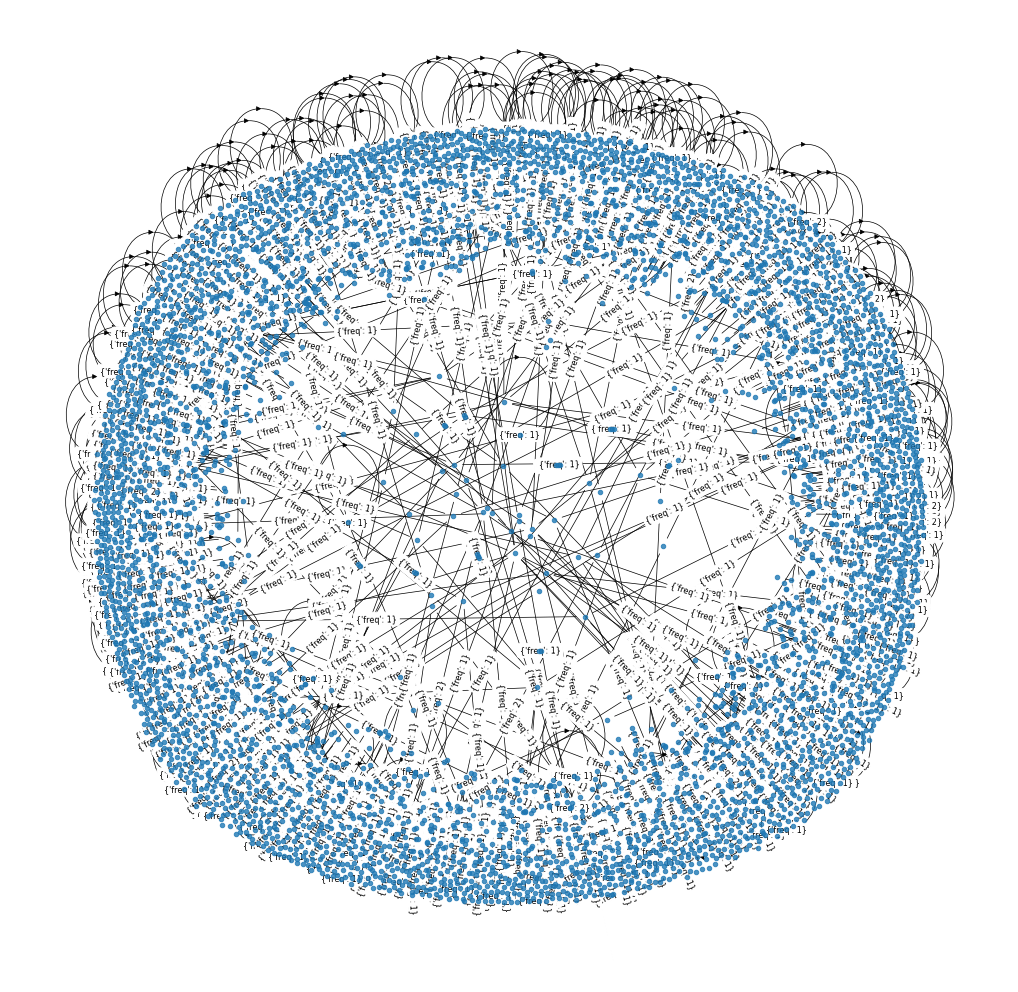

In [ ]:
plt.figure(figsize = (18,18))
plt.axis('off')
nx.draw_networkx_nodes(g, pos = layout, node_size=20, alpha=0.8)
nx.draw_networkx_edges(g, pos = layout, width = 0.7, edge_color='black')
nx.draw_networkx_edge_labels(g, pos = layout , font_size=8)
plt.show()

In [ ]:
plt.savefig("graph.jpg", format="jpg")

<Figure size 432x288 with 0 Axes>

In [ ]:
g_un = nx.to_undirected(g)

In [ ]:
#calculate density, assortativity, ...
nx.density(g), nx.density(g_un)

(0.00011023897567778285, 0.00023100925565760352)

we have density close to zero that's mean we have a sparce graph and when its close to 1 we have a complete graph

In [ ]:
nx.degree_assortativity_coefficient(g)

-0.008418984444507262

we have negative value it mean that the nodes with similar properties arent connected to each other

In [ ]:
nx.algorithms.cluster.average_clustering(g)

0.0012286521685710777

 0 ther'is no connection between the neighbors of the node

In [ ]:
nx.algorithms.clustering(g)

{'0000metal': 0,
 'elmundoes': 0,
 '06ugur06': 0,
 'RealMaskDAO': 0,
 '09072021': 0,
 'dreadnaught027': 0,
 '0Waldeinsamkeit': 0,
 'DeTocqueville14': 0,
 '10Mea47': 0,
 'pressjournal': 0,
 '11pistache': 0,
 'cafocaressv': 0,
 '12happy1256': 0,
 'HallekMichael': 0,
 '14_aryanp': 0,
 'cricyashraj': 0,
 '19581lucy7_': 0,
 'lucieebellee': 0,
 '197Angel': 0,
 'irene7621': 0,
 '1981walter': 0,
 'cees13554126': 0,
 '19Mensch63': 0,
 'givepeazachance': 0,
 '1Thewhale1': 0,
 'RitaPanahi': 0,
 '1UnrulySquirrel': 0,
 '1_jsayso': 0,
 'WardFantroy': 0,
 '1crzydg': 0,
 'AmericanOfColo1': 0,
 '1in5advocacy': 0,
 'graciefacelove': 0,
 '1worldvs1virus': 0,
 '2222333444aaa': 0,
 'mneely27': 0,
 '24KLion': 0,
 'XoyltyM': 0,
 '2AvSagas': 0,
 '2Shredifier75': 0,
 'GullyJudith': 0,
 '2_being_real': 0,
 'ShawnNieves15': 0,
 '2beastmode1': 0,
 'Breaking911': 0,
 '2dedostesta2': 0,
 '2ears2wheels': 0,
 'peternoongmxus1': 0,
 '2fish1whale': 0,
 'BoobyJargon': 0,
 '2tea2room2two': 0,
 'pisorgpl': 0,
 '3000Cosmo'

In [ ]:
#calculate and plot the degree distribution of your network
degree = pd.DataFrame.from_dict(dict(nx.degree(g,weight='freq')), orient='index')


In [ ]:
degree.reset_index(inplace = True)


In [ ]:
degree.columns = ['node', 'degree']

In [ ]:
degree.sort_values('degree', ascending = False)


node  degree
835            grok_      16
3        RealMaskDAO      15
1363    GossipGaryJR      13
2700     labrie_rene      12
2699        SFreddey      12
...              ...     ...
2025    veritebeaute       1
2024     MDujourneau       1
2022  Greatness_tupu       1
2021      MBTVKenya1       1
5425       0xC0113C7       1

[5426 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


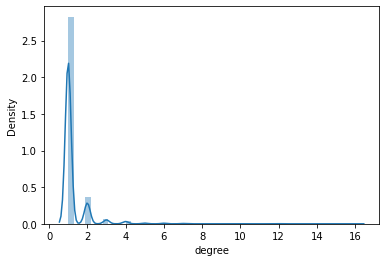

In [ ]:
import seaborn as sns

sns.distplot(degree['degree'])

In [ ]:
#generate a random network with the same size of your network
g_alea = nx.random_graphs.erdos_renyi_graph(5426, p =0.001)


In [ ]:
print(nx.info(g_alea))

Graph with 5426 nodes and 14596 edges


In [ ]:
degree_alea = pd.DataFrame.from_dict(dict(nx.degree(g_alea)), orient= 'index')


In [ ]:
degree_alea.reset_index(inplace=True)

In [ ]:
degree_alea.columns = ['nodes', 'degree']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


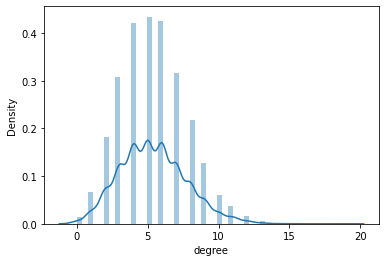

In [ ]:
sns.distplot(degree_alea['degree'])

Micro Analysis

In [ ]:
#set the attributes of your nodes to include a calculated centrality metric

In [ ]:
#create a dataframe with calculated metrics for each node of the graph
indegreeCentrality = pd.DataFrame.from_dict(nx.in_degree_centrality(g),orient='index').reset_index()

In [ ]:
indegreeCentrality.columns = ['nodes','in_degree_Centrality']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


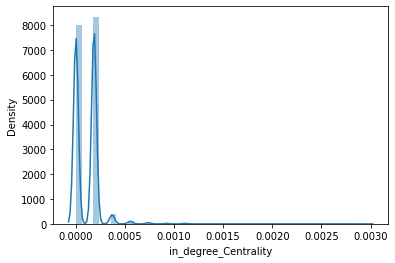

In [ ]:
sns.distplot(indegreeCentrality['in_degree_Centrality'])

In [ ]:
#create a dataframe with calculated metrics for each node of the graph
outdegreeCentrality = pd.DataFrame.from_dict(nx.out_degree_centrality(g),orient='index').reset_index()

In [ ]:
outdegreeCentrality.columns = ['nodes','out_degree_Centrality']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


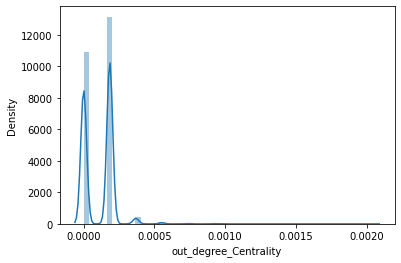

In [ ]:
sns.distplot(outdegreeCentrality['out_degree_Centrality'])

In [ ]:
#create a dataframe with calculated metrics for each node of the graph
betweenessdegreeCentrality=pd.DataFrame.from_dict(nx.betweenness_centrality(g),orient='index').reset_index()

In [ ]:
betweenessdegreeCentrality.columns = ['nodes','betweeness_degree_Centrality']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


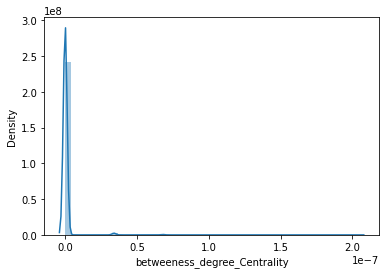

In [ ]:
sns.distplot(betweenessdegreeCentrality['betweeness_degree_Centrality'])

In [ ]:
#create a dataframe with calculated metrics for each node of the graph
closenessdegreeCentrality=pd.DataFrame.from_dict(nx.closeness_centrality(g),orient='index').reset_index()

In [ ]:
closenessdegreeCentrality.columns = ['nodes','closenessdegreeCentrality']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


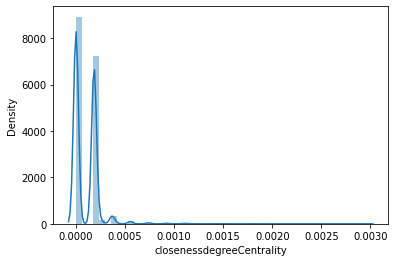

In [ ]:
sns.distplot(closenessdegreeCentrality['closenessdegreeCentrality'])

In [ ]:
import community.community_louvain

In [ ]:
partitions = community.community_louvain.best_partition(g_un)

In [ ]:
df_part = pd.DataFrame.from_dict(partitions,orient='index').reset_index()

In [ ]:
df_part

index    0
0          0000metal    0
1          elmundoes    0
2           06ugur06    1
3        RealMaskDAO    1
4           09072021    2
...              ...  ...
5421   IngrameThomas  667
5422          zituna  252
5423  le_crabe_poilu  252
5424           zollz  416
5425       0xC0113C7  416

[5426 rows x 2 columns]

In [ ]:
#Compute Quality metrics of your partitions
community.community_louvain.modularity(partitions, g_un)

0.9992645387743394

In [ ]:
layout_un = nx.spring_layout(g_un)

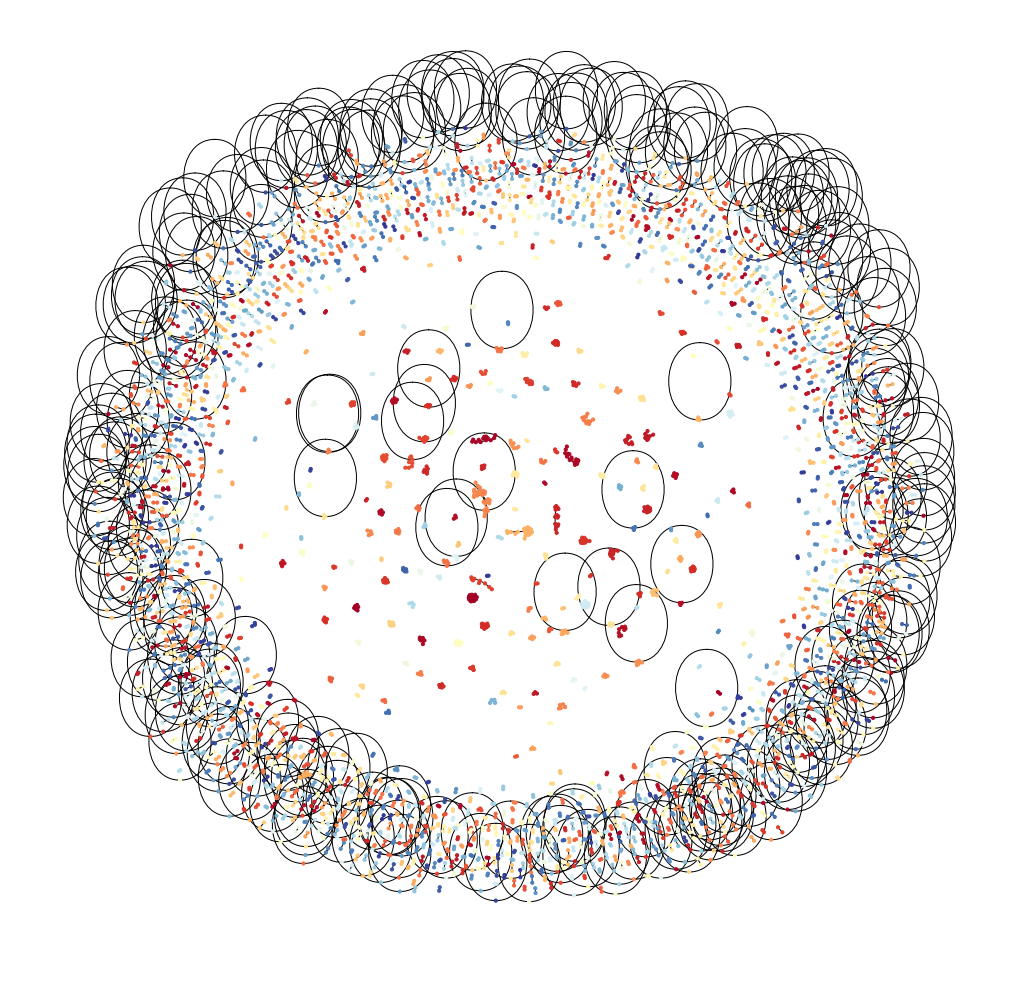

In [ ]:
plt.figure(figsize = (18,18))
plt.axis('off')

nx.draw_networkx_nodes(g_un, pos = layout_un, node_size=10, cmap = plt.cm.RdYlBu, node_color=list(partitions.values()))
nx.draw_networkx_edges(g_un, pos = layout_un)

plt.show()


Analyzing an ego-network

In [ ]:
sorted(list(g_un.degree()), key=lambda x:x[1], reverse=True)[0]

('grok_', 16)

In [ ]:
dfPair_users[dfPair_users.to_user == 'grok_']

from_user to_user
41       JulieAnneEsq   grok_
664    janetrosenbaum   grok_
883         gov_fails   grok_
1143           DE2344   grok_
1239  cat_lawyer_meow   grok_
1323           ydavey   grok_
1464        Laura_K8T   grok_
1513    Dagmar__Gross   grok_
2208     codingsafari   grok_
2348  canada2021dgopg   grok_
2521        cajansona   grok_
2665       Jasperlope   grok_
2679  kate_vexingkate   grok_
2818          jzalkin   grok_
2896     edwinhollins   grok_
2939          devkenn   grok_

In [ ]:
g_pulte = nx.from_pandas_edgelist(dfPair_users[dfPair_users.to_user == 'grok_'], source = 'from_user',target ='to_user',create_using = nx.Graph())

In [ ]:
print(nx.info(g_pulte))

Graph with 17 nodes and 16 edges


In [ ]:
layout_tr = nx.spring_layout(g_pulte)

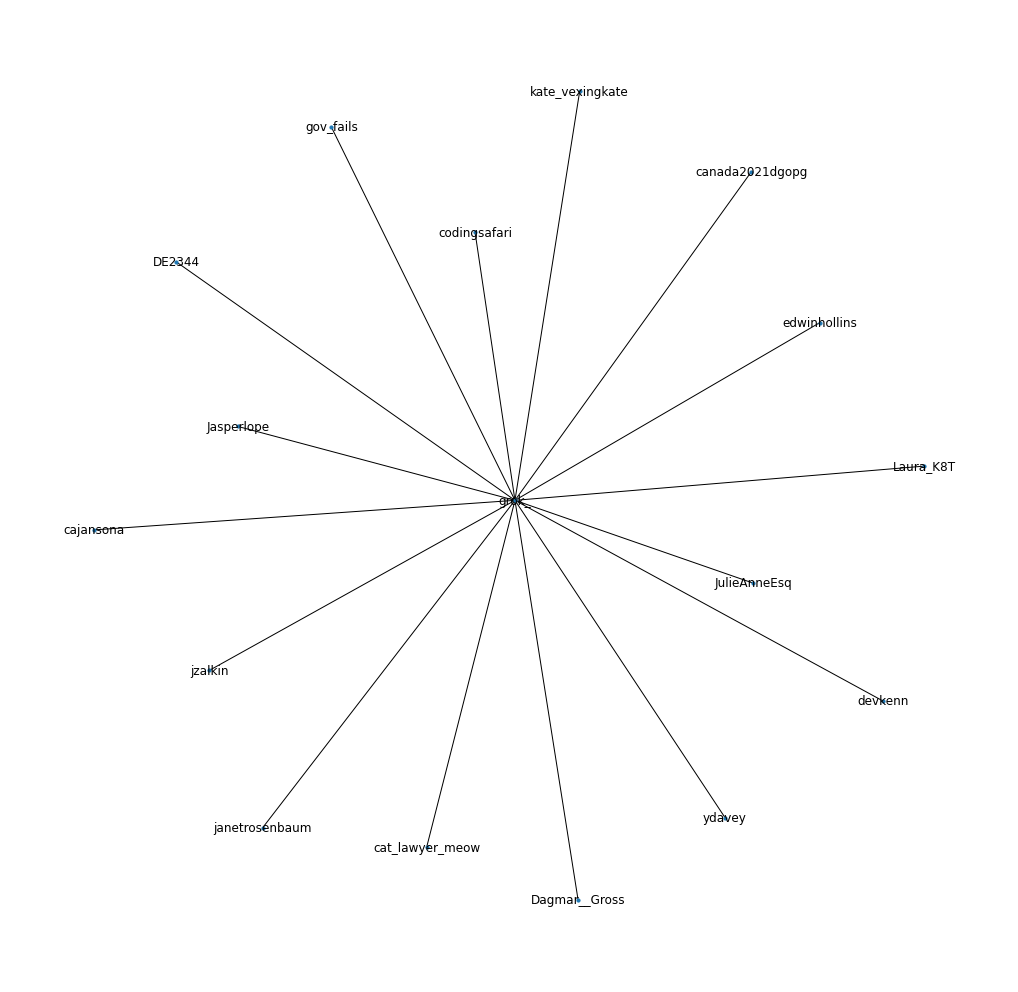

In [ ]:
plt.figure(figsize = (18,18))
plt.axis('off')

nx.draw_networkx_nodes(g_pulte, pos = layout_tr, node_size=10)
nx.draw_networkx_edges(g_pulte, pos = layout_tr)
nx.draw_networkx_labels(g_pulte, pos = layout_tr)
plt.show()

